## IMPORTS

In [140]:
import csv, sys
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
color = sns.color_palette()

C:\Users\madhu\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Reading the data from the CSVs into separate dataframes

In [5]:
details_2016 = pd.read_csv('properties_2016.csv',low_memory=False)
details_2017 = pd.read_csv('properties_2017.csv',low_memory=False)

trans_2016 = pd.read_csv('train_2016_v2.csv',low_memory=False)
trans_2017 = pd.read_csv('train_2017.csv',low_memory=False)

In [6]:
print("2016 Rows and Columns-",details_2016.shape)
print("2017 Rows and Columns-",details_2017.shape)

2016 Rows and Columns- (2985217, 58)
2017 Rows and Columns- (2985217, 58)


### Separating the year and month from the transactiondate column and storing them in new columns

In [7]:
trans_2016['transactiondate'] = pd.to_datetime(trans_2016['transactiondate'])
trans_2016['year'] = trans_2016['transactiondate'].dt.year
trans_2016['month'] = trans_2016['transactiondate'].dt.month

trans_2017['transactiondate'] = pd.to_datetime(trans_2017['transactiondate'])
trans_2017['year'] = trans_2017['transactiondate'].dt.year
trans_2017['month'] = trans_2017['transactiondate'].dt.month

# Transaction Columns (logerror, transaction date)

## Log error = Log(Zestimate) - Log(Saleprice)

#### Distribution of Log error

In [16]:
def logDistribution(trainingyearVal):
    plt.figure(figsize=(16,6))
    sns.set(font_scale = 1)
    sns.distplot(trainingyearVal.logerror, bins=50, kde=False);
    plt.show()

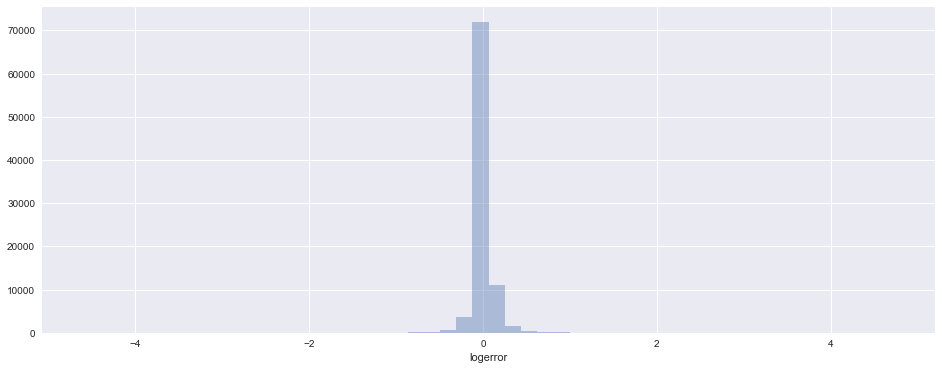

In [17]:
logDistribution(trans_2016)

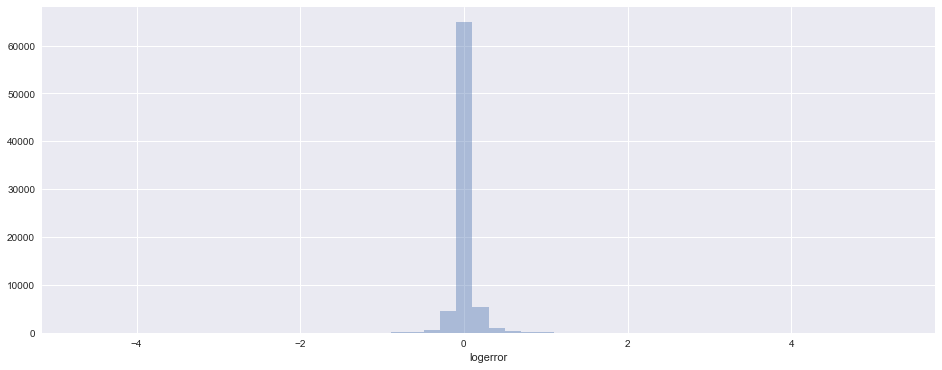

In [18]:
logDistribution(trans_2017)

#### Distribition of Absolute log error

In [19]:
def absoluteLogDistribution(trainingyearVal):
    plt.figure(figsize=(7,6))
    sns.set(font_scale = 1)
    sns.distplot(abs(trainingyearVal.logerror), bins=100, kde=False);
    plt.show()

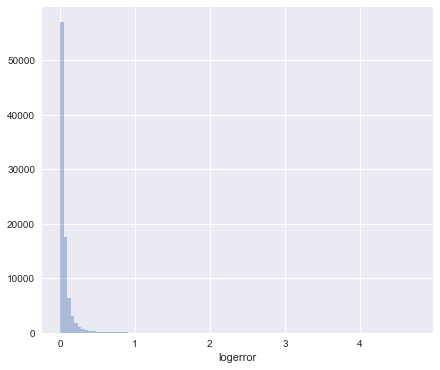

In [20]:
absoluteLogDistribution(trans_2016)

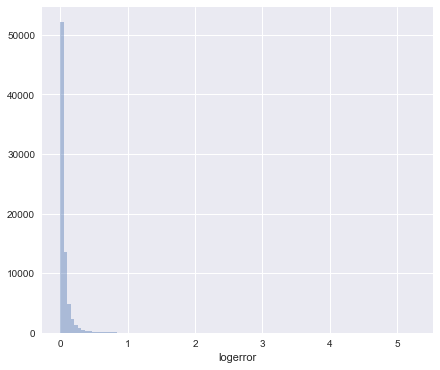

In [21]:
absoluteLogDistribution(trans_2017)

## Training Data : Transaction, Transaction Date

### Transaction every month

### 2016

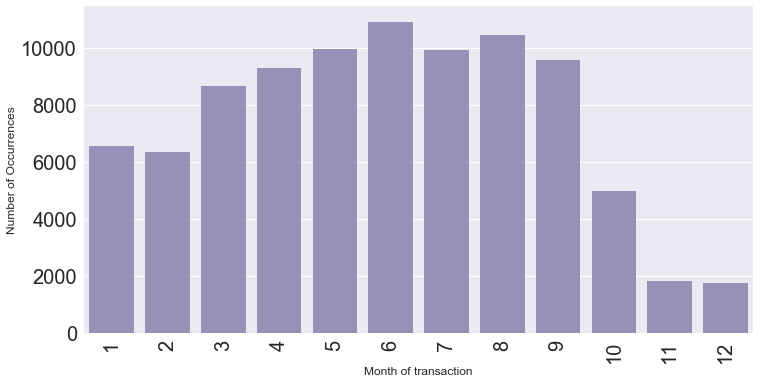

In [110]:
cnt_srs = trans_2016['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

### 2017

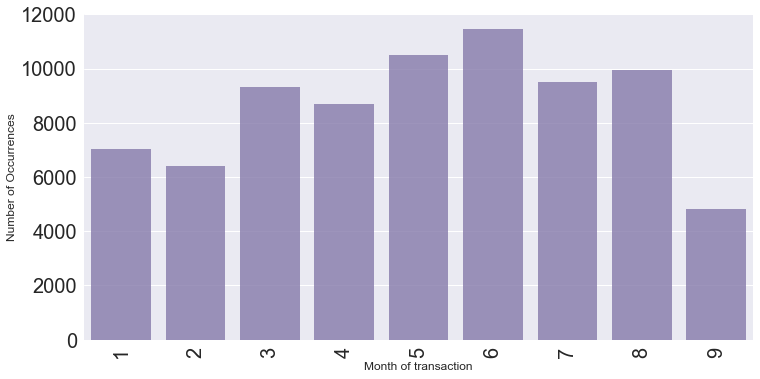

In [109]:
cnt_srs = trans_2017['month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

# Missing Data

## Counting the missing data each column and storing it another dataframe ->missing_data

In [8]:
# Taking the sum of null rows for each column and storing it in new dataframe -> missig_data
missing_data = details_2016.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data_17 = details_2017.isnull().sum().to_frame(name='Missing_Count').reset_index()

# Caluclating the % of the missing data for each column
missing_data['Missing_percent'] = (missing_data['Missing_Count']/details_2016.shape[0])*100
missing_data_17['Missing_percent'] = (missing_data_17['Missing_Count']/details_2016.shape[0])*100

#missing_data.head()

In [9]:
# Sorting the the columns by missing %
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)

### Columns with more than 70% missing data 

In [70]:
#2016 Data
missing_df = details_2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / details_2016.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.70]

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


column_name  missing_count  missing_ratio
1      airconditioningtypeid        2173698       0.728154
2   architecturalstyletypeid        2979156       0.997970
3               basementsqft        2983589       0.999455
6        buildingclasstypeid        2972588       0.995769
9                 decktypeid        2968121       0.994273
10  finishedfloor1squarefeet        2782500       0.932093
13      finishedsquarefeet13        2977545       0.997430
14      finishedsquarefeet15        2794419       0.936086
15      finishedsquarefeet50        2782500       0.932093
16       finishedsquarefeet6        2963216       0.992630
18              fireplacecnt        2672580       0.895272
20              garagecarcnt        2101950       0.704120
21           garagetotalsqft        2101950       0.704120
22            hashottuborspa        2916203       0.976881
27                   poolcnt        2467683       0.826634
28               poolsizesum        2957257       0.990634
29              pooltypeid10        2948278       0.987626
30               pooltypeid2        2953142       0.989255
31               pooltypeid7        2499758       0.837379
41               storytypeid        2983593       0.999456
42       threequarterbathnbr        2673586       0.895609
43    typeconstructiontypeid        2978470       0.997740
45        yardbuildingsqft17        2904862       0.973082
46        yardbuildingsqft26        2982570       0.999113
48           numberofstories        2303148       0.771518
49             fireplaceflag        2980054       0.998270
55        taxdelinquencyflag        2928755       0.981086
56        taxdelinquencyyear        2928753       0.981085

In [71]:
#2017 data
missing_df = details_2017.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / details_2017.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.70]

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


column_name  missing_count  missing_ratio
1      airconditioningtypeid        2169855       0.726867
2   architecturalstyletypeid        2979156       0.997970
3               basementsqft        2983590       0.999455
6        buildingclasstypeid        2972486       0.995735
9                 decktypeid        2967838       0.994178
10  finishedfloor1squarefeet        2781459       0.931744
13      finishedsquarefeet13        2977546       0.997430
14      finishedsquarefeet15        2795032       0.936291
15      finishedsquarefeet50        2781459       0.931744
16       finishedsquarefeet6        2963735       0.992804
18              fireplacecnt        2672093       0.895108
20              garagecarcnt        2094209       0.701527
21           garagetotalsqft        2094209       0.701527
22            hashottuborspa        2935155       0.983230
27                   poolcnt        2445585       0.819232
28               poolsizesum        2957259       0.990635
29              pooltypeid10        2968211       0.994303
30               pooltypeid2        2952161       0.988927
31               pooltypeid7        2479322       0.830533
41               storytypeid        2983594       0.999456
42       threequarterbathnbr        2668860       0.894025
43    typeconstructiontypeid        2978471       0.997740
45        yardbuildingsqft17        2903629       0.972669
46        yardbuildingsqft26        2982571       0.999114
48           numberofstories        2299541       0.770309
49             fireplaceflag        2980054       0.998270
55        taxdelinquencyflag        2928702       0.981068
56        taxdelinquencyyear        2928700       0.981068

### Plotting the missing values Graph

In [10]:
def missingDataGraph(yearValue):
    fig, ax = plt.subplots(figsize=(18,14))
    ax.barh(range(yearValue.shape[1]), missing_data.Missing_percent.values, align='center',color='Purple')

    ax.set_yticks(range(yearValue.shape[1]))
    ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
    ax.invert_yaxis()  

    ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
    ax.set_ylabel('Columns',fontsize=14, color='red')
    ax.set_title('Missing Data',fontsize=16, color='red')

    plt.show()

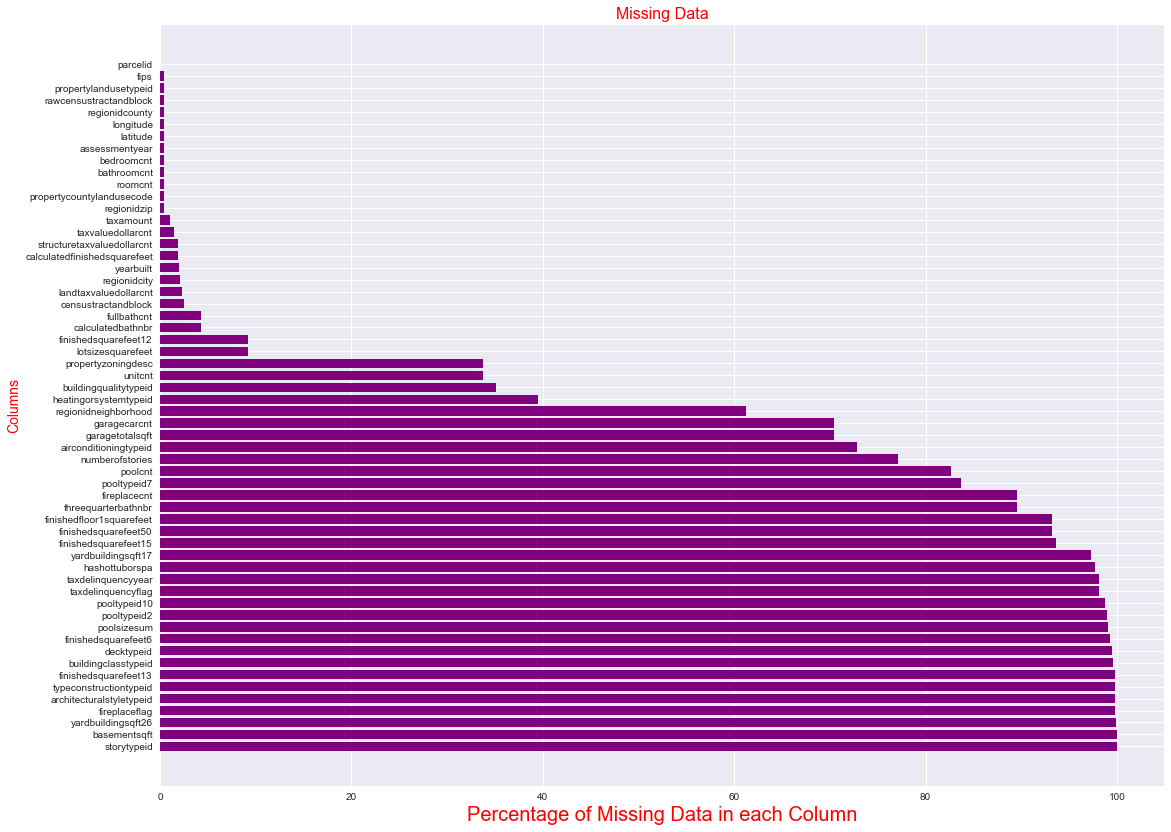

In [11]:
missingDataGraph(details_2016)

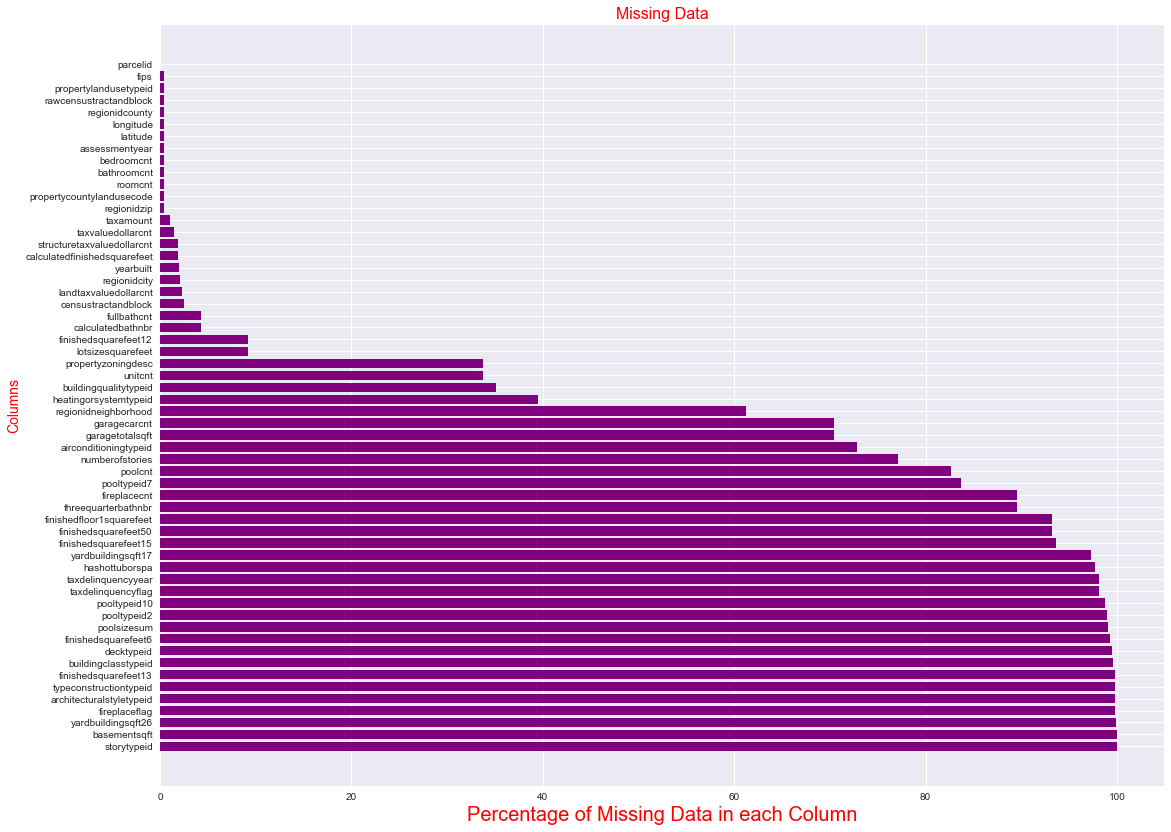

In [12]:
missingDataGraph(details_2017)

### Considering only the columns having more than 70% of data

In [13]:
features_16 = missing_data['index'][(missing_data.Missing_percent <30)]
features_17 = missing_data_17['index'][(missing_data_17.Missing_percent <30)]

# Including on the features in the merge data
properties_2016 = details_2016[features_16]
properties_2017 = details_2017[features_17]

### Merging the properties and transaction data

In [14]:
data_2016 = pd.merge(trans_2016,properties_2016,on='parcelid', how='left')
data_2017 = pd.merge(trans_2017,properties_2017,on='parcelid', how='left')

In [15]:
print("2016 Rows and Columns-",data_2016.shape)
print("2017 Rows and Columns-",data_2017.shape)

2016 Rows and Columns- (90275, 29)
2017 Rows and Columns- (77613, 29)


# All columns in 2016 and 2017 with 30% missing data

In [152]:
data_2016.columns

Index(['parcelid', 'logerror', 'transactiondate', 'year', 'month', 'fips',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty',
       'longitude', 'latitude', 'assessmentyear', 'bedroomcnt', 'bathroomcnt',
       'roomcnt', 'propertycountylandusecode', 'regionidzip', 'taxamount',
       'taxvaluedollarcnt', 'structuretaxvaluedollarcnt',
       'calculatedfinishedsquarefeet', 'yearbuilt', 'regionidcity',
       'landtaxvaluedollarcnt', 'censustractandblock', 'fullbathcnt',
       'calculatedbathnbr', 'finishedsquarefeet12', 'lotsizesquarefeet'],
      dtype='object')

In [205]:
data_2017.columns

Index(['parcelid', 'logerror', 'transactiondate', 'year', 'month',
       'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'],
      dtype='object')

In [114]:
data_2016.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
year                                     int64
month                                    int64
fips                                   float64
propertylandusetypeid                  float64
rawcensustractandblock                 float64
regionidcounty                          object
longitude                              float64
latitude                               float64
assessmentyear                         float64
bedroomcnt                             float64
bathroomcnt                            float64
roomcnt                                float64
propertycountylandusecode               object
regionidzip                            float64
taxamount                              float64
taxvaluedollarcnt                      float64
structuretaxvaluedollarcnt             float64
calculatedfinishedsquarefeet           float64
yearbuilt    

### Describing each column

In [124]:
def describeColumn(yearValue):
    for col in yearValue.columns:
        print("")
        print("Descriing "+ col +":")
        print(yearValue[col].describe())

In [125]:
describeColumn(data_2016)


Descriing parcelid:
count    9.027500e+04
mean     1.298466e+07
std      2.504510e+06
min      1.071174e+07
25%      1.155950e+07
50%      1.254734e+07
75%      1.422755e+07
max      1.629608e+08
Name: parcelid, dtype: float64

Descriing logerror:
count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

Descriing transactiondate:
count                   90275
unique                    352
top       2016-07-29 00:00:00
freq                      910
first     2016-01-01 00:00:00
last      2016-12-30 00:00:00
Name: transactiondate, dtype: object

Descriing year:
count    90275.0
mean      2016.0
std          0.0
min       2016.0
25%       2016.0
50%       2016.0
75%       2016.0
max       2016.0
Name: year, dtype: float64

Descriing month:
count    90275.000000
mean         5.849848
std          2.812690
min          1.000000
25%          

In [126]:
describeColumn(data_2017)


Descriing parcelid:
count    7.761300e+04
mean     1.300781e+07
std      3.518717e+06
min      1.071186e+07
25%      1.153821e+07
50%      1.253004e+07
75%      1.421101e+07
max      1.676893e+08
Name: parcelid, dtype: float64

Descriing logerror:
count    77613.000000
mean         0.016755
std          0.170887
min         -4.655420
25%         -0.024325
50%          0.006670
75%          0.039295
max          5.262999
Name: logerror, dtype: float64

Descriing transactiondate:
count                   77613
unique                    264
top       2017-06-30 00:00:00
freq                     1195
first     2017-01-01 00:00:00
last      2017-09-25 00:00:00
Name: transactiondate, dtype: object

Descriing year:
count    77613.0
mean      2017.0
std          0.0
min       2017.0
25%       2017.0
50%       2017.0
75%       2017.0
max       2017.0
Name: year, dtype: float64

Descriing month:
count    77613.000000
mean         5.061575
std          2.357785
min          1.000000
25%          

The Only Catagorical Data Type is the propertycountylandusecode (After getting rid of data that is over 70% missing

# Function to Return just numerical property columns

In [146]:
def selectedColumnForYear(yearValue):
    x = yearValue.columns.get_values()
    index = [np.argwhere(x=='year'), np.argwhere(x=='month'), np.argwhere(x=='transactiondate'), np.argwhere(x=='logerror'),np.argwhere(x=='parcelid'), np.argwhere(x=='propertycountylandusecode')]
    colNames = np.delete(x, index)
    return colNames

# Location Features

    # Following are the features to concider: Latitude, Longitude, fips, regionZip, regionCity, censustractandblock

## Dealing with the 'fips' column

In [22]:
data_2016['fips'].unique()

array([ 6037.,  6059.,  6111.])

In [23]:
data_2017['fips'].unique()

array([ 6059.,  6111.,  6037.,    nan])

For 2016 and 2017 Data

    6037 Los Angeles County  California
    6059 Orange County       California
    6111 Ventura County      California

In [24]:
# from mpl_toolkits.basemap import Basemap, cm
# geocolumns = [  'latitude', 'longitude','propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc','regionidcity','regionidcounty', 'regionidzip','censustractandblock', 'rawcensustractandblock']

# geoprop = data_2016[geocolumns]
# #del data_2016; gc.collect()

# geoprop.loc[:,'latitude'] = geoprop.loc[:,'latitude']/1e6
# geoprop.loc[:,'longitude'] = geoprop.loc[:,'longitude']/1e6

# maxlat = (geoprop['latitude']).max()
# maxlon = (geoprop['longitude']).max()
# minlat = (geoprop['latitude']).min()
# minlon = (geoprop['longitude']).min()
# print('maxlat {} minlat {} maxlon {} minlon {}'.format(maxlat, minlat, maxlon, minlon))

# CAparms = { 'llcrnrlat' : minlat,
#                      'urcrnrlat' : maxlat+0.2,
#                      'llcrnrlon' : maxlon-2.5,
#                      'urcrnrlon' :minlon+2.5 }
# Bm, fig = create_basemap()
# x,y = Bm( geoprop['longitude'].values, geoprop['latitude'].values)                           
# Bm.scatter( x, y, marker = 'D',color = 'm', s = 1 )
# plt.show()

In [22]:

def create_basemap( llcrnrlat=30,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60, figsize=(16,9) ):
    fig=plt.figure( figsize = figsize )
    Bm = Basemap( projection='merc', 
                llcrnrlat=llcrnrlat,urcrnrlat=urcrnrlat,
                llcrnrlon=llcrnrlon,urcrnrlon=urcrnrlon,
                lat_ts=20,resolution='i' )
    # draw coastlines, state and country boundaries, edge of map.
    Bm.drawcoastlines(); Bm.drawstates(); Bm.drawcountries() 
    return Bm, fig    


Bm, fig = create_basemap()
x,y = Bm( geoprop['longitude'].values, geoprop['latitude'].values)                           
Bm.scatter( x, y, marker = 'D',color = 'm', s = 1 )
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Above it can be seen that the all the regions are in one area in California

## Coorelation between all the location variables

In [302]:
corr = geoprop.isnull().corr()
sns.heatmap( corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values ) 
plt.show()

NameError: name 'geoprop' is not defined

## Map both the distribution of each and Correlation between longitude and latitude

In [33]:
def latitudeLongitudeJointPlot(yearValue):
    plt.figure(figsize=(12,12))
    sns.set(font_scale = 1)
    sns.jointplot(x=yearValue.latitude.values, y=yearValue.longitude.values, size=10)
    plt.ylabel('Longitude', fontsize=12)
    plt.xlabel('Latitude', fontsize=12)
    plt.show()

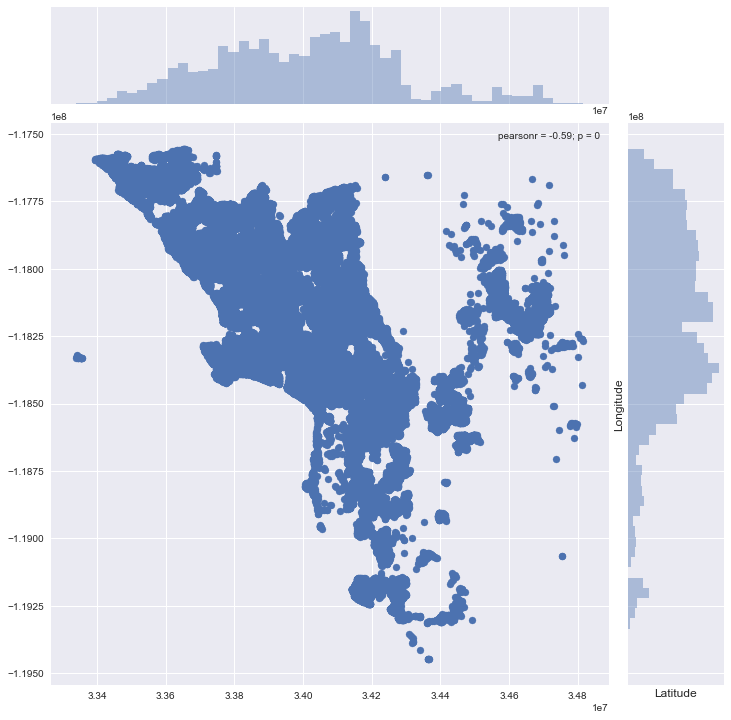

In [27]:
latitudeLongitudeJointPlot(data_2016)

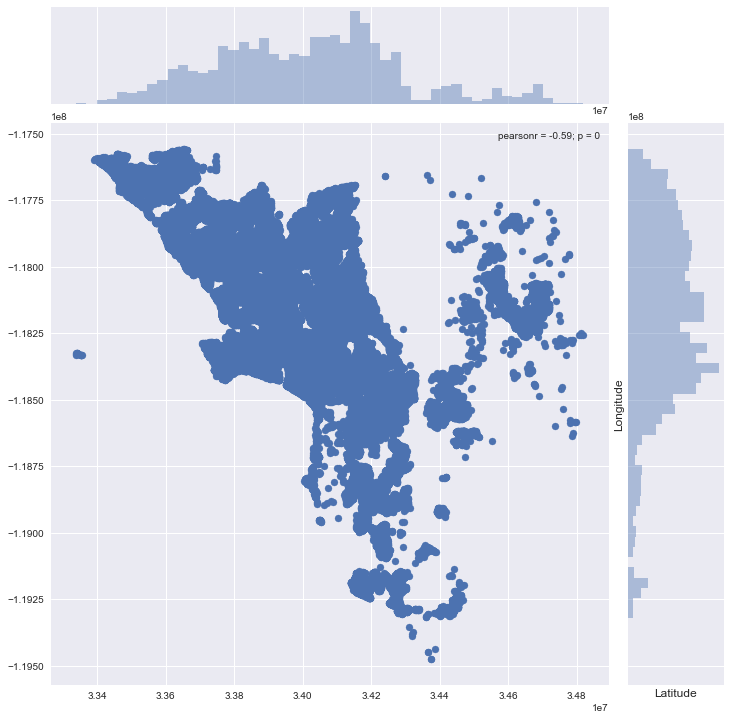

In [28]:
latitudeLongitudeJointPlot(data_2017)

In [25]:
data_2016['regionidzip'].describe()

count     90240.000000
mean      96586.131184
std        3661.339094
min       95982.000000
25%       96193.000000
50%       96393.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

Some of the zip codes given : such as "97319" are not in the USA

In [31]:
def numHousedPerCounty(yearValue):
    fig,ax1= plt.subplots()
    sns.set(font_scale = 1)
    fig.set_size_inches(20,10)
    data_2016["regionidcounty"] = yearValue["regionidcounty"].map(lambda x:str(x).split(".")[0])
    yearMerged = yearValue.groupby(['regionidcounty', 'regionidcity'])["parcelid"].count().unstack('regionidcity').fillna(0)
    yearMerged.plot(kind='bar', stacked=False,ax=ax1)

    ax1.set_xlabel('Different County in California',fontsize=20, color='red')
    ax1.set_ylabel('Count of house',fontsize=14, color='red')


    plt.show()

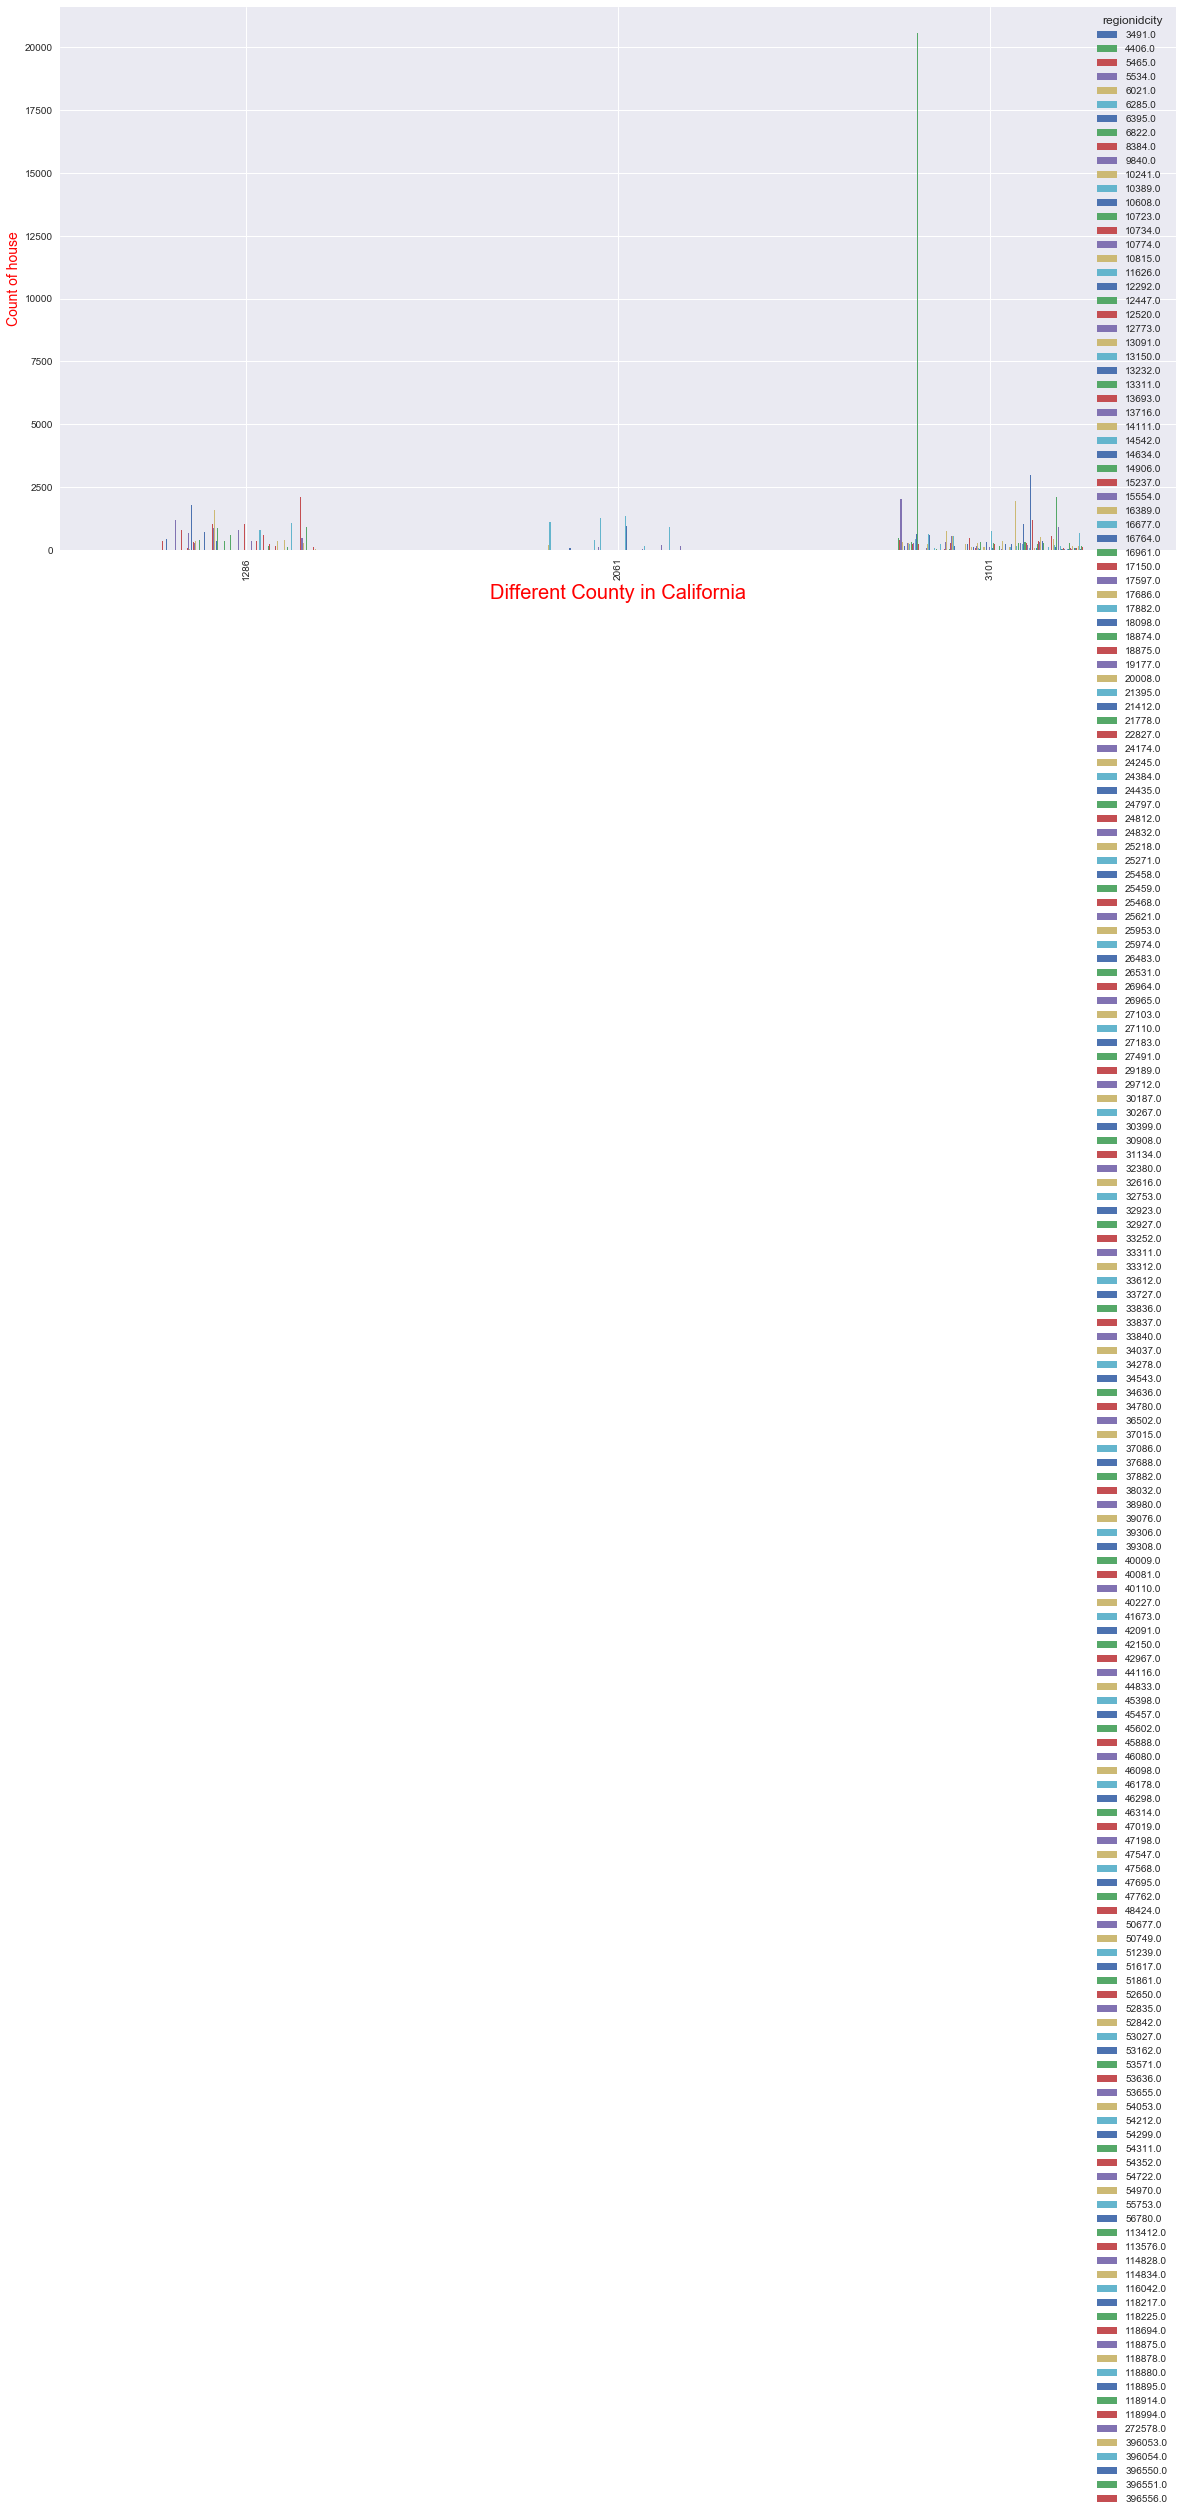

In [32]:
numHousedPerCounty(data_2016)

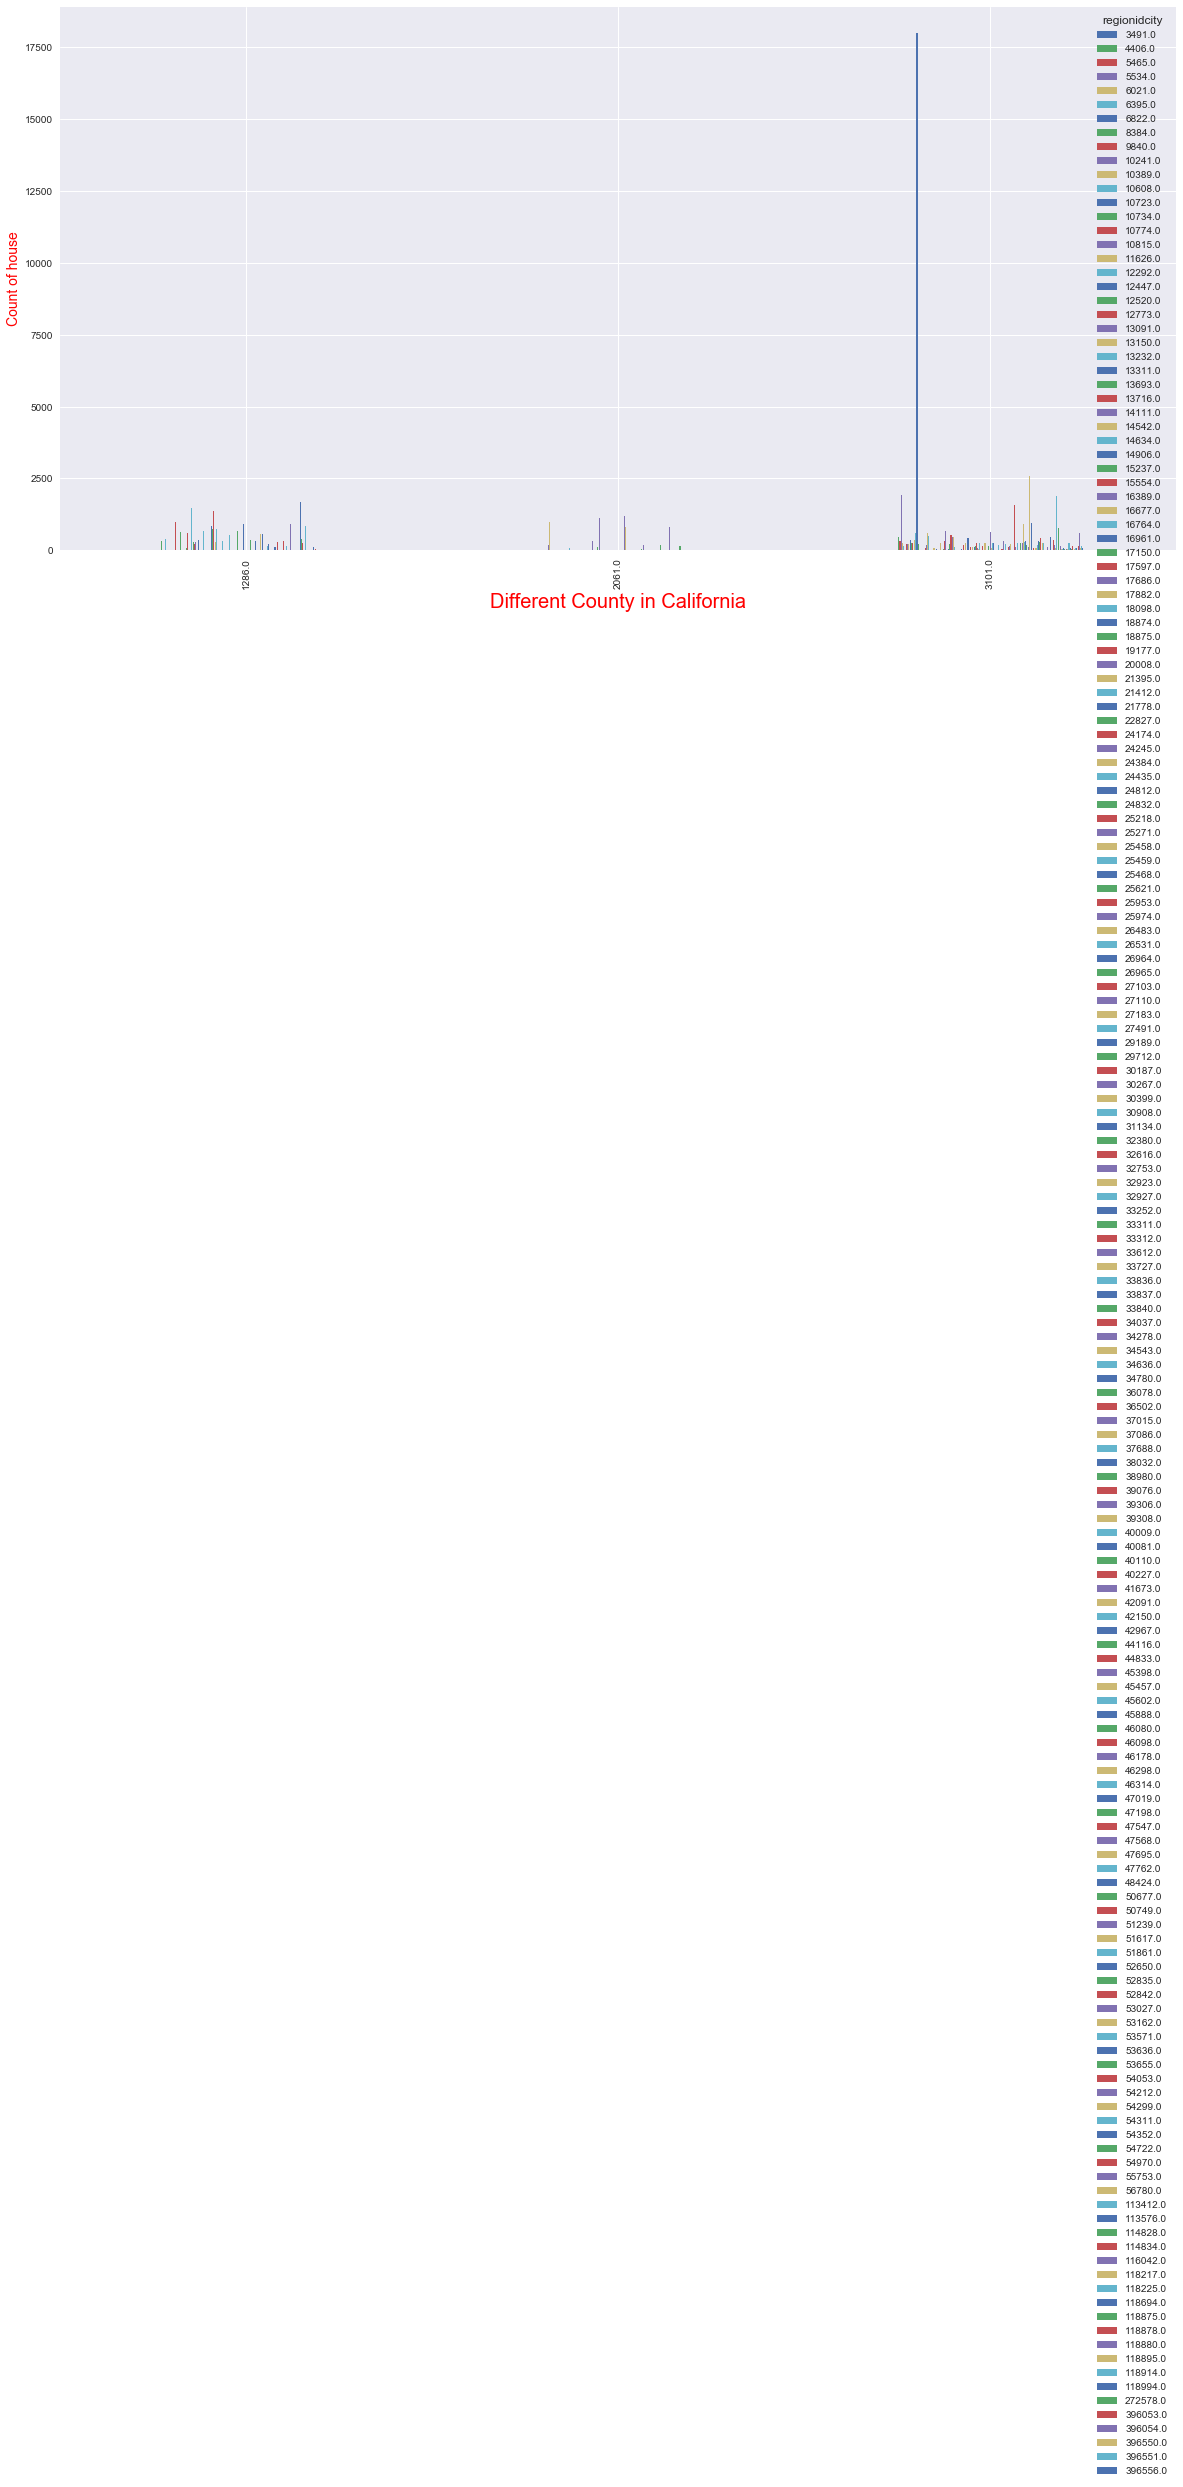

In [34]:
numHousedPerCounty(data_2017)

In [35]:
def regionCitycount(yearValue):
    feature = 'regionidcity'
    
    fig  = plt.figure(figsize=(12, 9), dpi=100);
    sns.set(font_scale = 1)
    axes1 = fig.add_subplot(411); axes3 = fig.add_subplot(413) #axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413)#; axes4 = fig.add_subplot(414); 
    sns.countplot(yearValue[feature].fillna('NaN'), ax=axes1); 
    bar_df1 = yearValue[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
    sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);

    fig.tight_layout()
    plt.show()

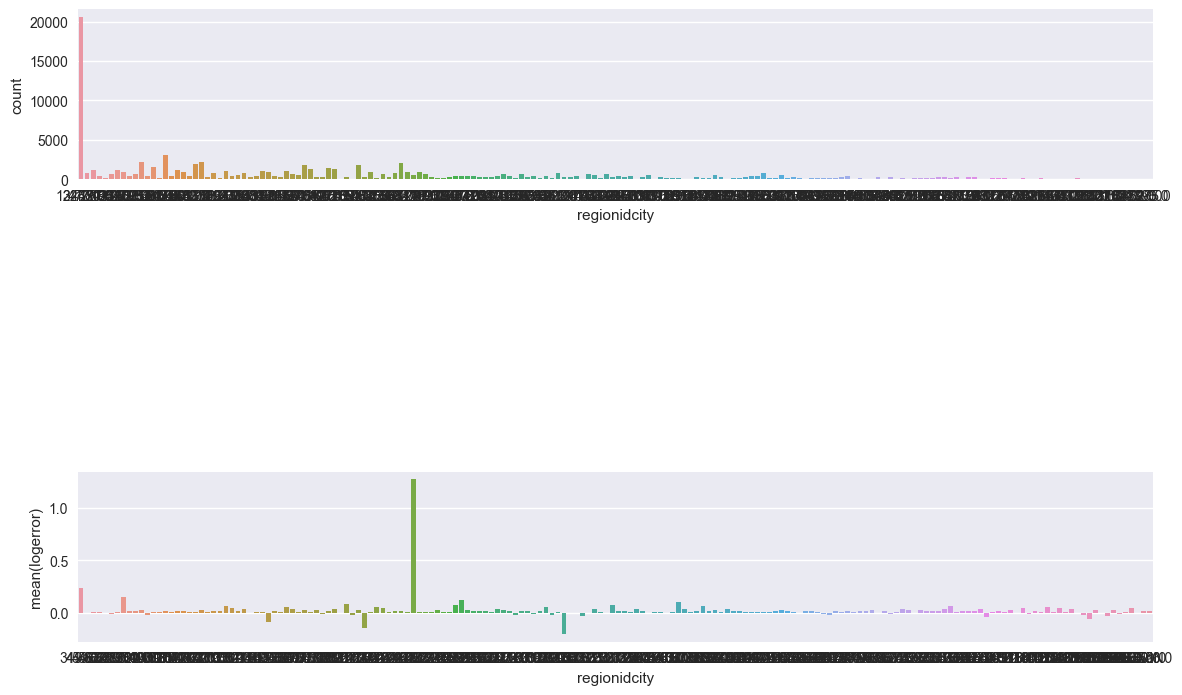

In [36]:
regionCitycount(data_2016)

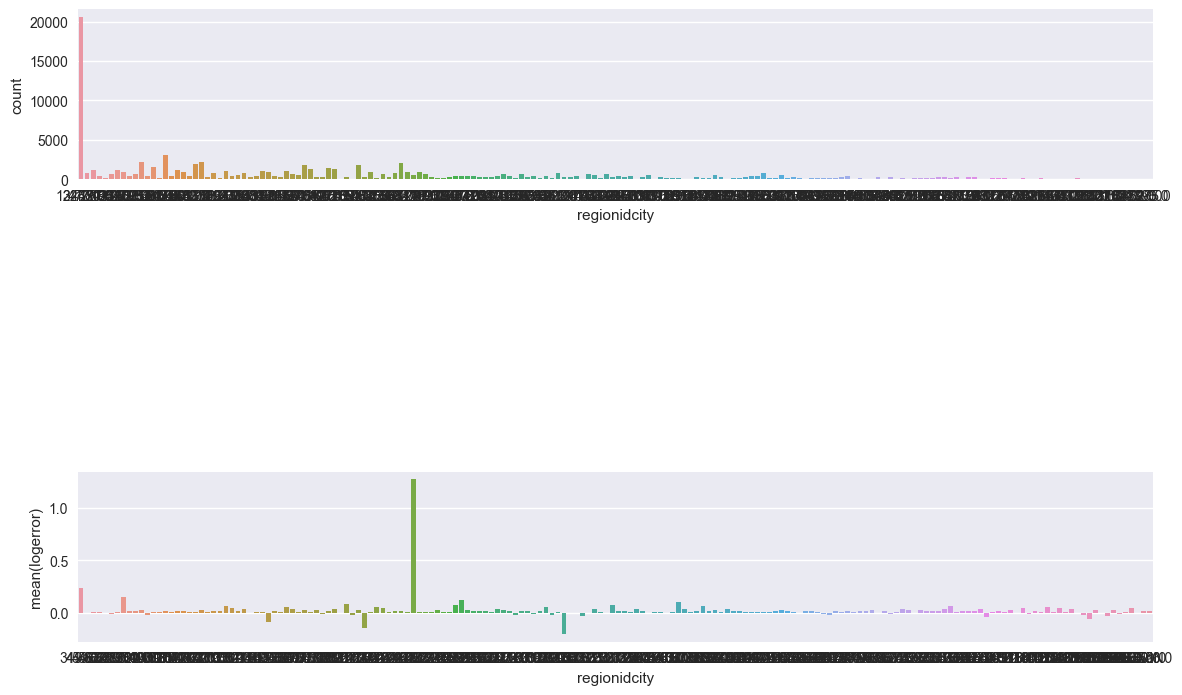

In [37]:
regionCitycount(data_2016)

In [39]:
def regionCountyCount(yearValue):
    feature = 'regionidcounty'

    fig  = plt.figure(figsize=(12, 9), dpi=100);
    sns.set(font_scale = 1)
    axes1 = fig.add_subplot(411); axes3 = fig.add_subplot(413) 
    sns.countplot(yearValue[feature].fillna('NaN'), ax=axes1);
    bar_df1 = yearValue[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
    sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
    fig.tight_layout()
    plt.show()

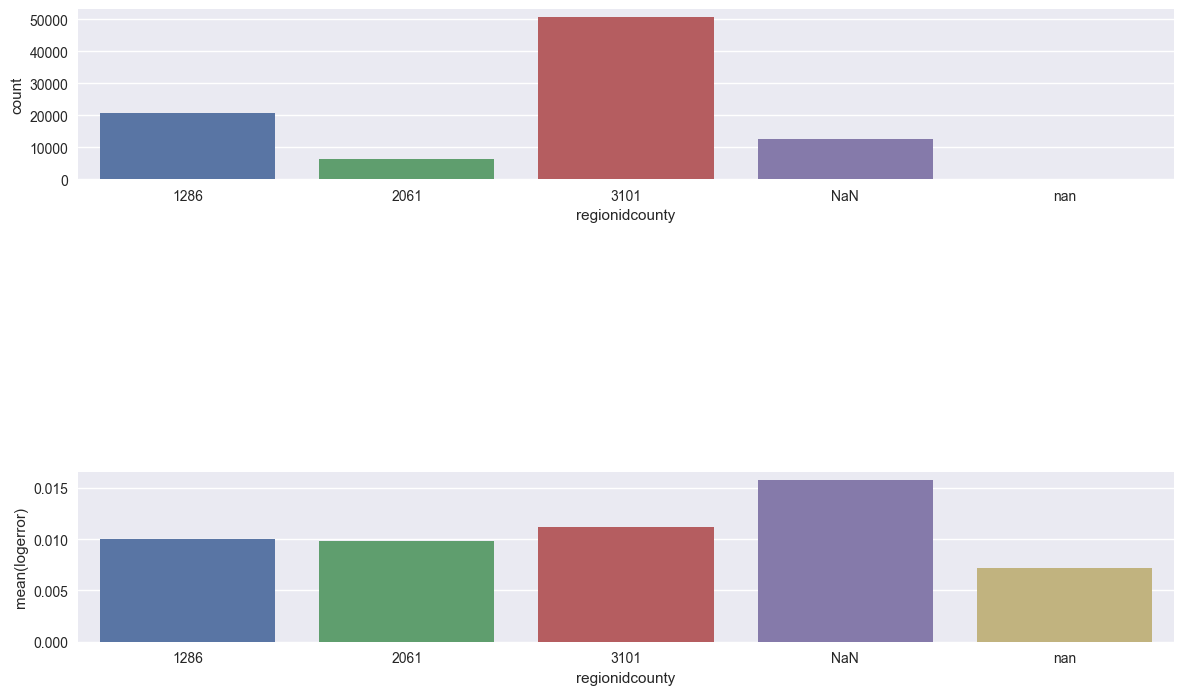

In [40]:
regionCountyCount(data_2016)

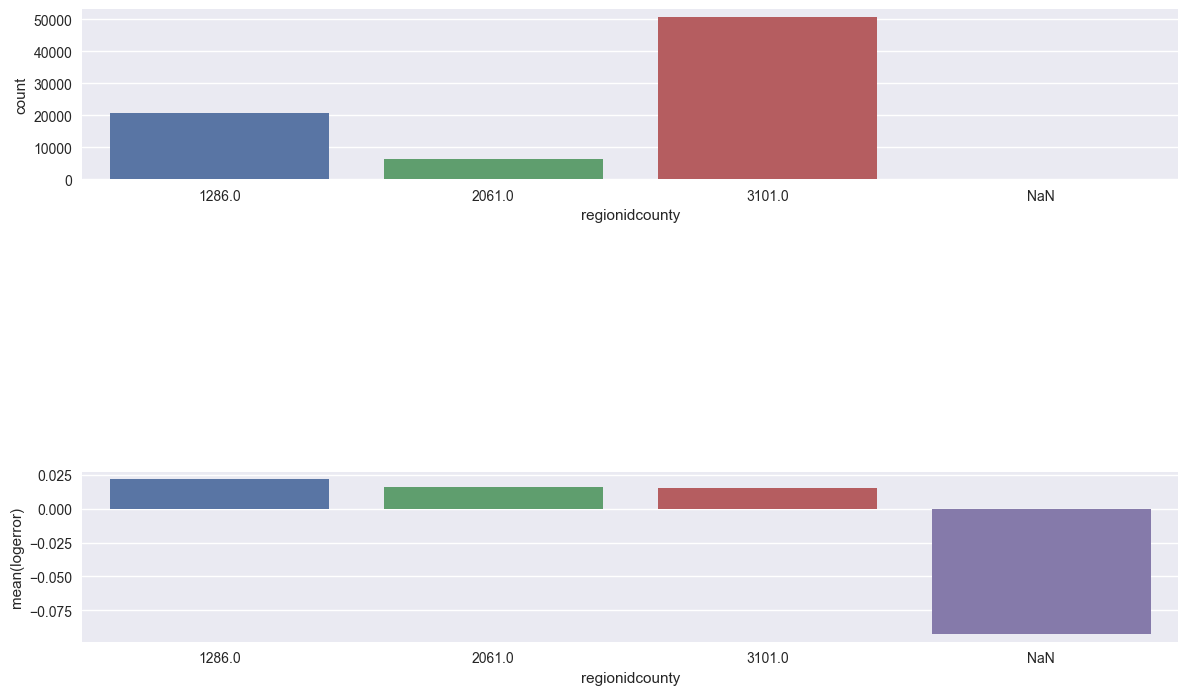

In [41]:
regionCountyCount(data_2017)

# All Correlation Graphs

## CORRELATION GRAPH (Heat Map) BETWEEN COLUMNS

In [44]:
# # Finding the correlation between the features
def correlationHeatMap(YearValue):
    f, ax = plt.subplots(figsize=(20, 20))
    sns.set(font_scale = 3)
    corr = data_2016.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(330, 0, as_cmap=True),
             square=True, linewidths=.5,vmax=0.3,ax=ax, cbar_kws={"shrink": 1})

    plt.show()

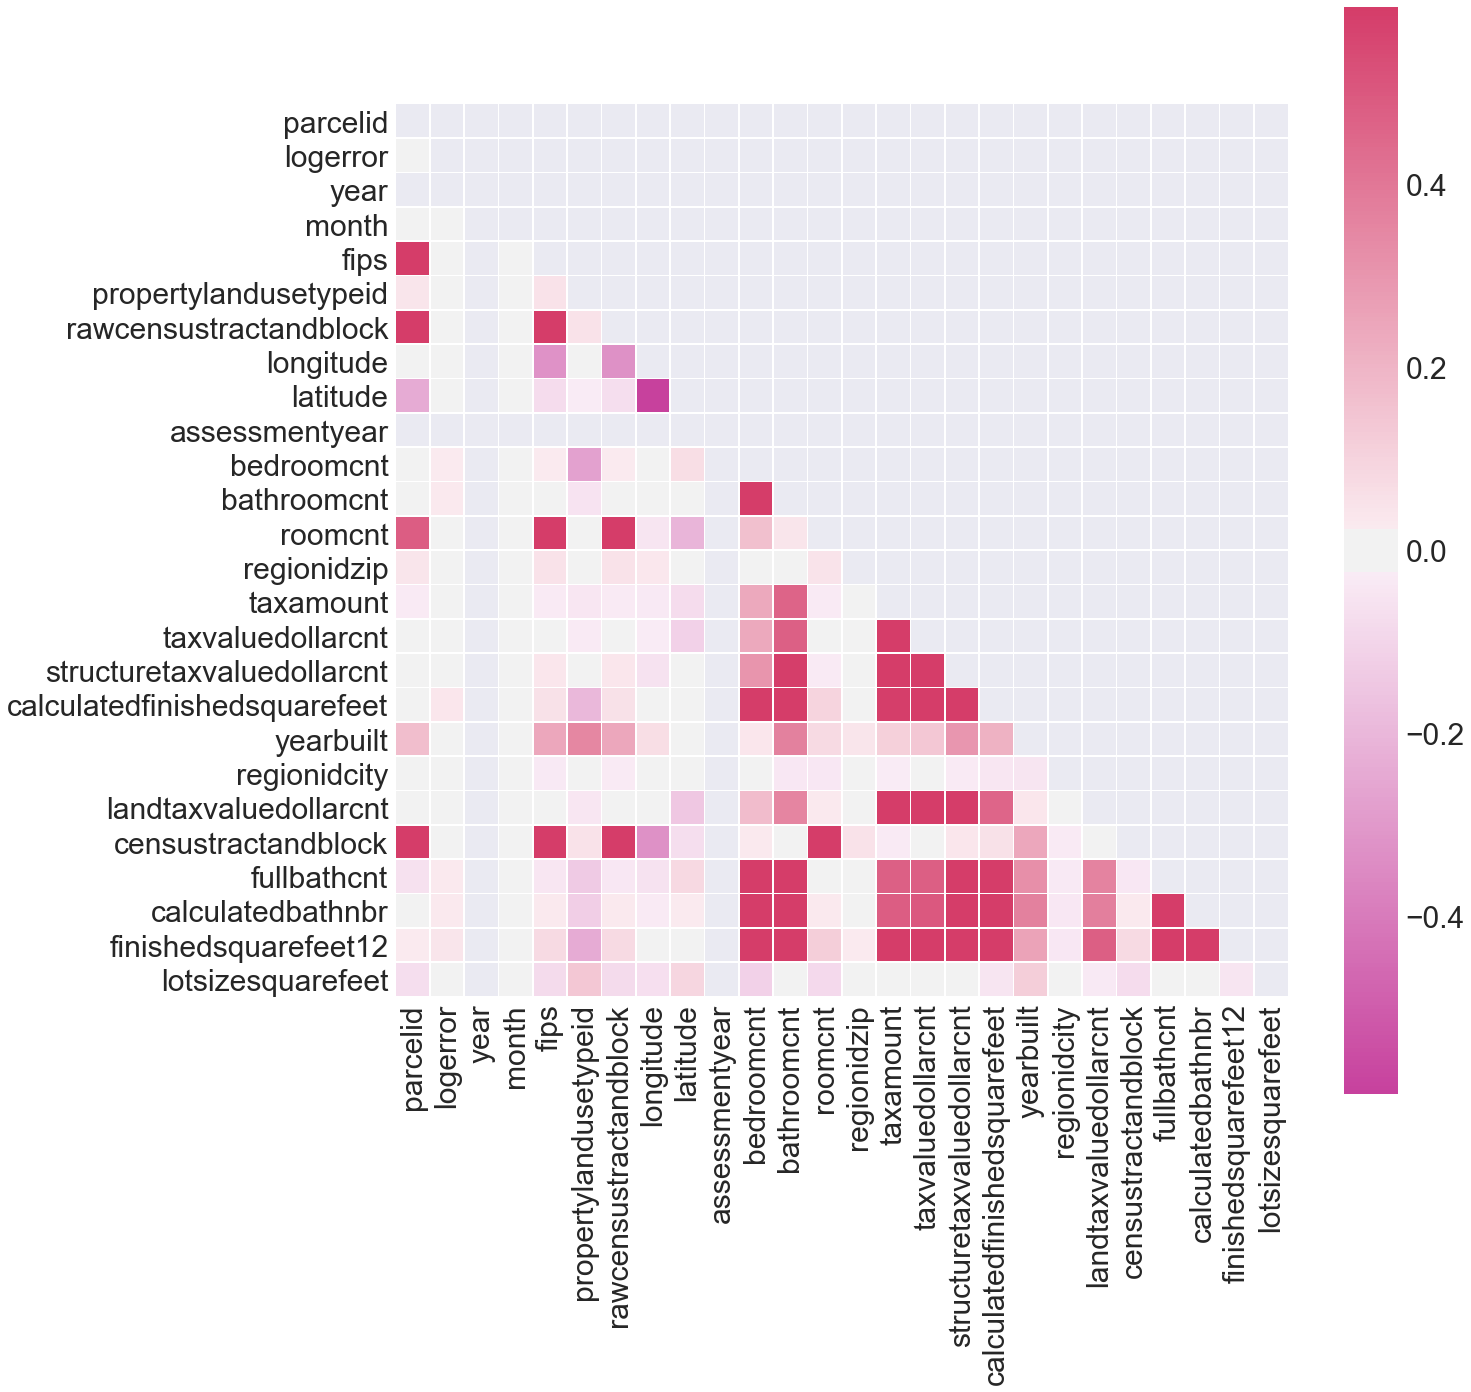

In [45]:
correlationHeatMap(data_2016)

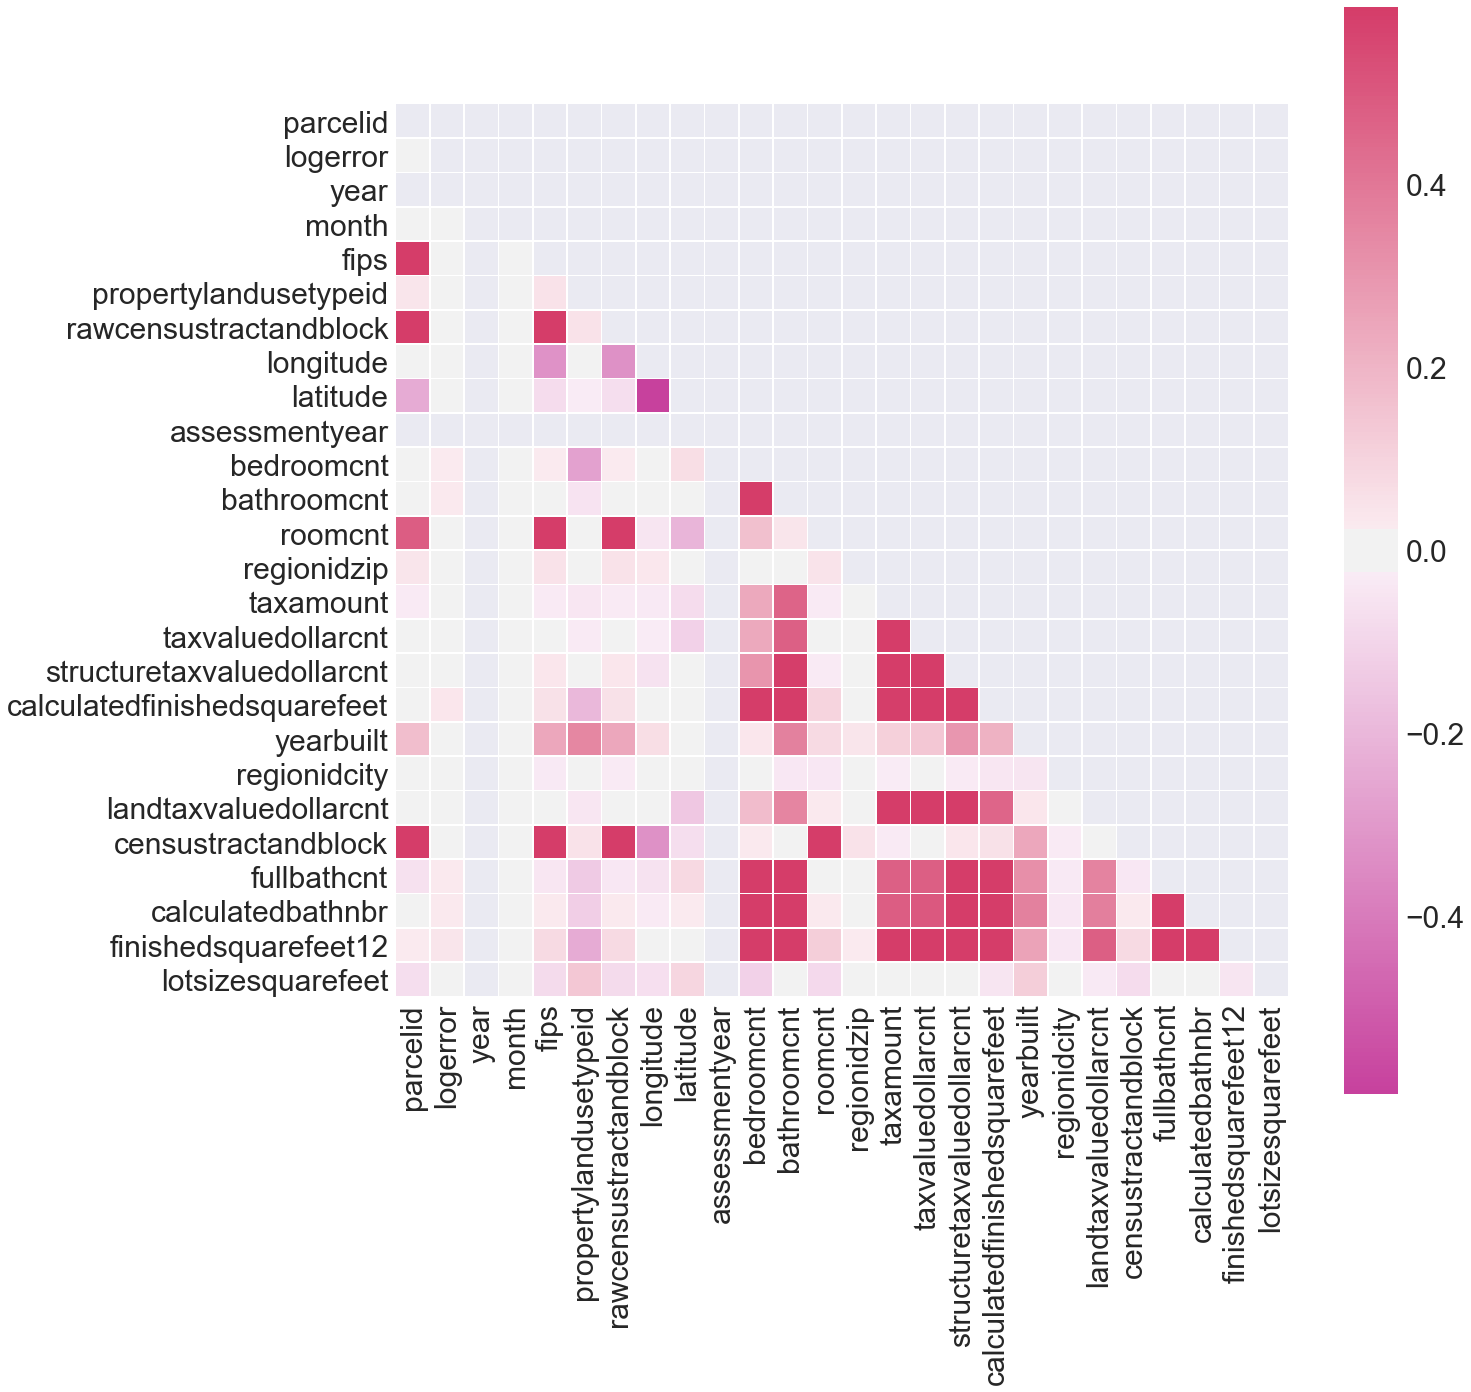

In [46]:
correlationHeatMap(data_2017)

In [50]:
def correlationForValidColumns(YearValue):
    #Identify numerical columns to produce a heatmap
    catcols = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
    numcols = [x for x in YearValue.columns if x not in catcols]

    #Lets start by plotting a heatmap to determine if any variables are correlated
    plt.figure(figsize = (20,20))
    sns.set(font_scale = 2)
    sns.heatmap(data=YearValue[numcols].corr())
    plt.show()
    plt.gcf().clear()

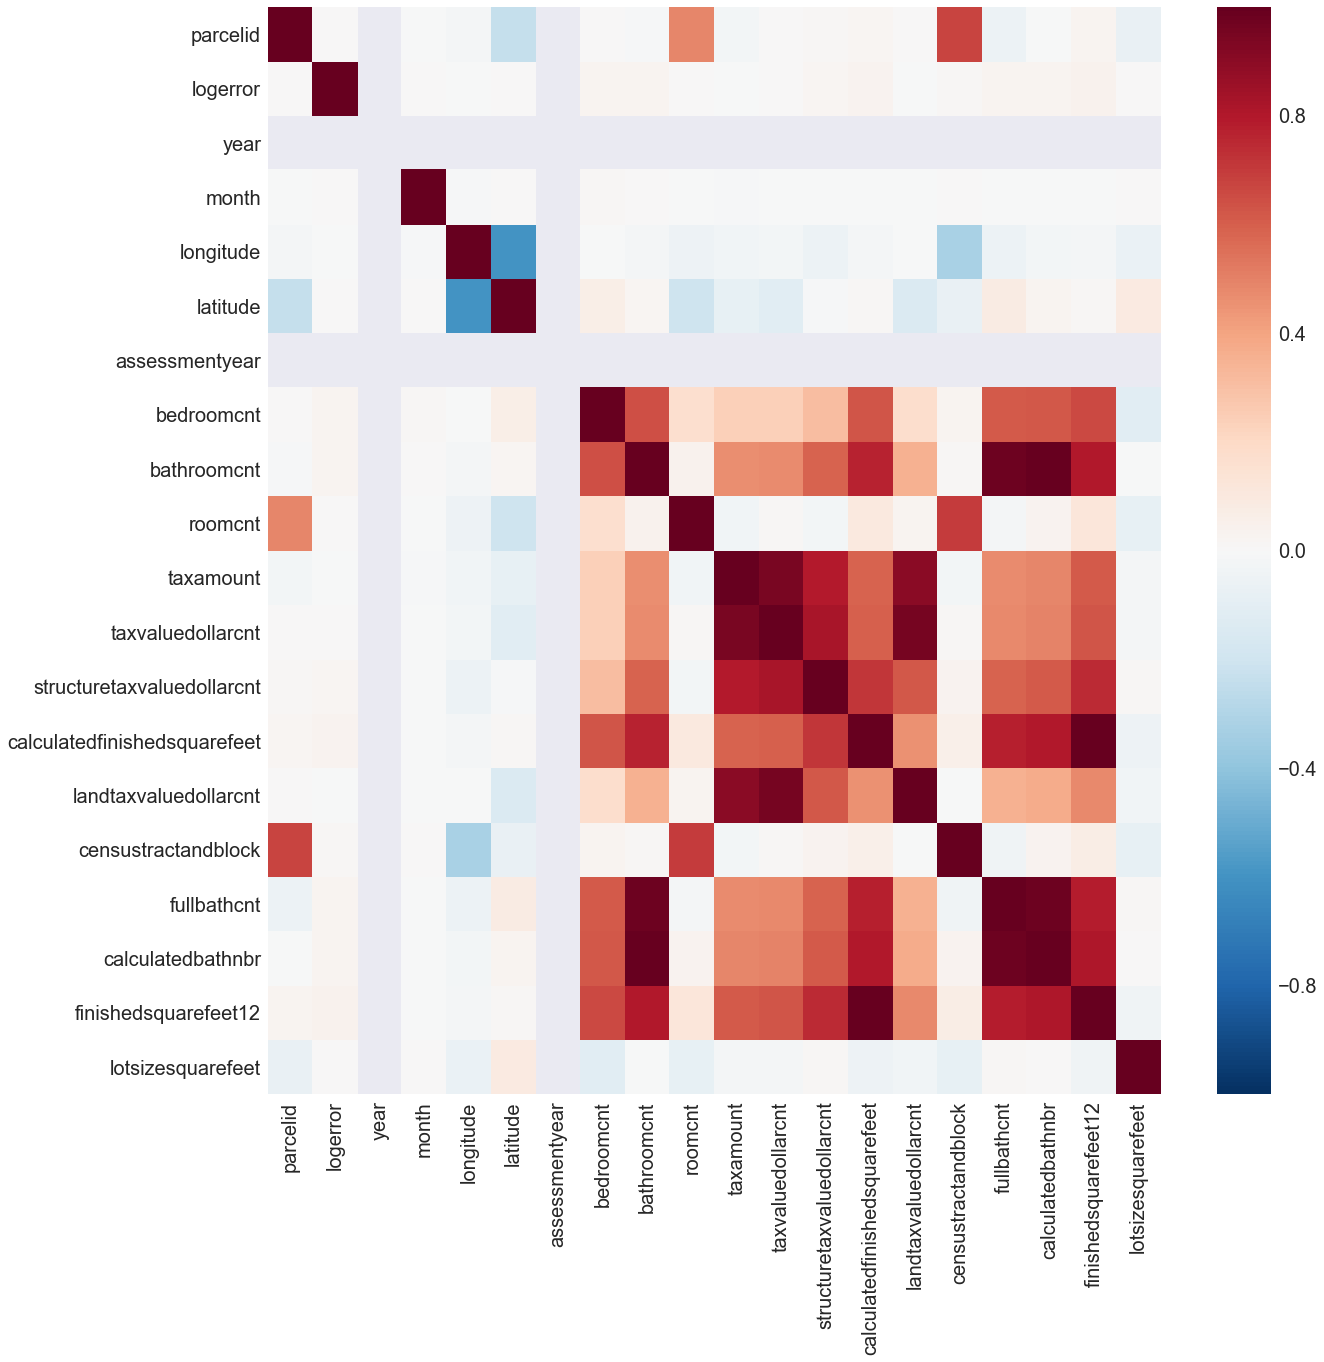

In [51]:
correlationForValidColumns(data_2016)

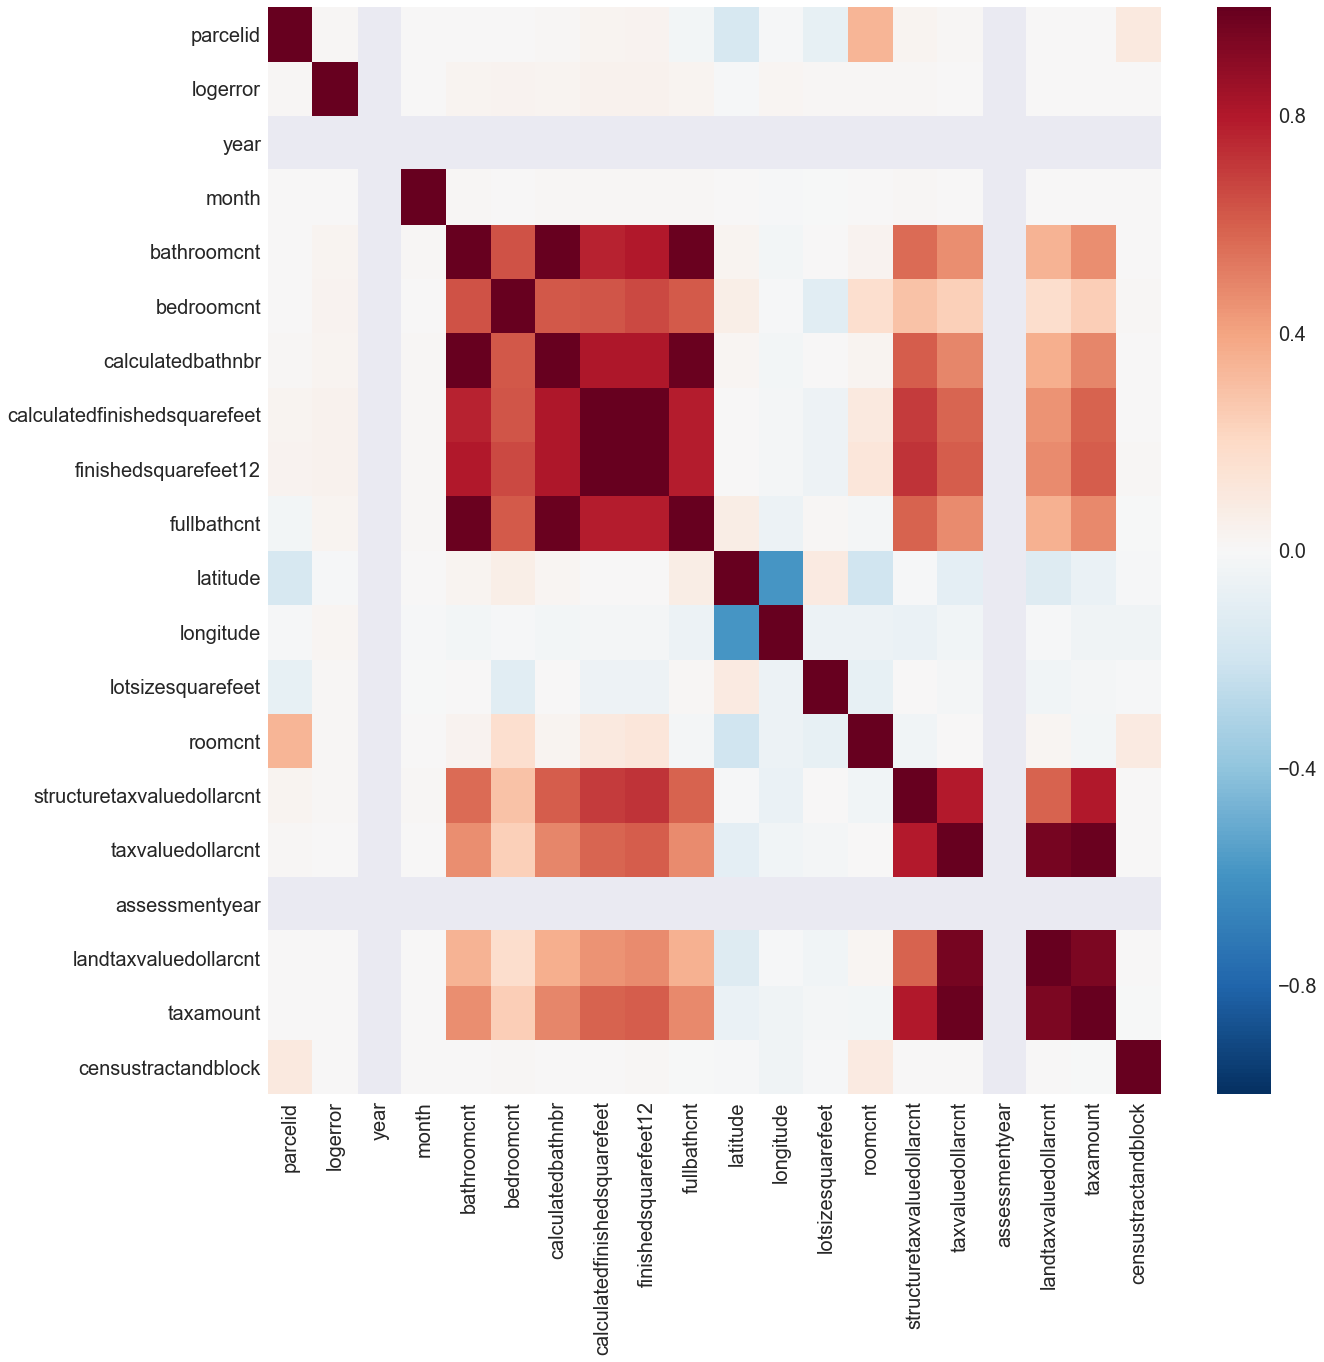

In [52]:
correlationForValidColumns(data_2017)

## Computing Correlation 

Looking at all the numerical data to plot the correlation with the target

In [78]:
# # Let us just impute the missing values with mean values to compute correlation coefficients #
def correlationComputation(yearValue):
    global corr_df
    mean_values = yearValue.mean(axis=0)
    yearValue = data_2017.fillna(mean_values, inplace=True)
    # Now let us look at the correlation coefficient of each of these variables #
    x_cols = [col for col in yearValue.columns if col not in ['logerror'] if (yearValue[col].dtype=='float64'or yearValue[col].dtype=='int64')]
    labels = []
    values = []
    for col in x_cols:
        labels.append(col)
        values.append(np.corrcoef(yearValue[col].values, yearValue.logerror.values)[0,1])
    corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
    corr_df = corr_df.sort_values(by='corr_values')

    ind = np.arange(len(labels))
    width = 0.9
    fig, ax = plt.subplots(figsize=(20,40))
    sns.set(font_scale = 2)
    rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
    ax.set_yticks(ind)
    ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
    ax.set_xlabel("Correlation coefficient")
    ax.set_title("Correlation coefficient of the variables")
    #autolabel(rects)
    plt.show()

looking at 2016 data

C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


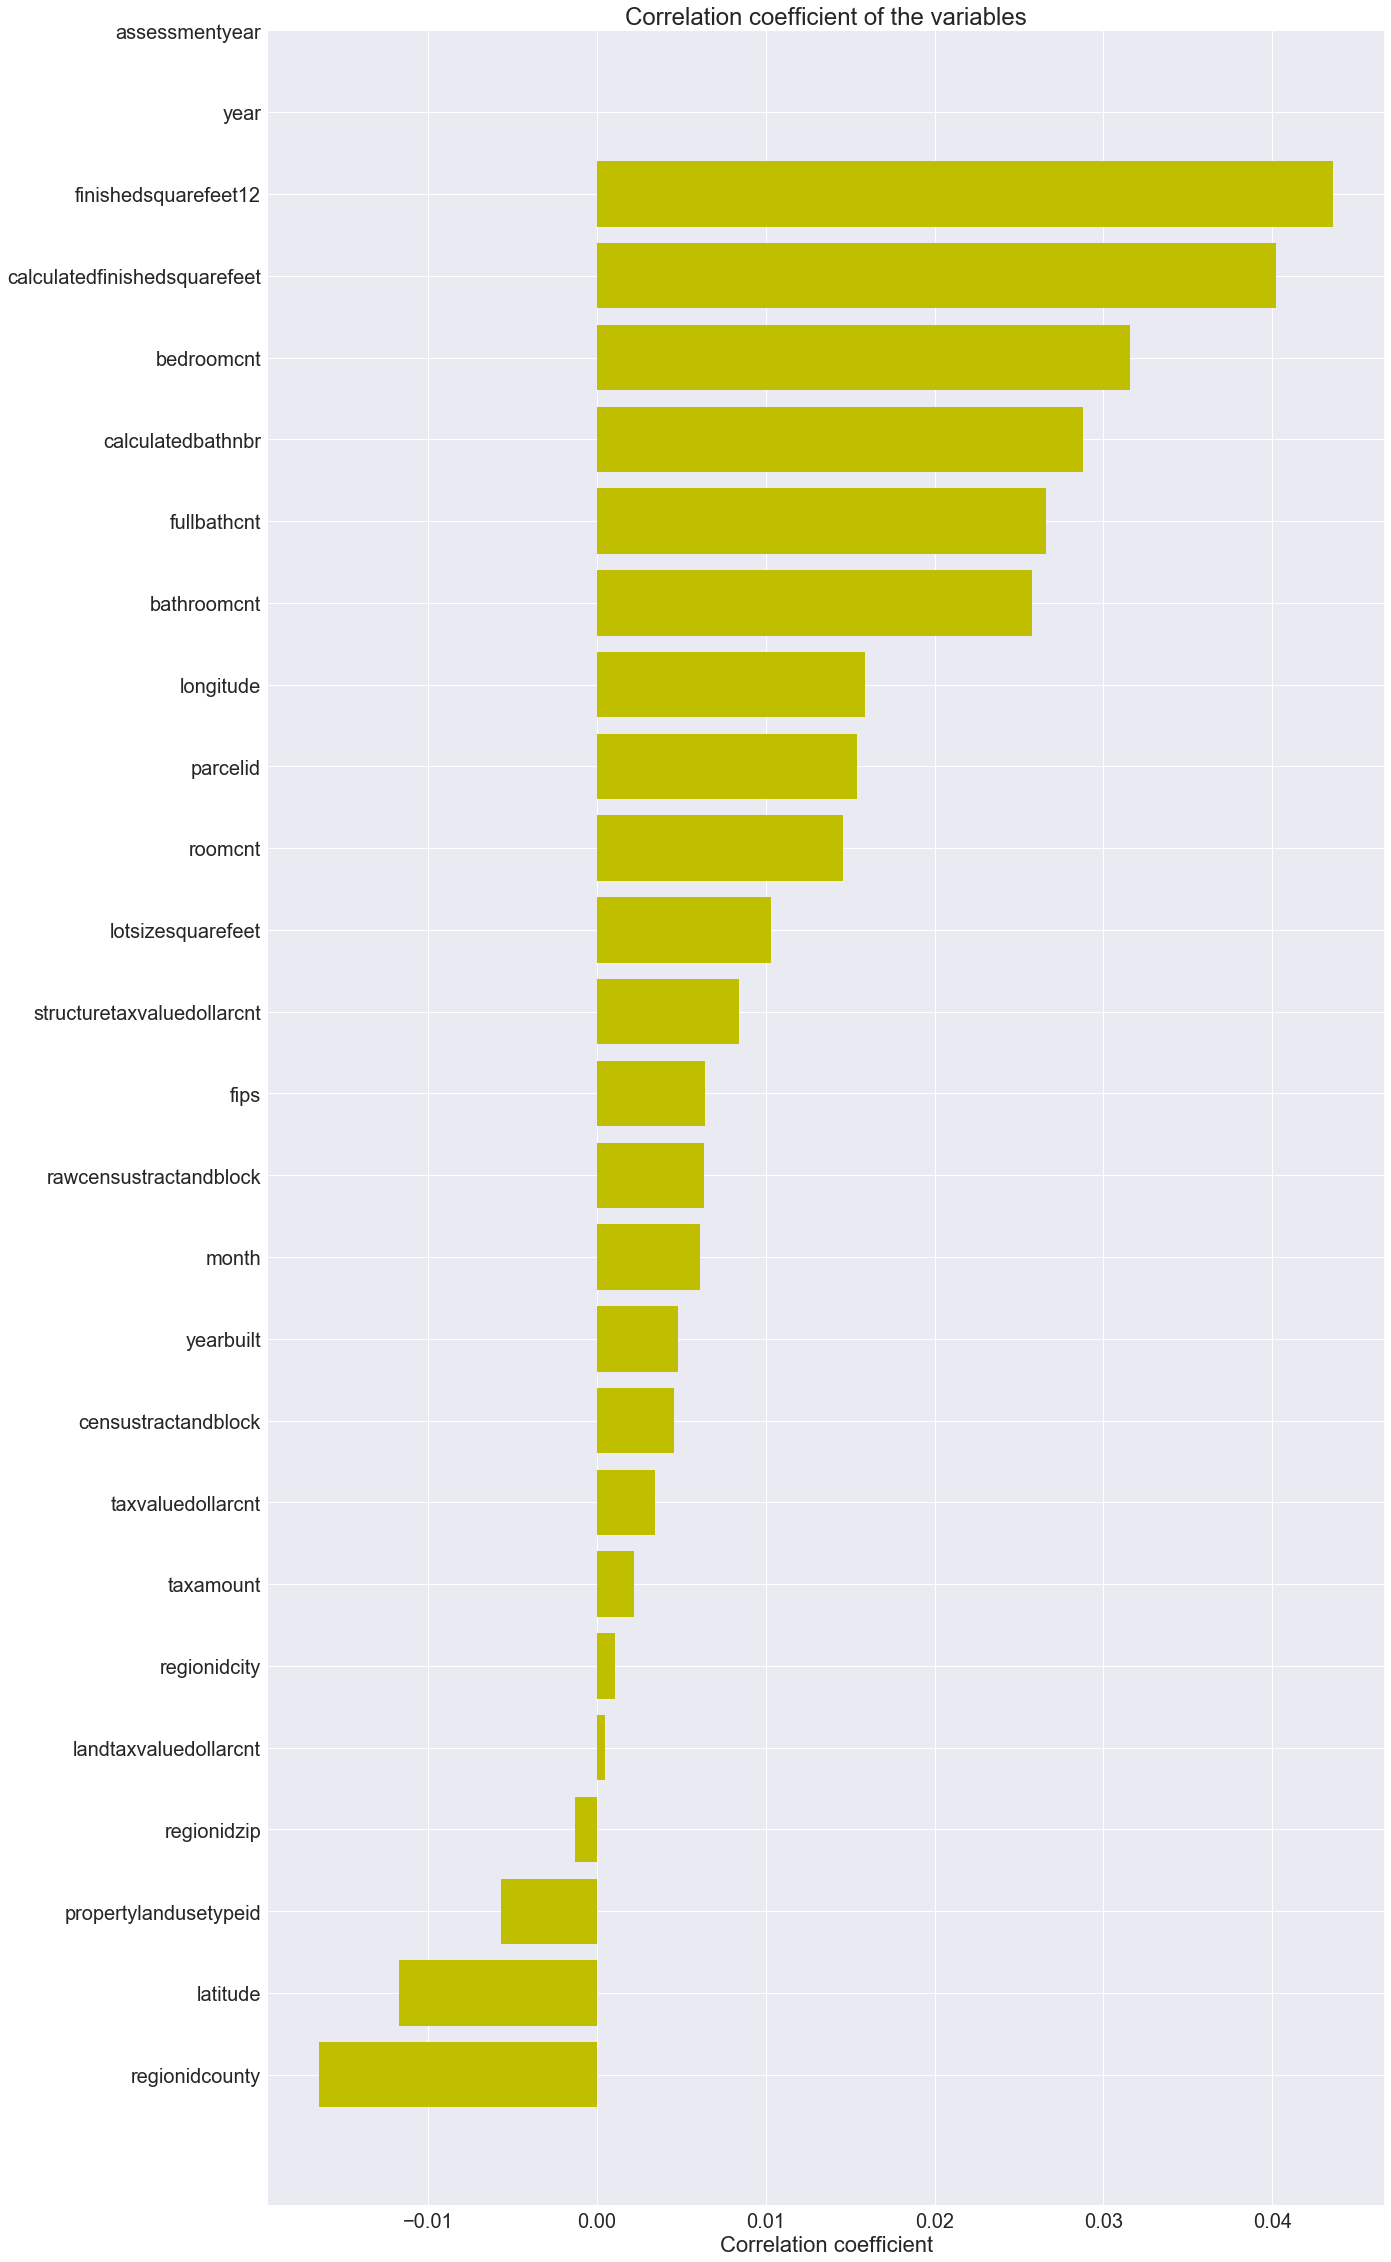

In [79]:
correlationComputation(data_2016)

 Picking the most correlated columns so can do more EDA on these

In [80]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


col_labels  corr_values
16                regionidcounty    -0.016475
10                      latitude    -0.011713
3                    bathroomcnt     0.025788
9                    fullbathcnt     0.026632
5              calculatedbathnbr     0.028789
4                     bedroomcnt     0.031603
6   calculatedfinishedsquarefeet     0.040233
7           finishedsquarefeet12     0.043625

looking at 2017 data

C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\madhu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


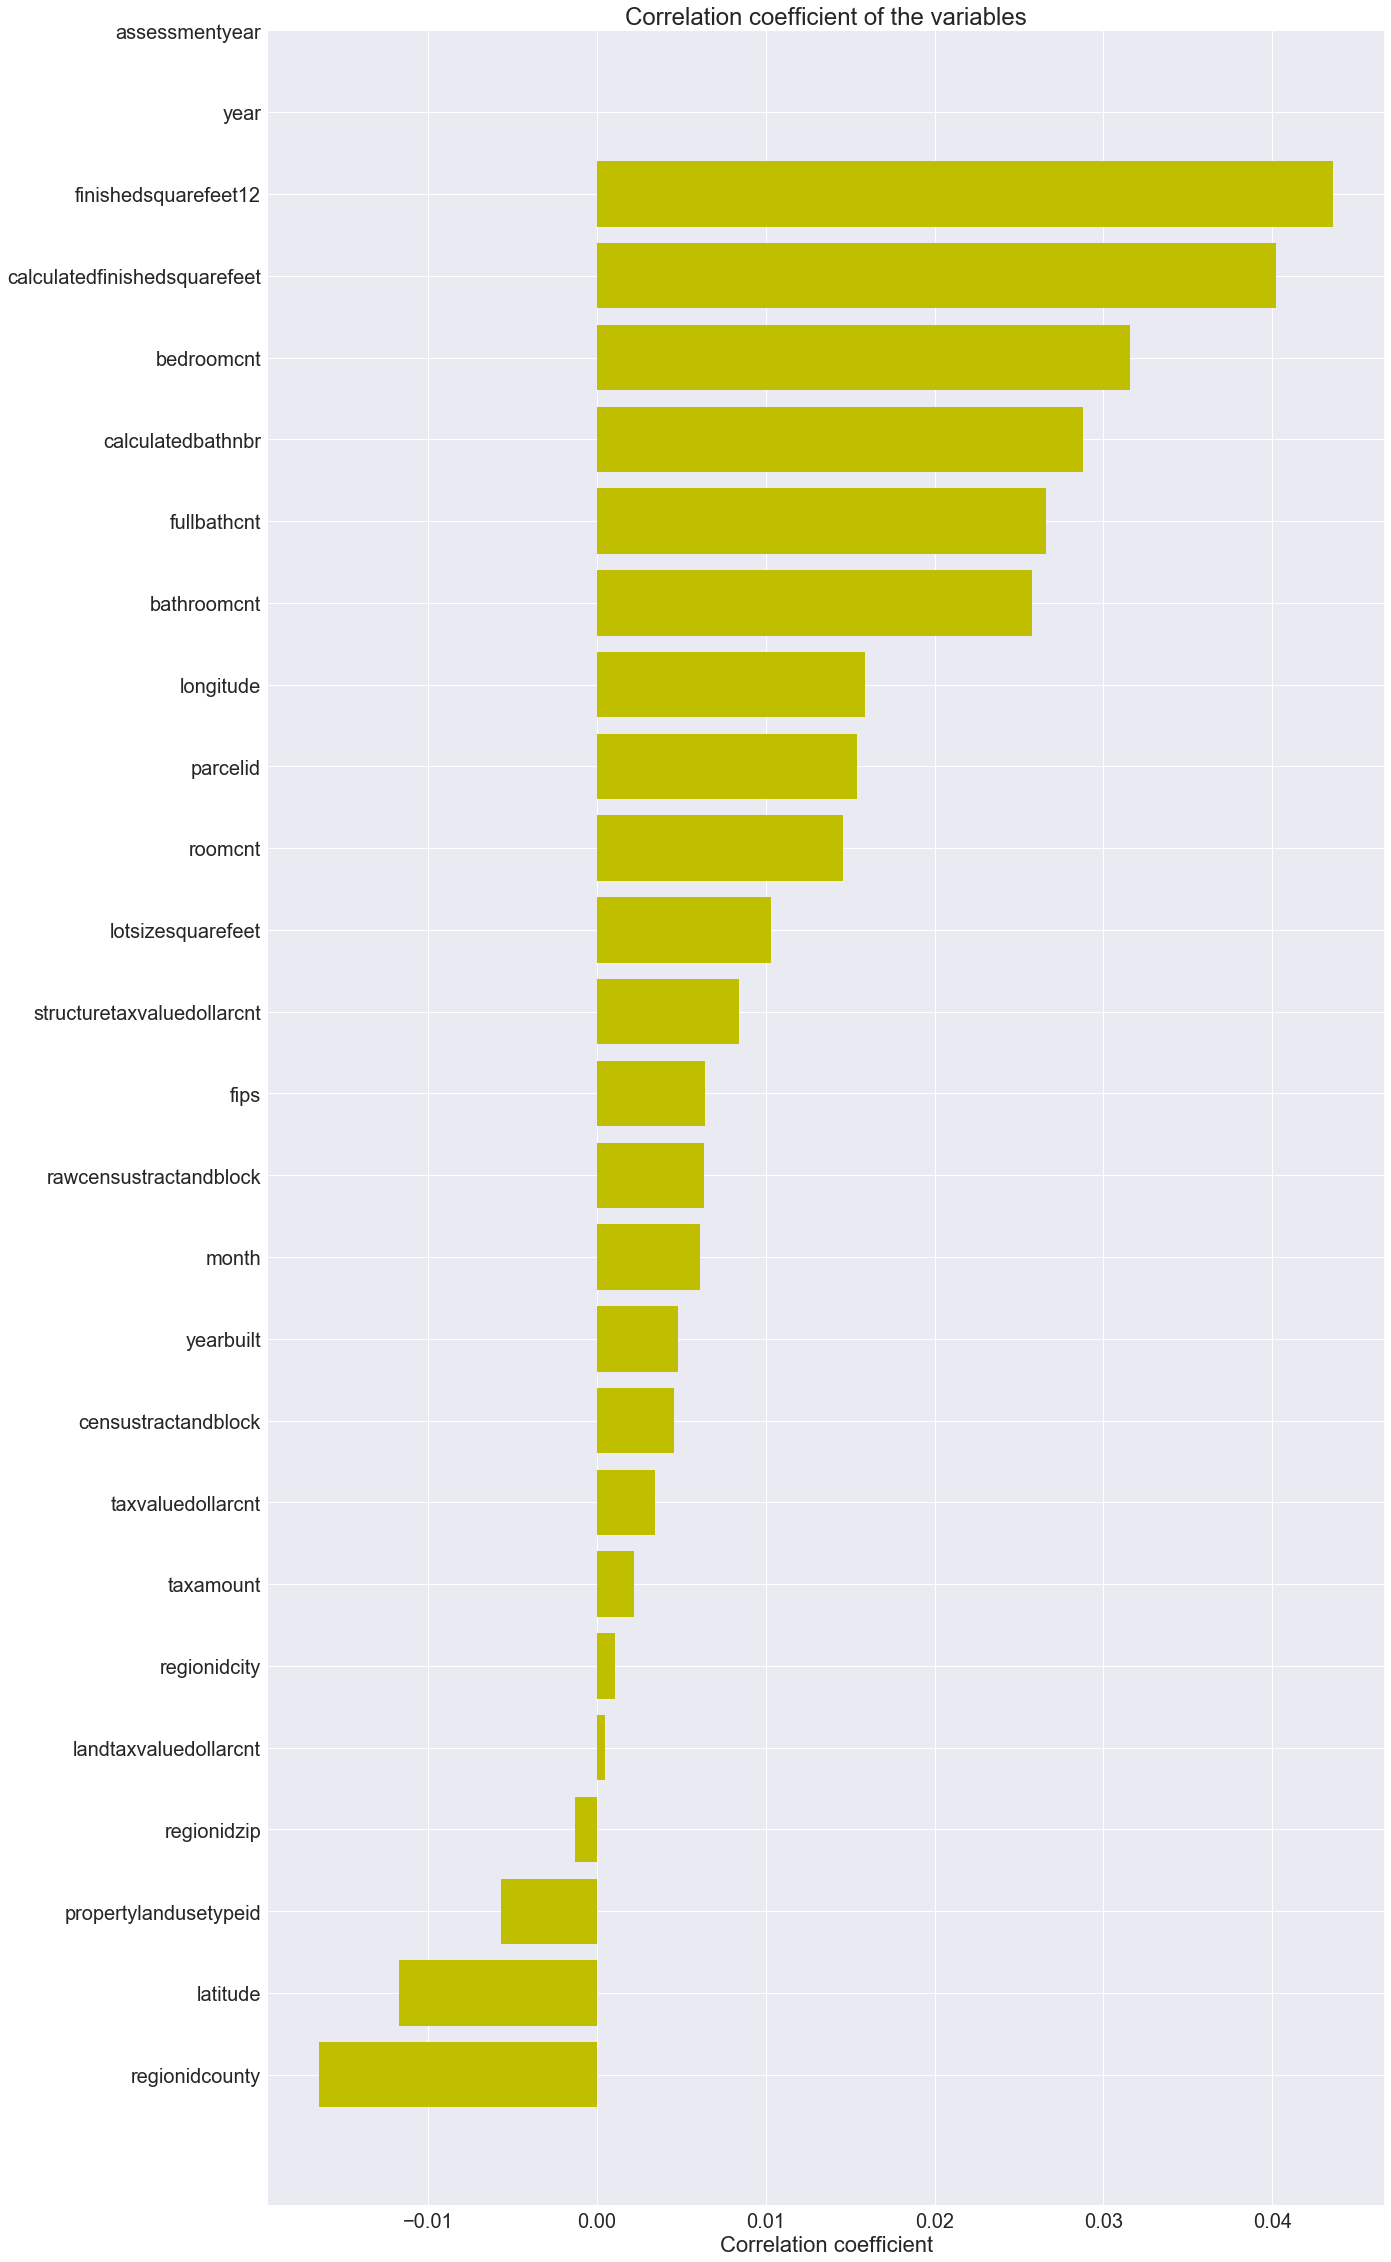

In [81]:
correlationComputation(data_2017)

Picking the most correlated columns so can do more EDA on these

In [101]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

col_labels  corr_values
16                regionidcounty    -0.016475
10                      latitude    -0.011713
3                    bathroomcnt     0.025788
9                    fullbathcnt     0.026632
5              calculatedbathnbr     0.028789
4                     bedroomcnt     0.031603
6   calculatedfinishedsquarefeet     0.040233
7           finishedsquarefeet12     0.043625

## Correlation Violin plots for each of the highly correlated columns

Violin plot shows not just the box plot but the actual weight/quantity of each value

### The Property landuse type code

#### Violin Plot

In [283]:
def violinpltpropertylandusetypeid(yearValue):
    plt.figure(figsize=(20,10))
    sns.set(font_scale = 2)
    sns.violinplot(x='propertylandusetypeid', y='logerror', data=yearValue, hue='fips')
    plt.show()

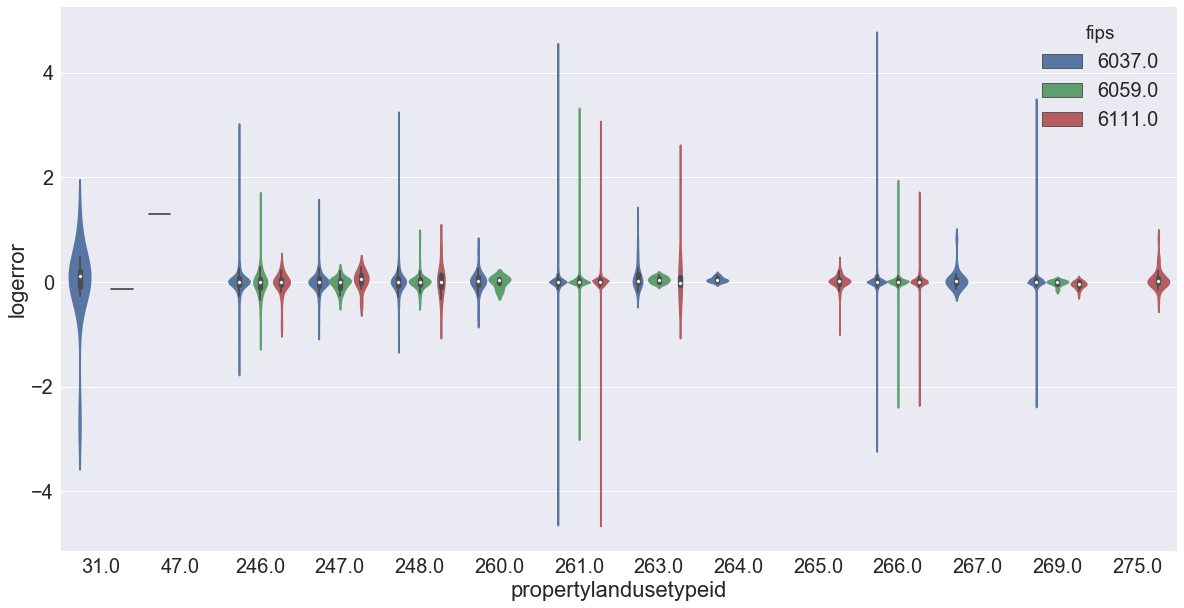

In [284]:
violinpltpropertylandusetypeid(data_2016)

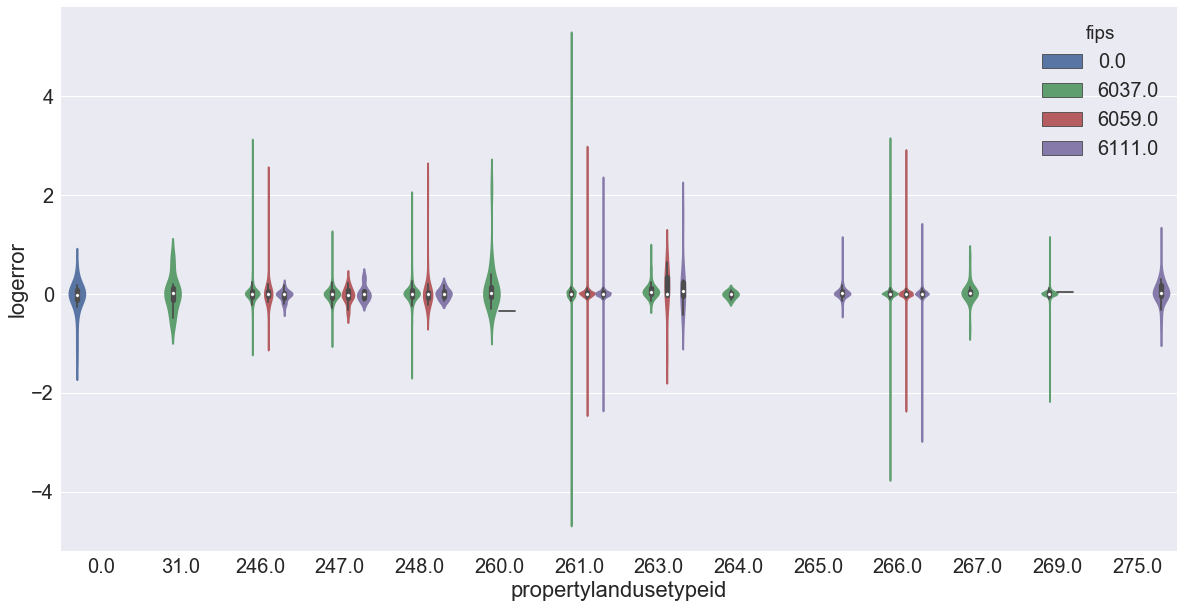

In [285]:
violinpltpropertylandusetypeid(data_2017)

#### Box plot

In [136]:
def boxPlotCatagoricalData(yearValue):
    plt.figure(figsize=(20,12))
    sns.boxplot(x="propertycountylandusecode", y="logerror", data=yearValue);
    plt.ylabel('Log error', fontsize=16)
    plt.xlabel('Property County Land Use Code', fontsize=16)
    plt.xticks(rotation='vertical')
    plt.title("How property county land use code changes with bathroom count?", fontsize=22)
    plt.show()

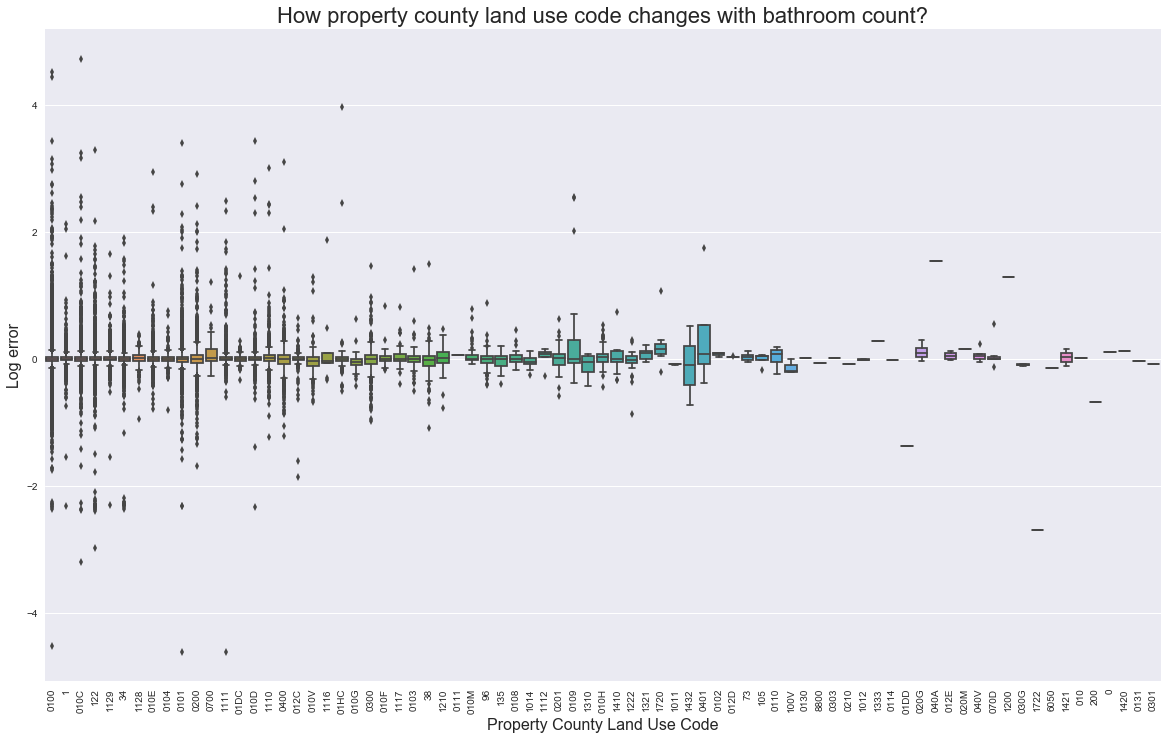

In [137]:
boxPlotCatagoricalData(data_2016)

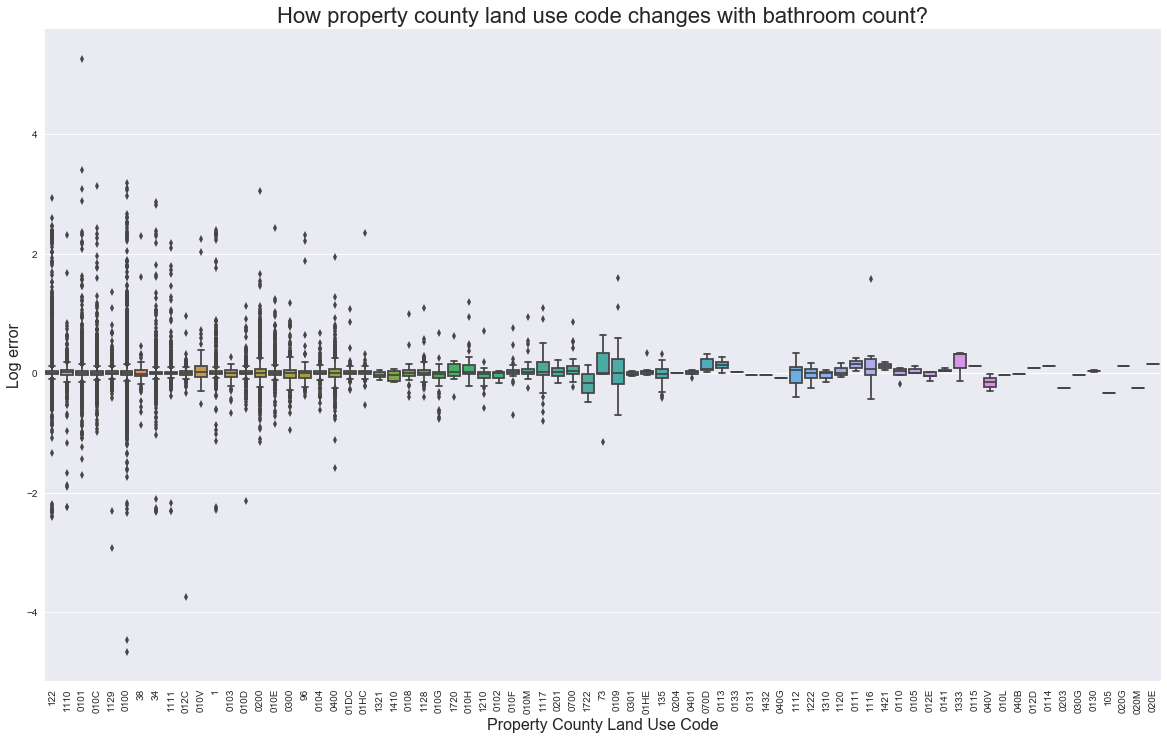

In [138]:
boxPlotCatagoricalData(data_2017)

### Correlation Between Logerror and Bedroom count

In [93]:
def violinpltBedroom(yearValue):    
    plt.figure(figsize=(20,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='bedroomcnt', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Bedroom count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

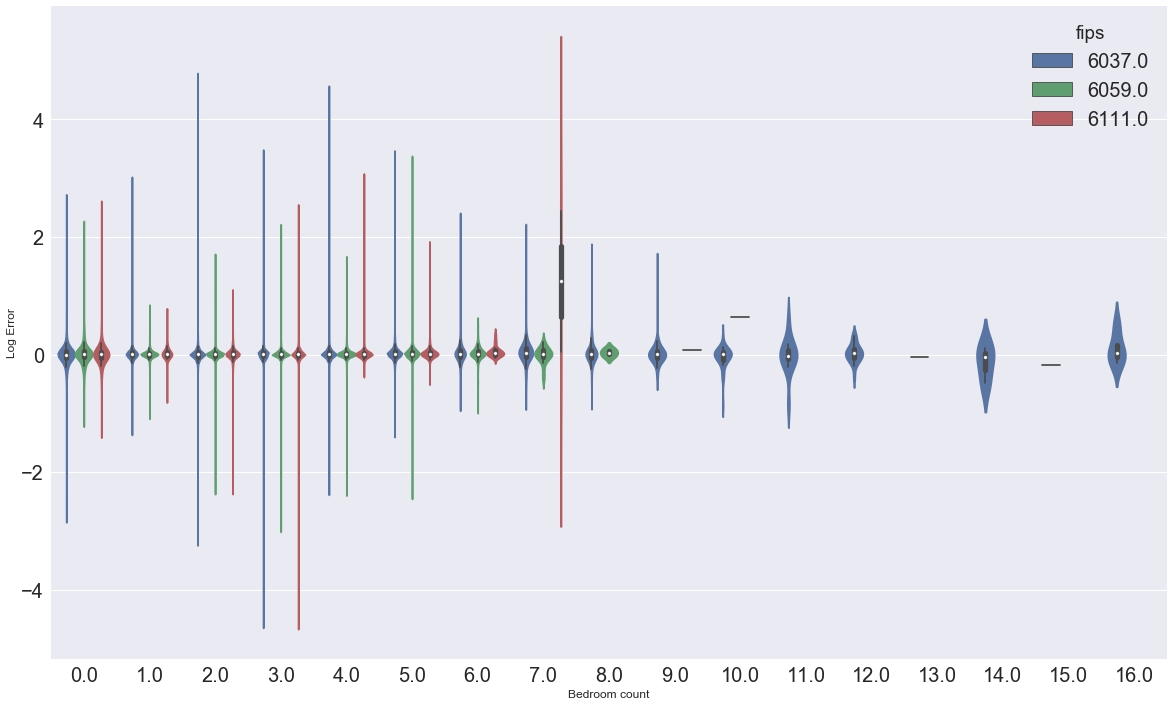

In [94]:
violinpltBedroom(data_2016)

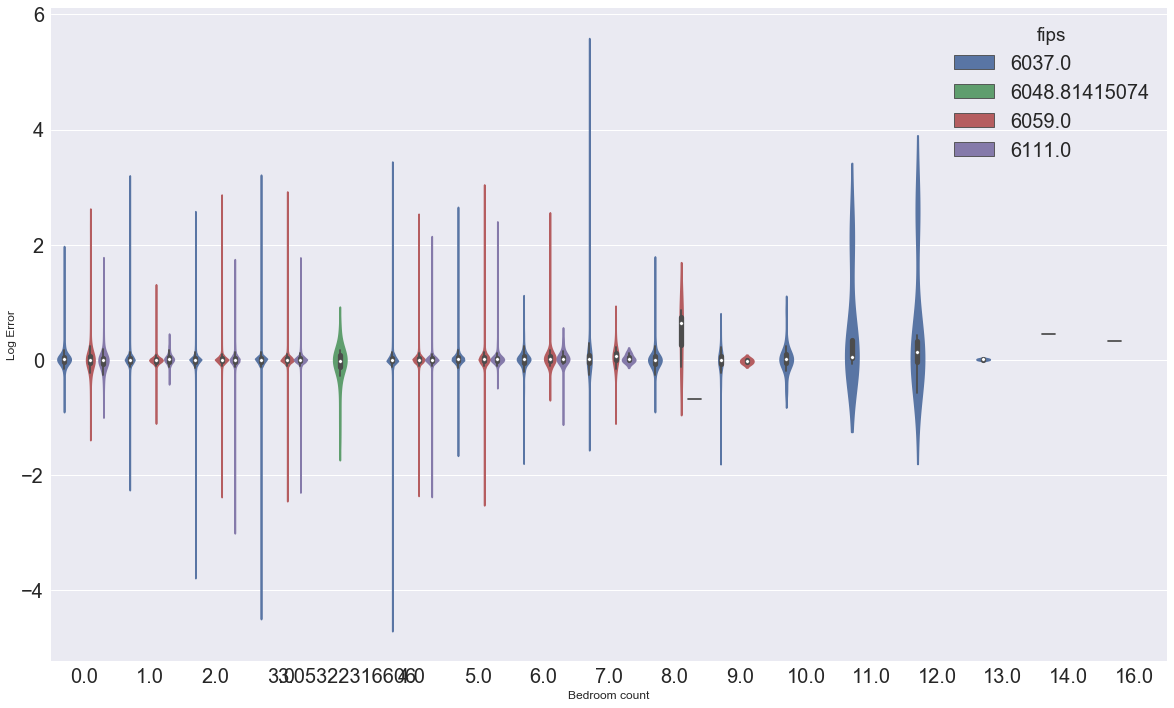

In [95]:
violinpltBedroom(data_2017)

### Correlation Between Logerror and Region County

In [83]:
def regionidcountyViolinGraph(yearValue):
    plt.figure(figsize=(20,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='regionidcounty', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Region County count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

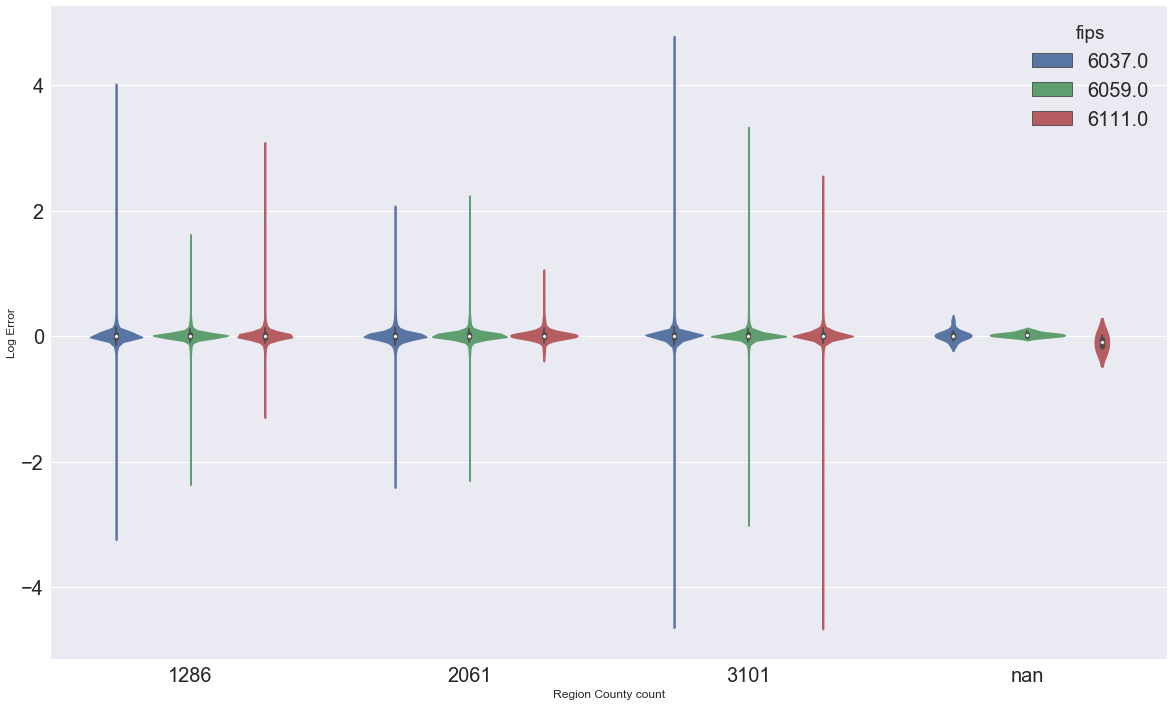

In [84]:
regionidcountyViolinGraph(data_2016)

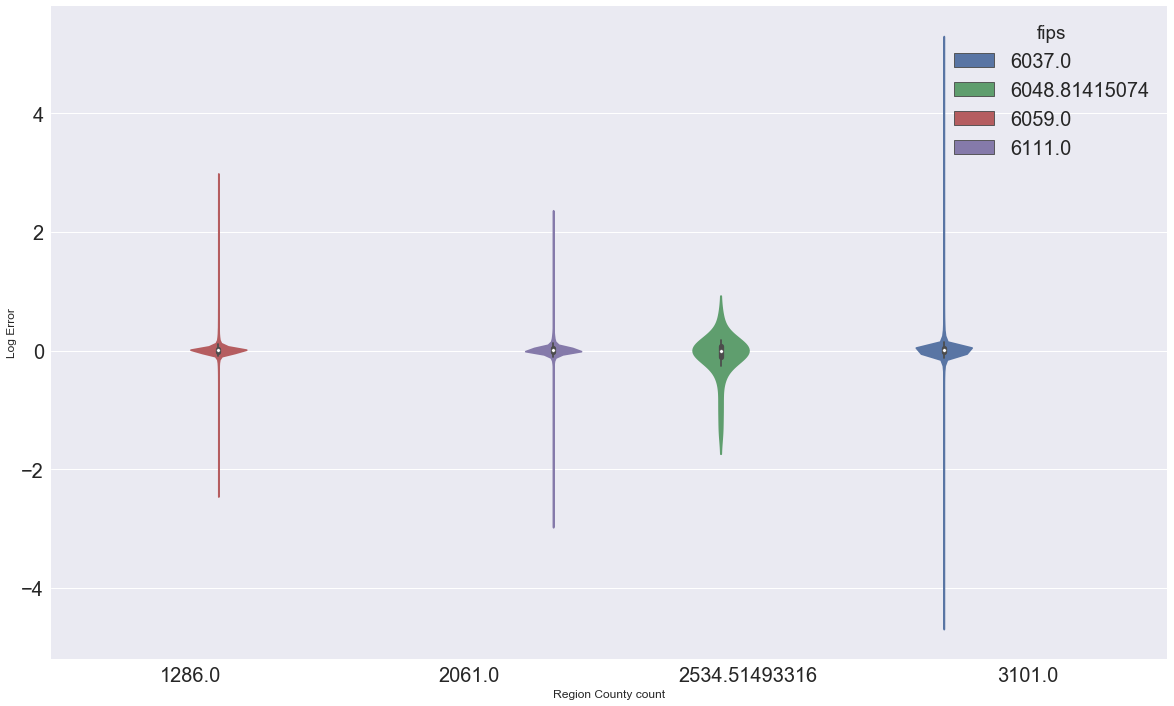

In [85]:
regionidcountyViolinGraph(data_2017)

### Correlation Between Logerror and bathroom count 

In [89]:
def bathroomcntViolinGraph(yearValue):
    plt.figure(figsize=(25,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='bathroomcnt', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('bathroom count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

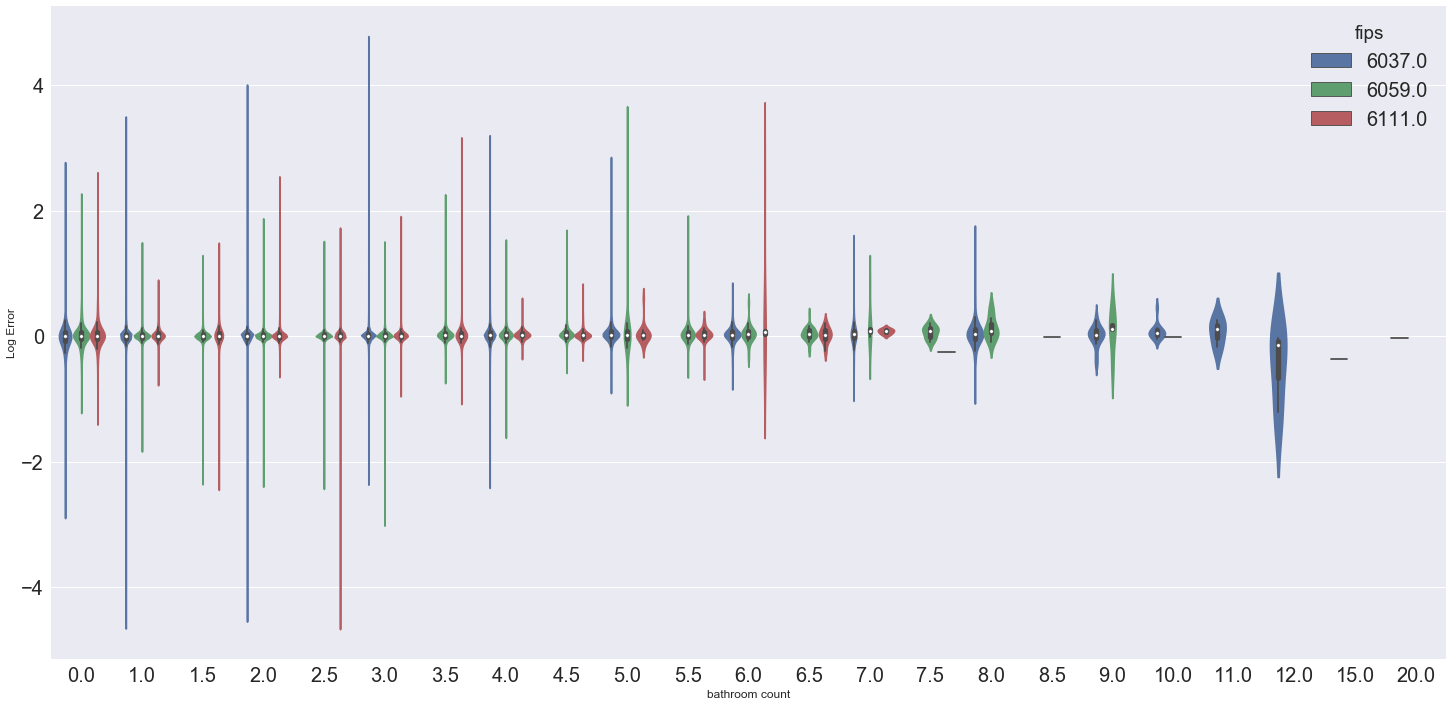

In [90]:
bathroomcntViolinGraph(data_2016)

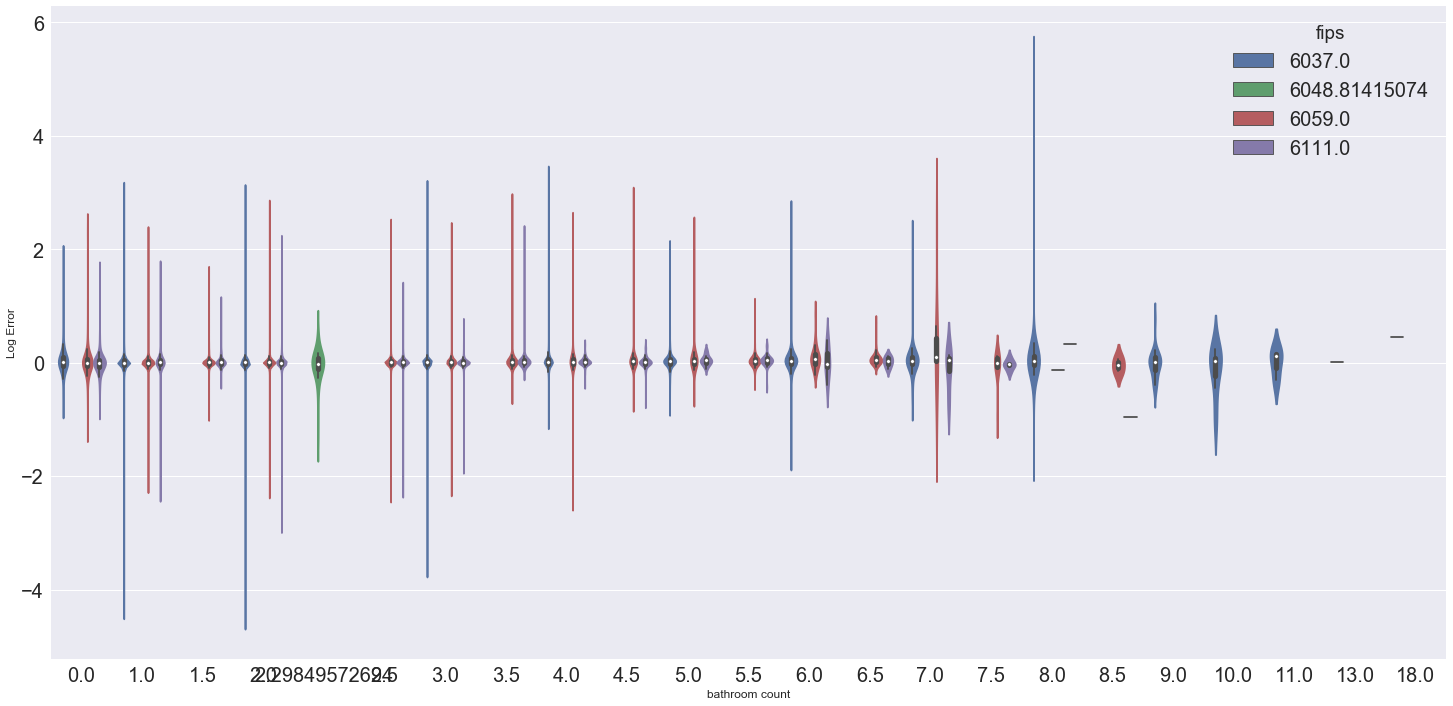

In [91]:
bathroomcntViolinGraph(data_2017)

### Correlation Between Logerror and full bathroom count

In [96]:
def fullbathcntViolinPlt(yearValue):
    plt.figure(figsize=(25,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='fullbathcnt', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('full bathroom count', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

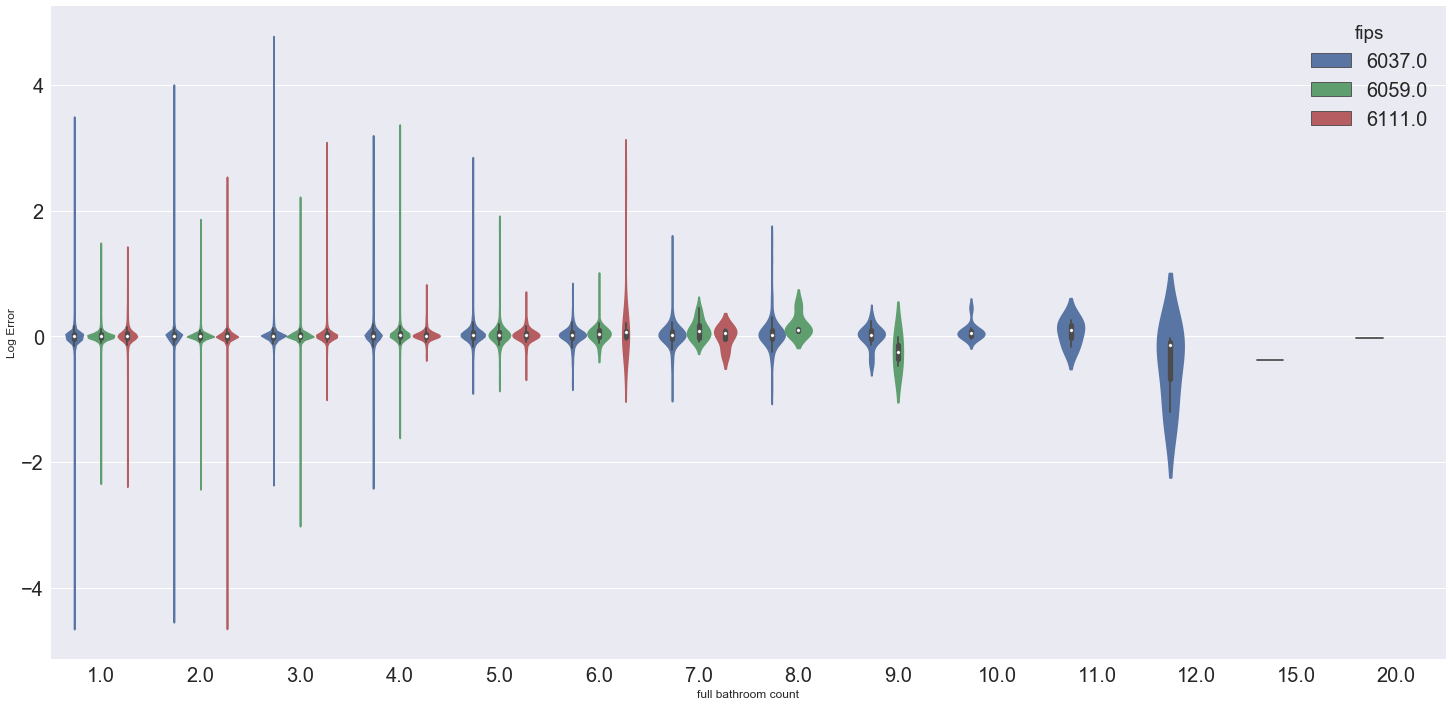

In [97]:
fullbathcntViolinPlt(data_2016)

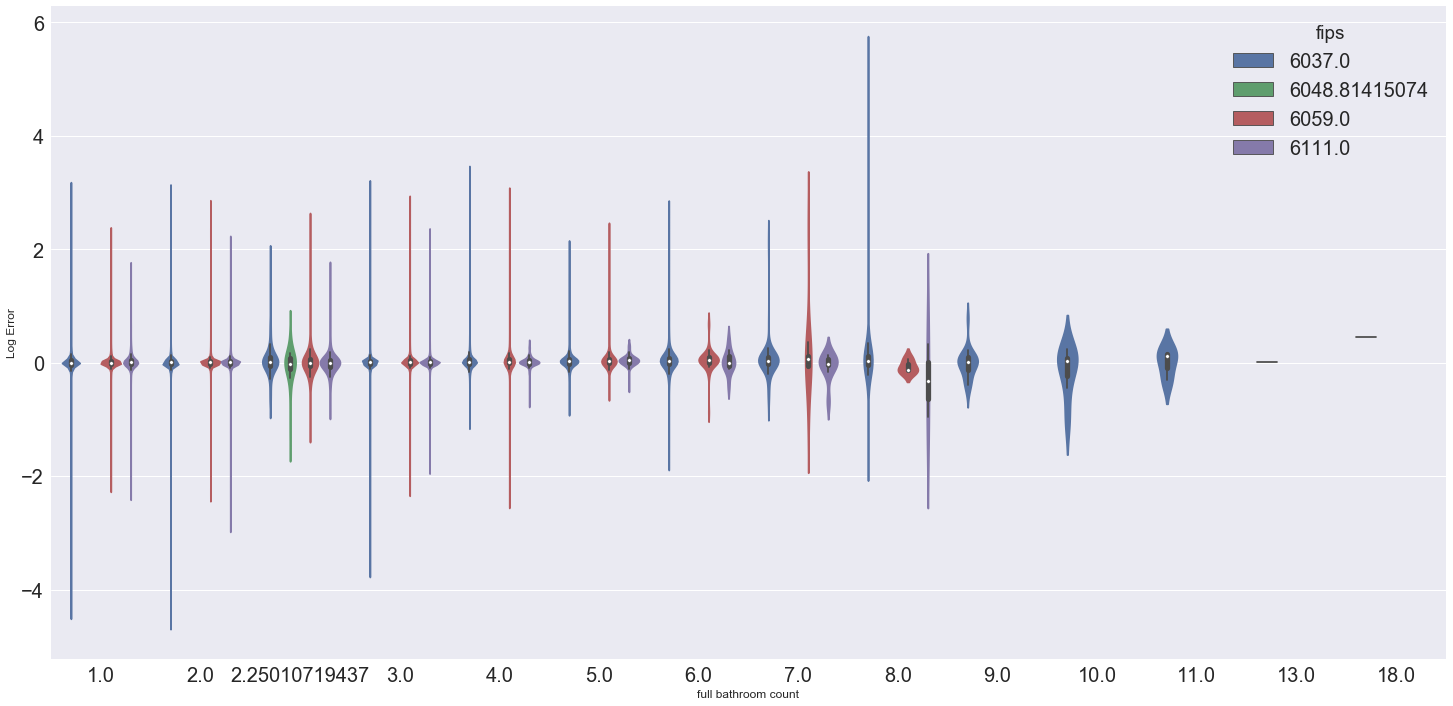

In [98]:
fullbathcntViolinPlt(data_2017)

### Correlation Between Logerror and Calculated Funished sqr feet

In [104]:
def calculatedfinishedsquarefeetViolinPlt(yearValue):
    plt.figure(figsize=(25,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='calculatedfinishedsquarefeet', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Calculated Finished Square Feet', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

In [105]:
calculatedfinishedsquarefeetViolinPlt(data_2016)

KeyboardInterrupt: 

In [ ]:
calculatedfinishedsquarefeetViolinPlt(data_2017)

### Correlation Between Logerror and Funished sqr feet

In [106]:
def finishedsquarefeet12ViolinPlt(yearValue):
    plt.figure(figsize=(25,12))
    sns.set(font_scale = 2)
    sns.violinplot(x='finishedsquarefeet12', y='logerror', data=yearValue, hue='fips', size=1)
    plt.xlabel('Finished Square Feet', fontsize=12)
    plt.ylabel('Log Error', fontsize=12)
    plt.show()

In [111]:
finishedsquarefeet12ViolinPlt(data_2016)

KeyboardInterrupt: 

In [ ]:
finishedsquarefeet12ViolinPlt(data_2017)

## Each column checked for corralation against logError

In [115]:
data_2016 = pd.merge(trans_2016,properties_2016,on='parcelid', how='left')
data_2017 = pd.merge(trans_2017,properties_2017,on='parcelid', how='left')

In [127]:
def correlationGraphPerColumnOne(yearValue):
    fig  = plt.figure(figsize=(9, 9), dpi=100);
    sns.set(font_scale = 1)

    axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
    axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
    axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); axes9 = fig.add_subplot(339); 

    sns.regplot(x='fips', y='logerror', data=yearValue, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='propertylandusetypeid', y='logerror', data=yearValue, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='rawcensustractandblock', y='logerror', data=yearValue, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='regionidcounty', y='logerror', data=yearValue, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='longitude', y='logerror', data=yearValue, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='latitude', y='logerror', data=yearValue, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='assessmentyear', y='logerror', data=yearValue, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='bedroomcnt', y='logerror', data=yearValue, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='bathroomcnt', y='logerror', data=yearValue, ax=axes9, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

    axes9.set_xlim(0, 30)

    fig.tight_layout();
    plt.show()

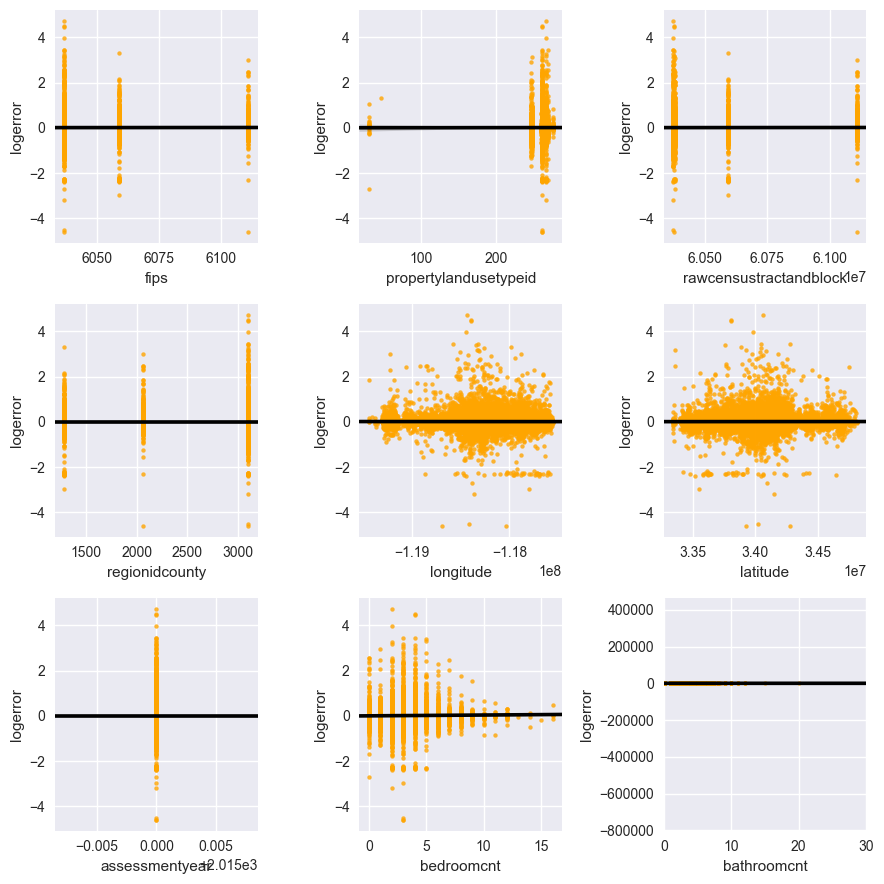

In [128]:
correlationGraphPerColumnOne(data_2016)

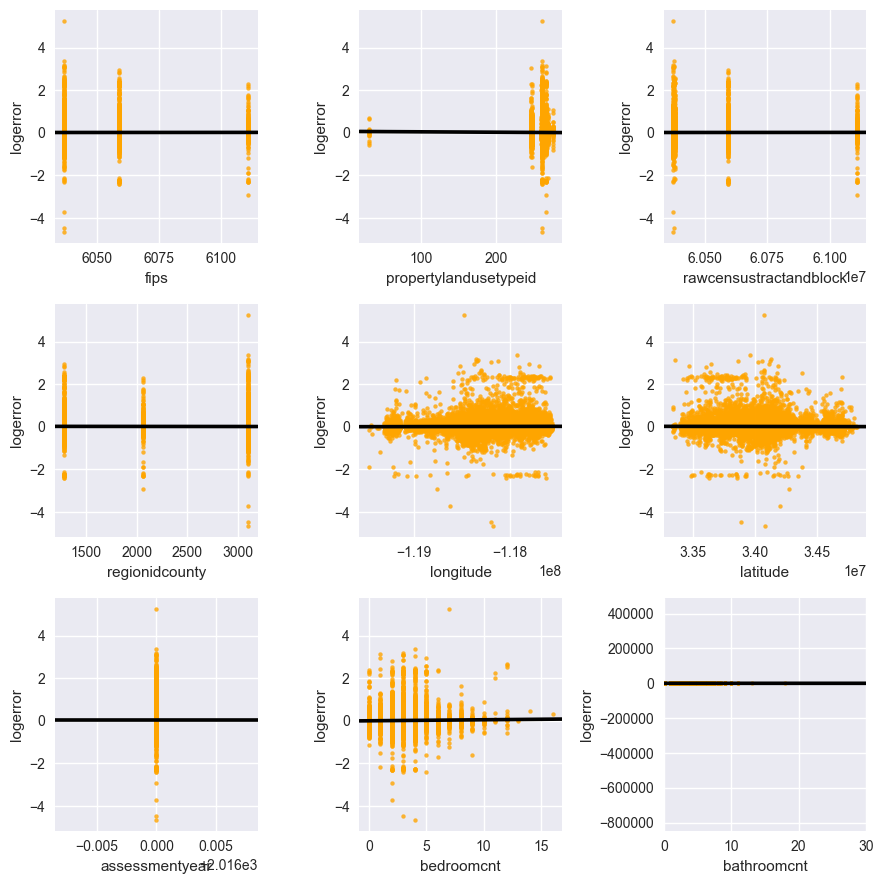

In [129]:
correlationGraphPerColumnOne(data_2017)

In [168]:
def correlationGraphPerColumnTwo(yearValue):
    fig  = plt.figure(figsize=(12, 12), dpi=100);
    sns.set(font_scale = 1)


    axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
    axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
    axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); 

    sns.regplot(x='landtaxvaluedollarcnt', y='logerror', data=yearValue, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='regionidzip', y='logerror', data=yearValue, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='taxamount', y='logerror', data=yearValue, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='taxvaluedollarcnt', y='logerror', data=yearValue, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='structuretaxvaluedollarcnt', y='logerror', data=yearValue, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='calculatedfinishedsquarefeet', y='logerror', data=yearValue, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='yearbuilt', y='logerror', data=yearValue, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='regionidcity', y='logerror', data=yearValue, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

    axes8.set_xlim(0, 30)

    fig.tight_layout();
    plt.show()

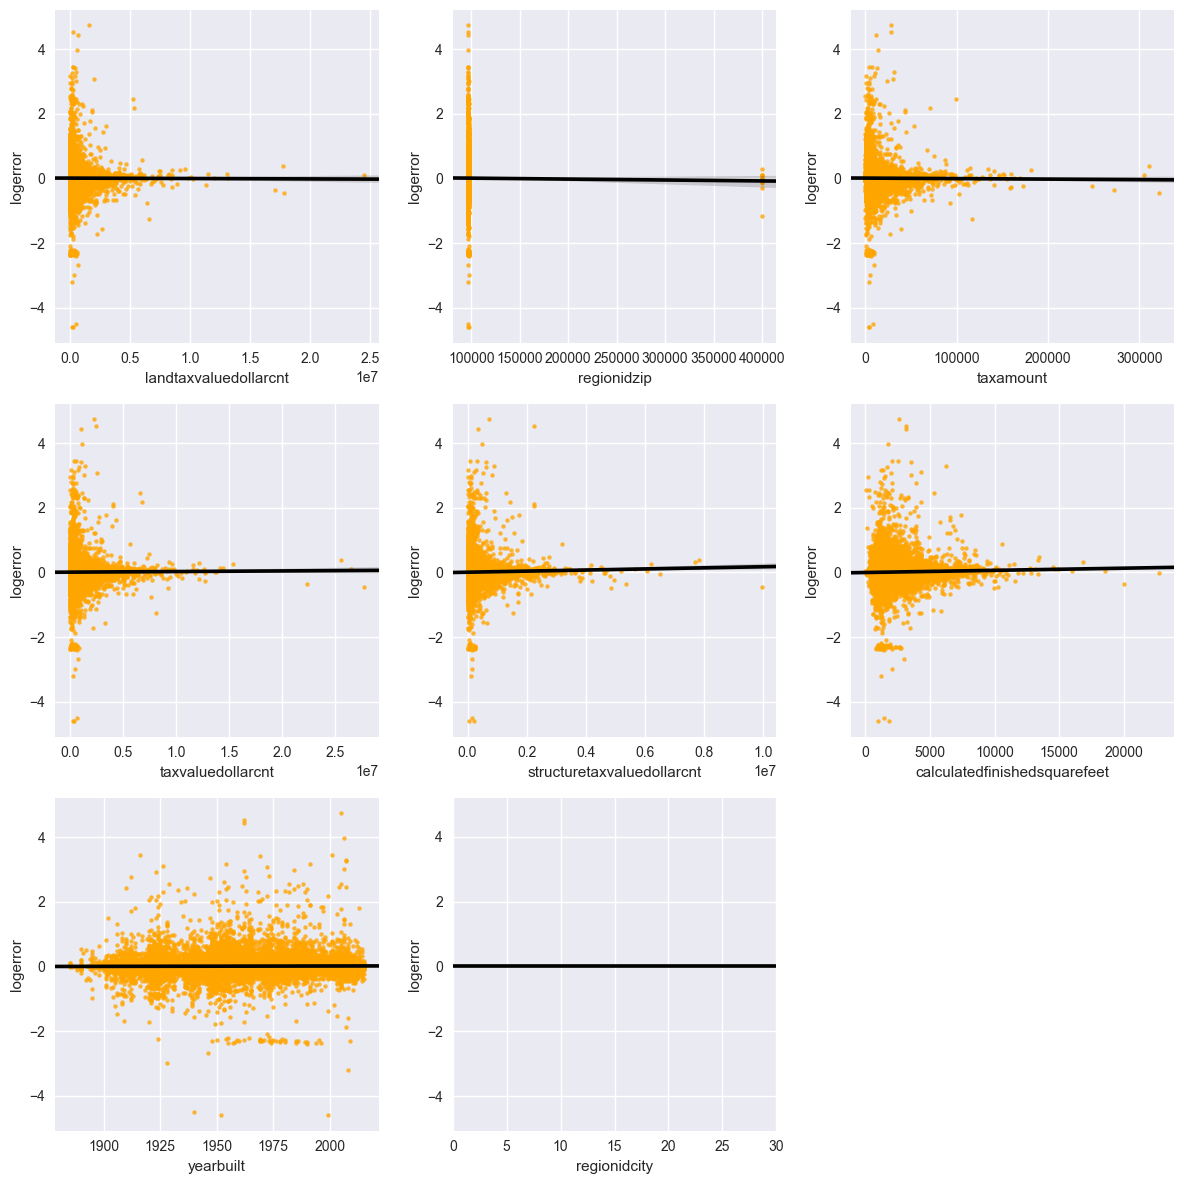

In [169]:
correlationGraphPerColumnTwo(data_2016)

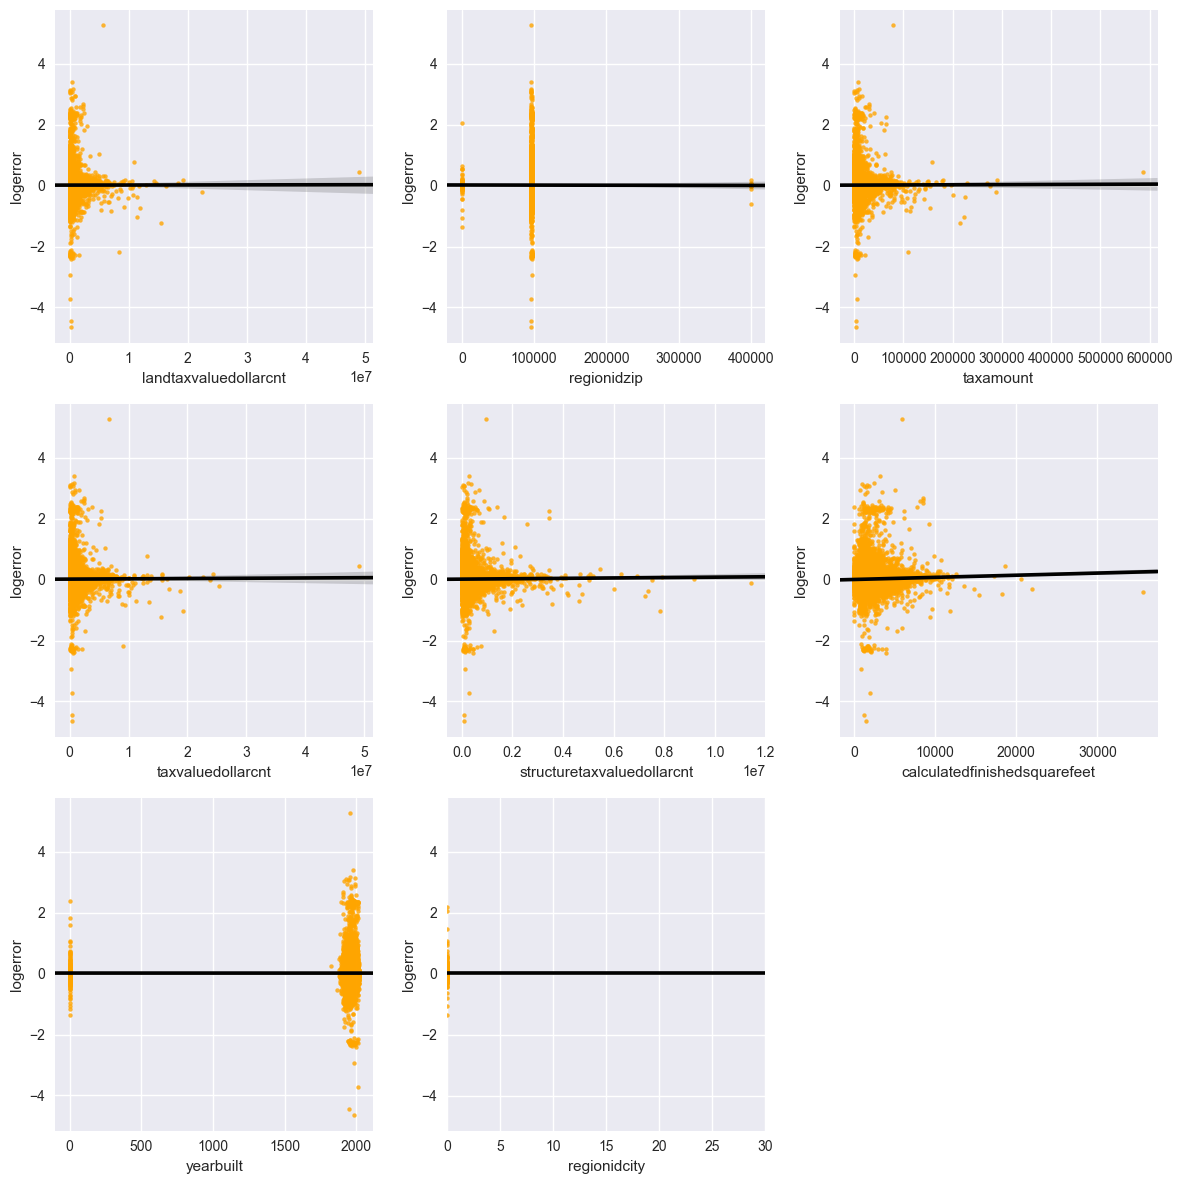

In [178]:
correlationGraphPerColumnTwo(data_2017)

In [235]:
def correlationGraphPerColumnThree(yearValue):
    fig  = plt.figure(figsize=(9, 9), dpi=100);
    sns.set(font_scale = 1)

    axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
    axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 

    sns.regplot(x='landtaxvaluedollarcnt', y='logerror', data=yearValue, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='censustractandblock', y='logerror', data=yearValue, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='fullbathcnt', y='logerror', data=yearValue, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='calculatedbathnbr', y='logerror', data=yearValue, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='finishedsquarefeet12', y='logerror', data=yearValue, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
    sns.regplot(x='lotsizesquarefeet', y='logerror', data=yearValue, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

    axes6.set_xlim(0, 30)

    fig.tight_layout();
    plt.show()

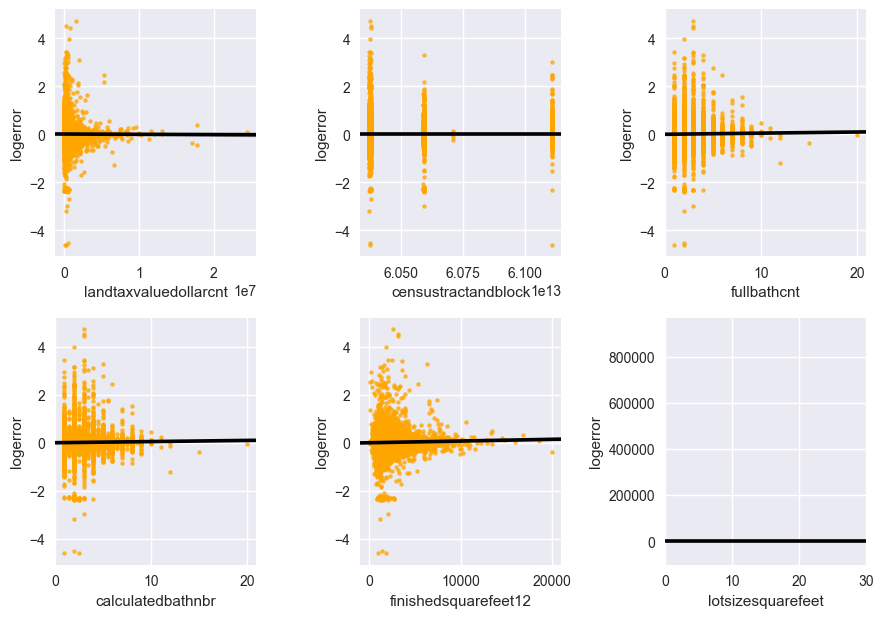

In [236]:
correlationGraphPerColumnThree(data_2016)

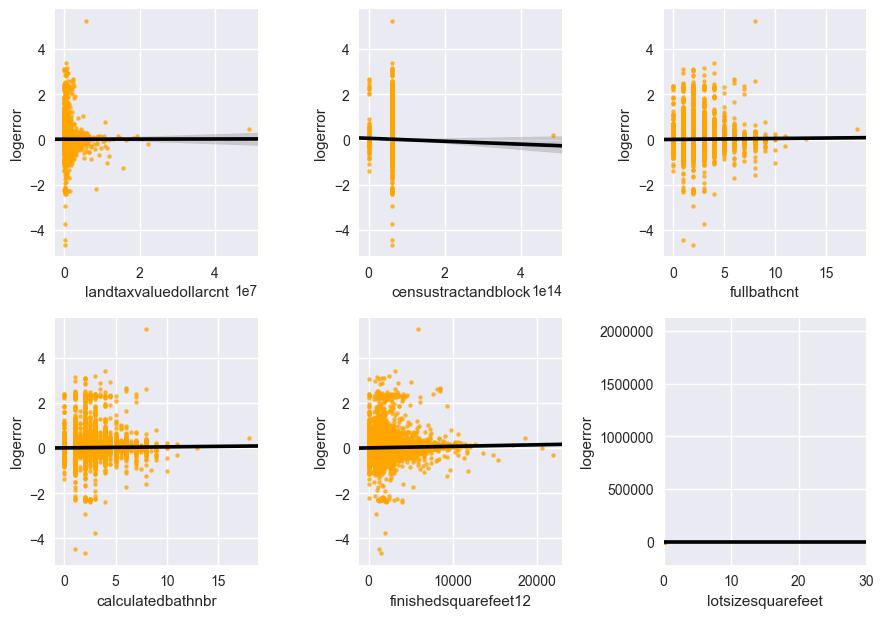

In [237]:
correlationGraphPerColumnThree(data_2017)

# Joint Plot for all columns

### Shows the distribution of each variable and also the corralation

In [182]:
def jointDistribution(yearValue):
    colName = selectedColumnForYear(yearValue)
    for col in colName:
        print(col)
        plt.figure(figsize=(12,12), dpi=100)
        sns.set(font_scale = 1)
        sns.jointplot(x=col, y='logerror', data=yearValue, size=12, color=color[5]);
        plt.show()

fips


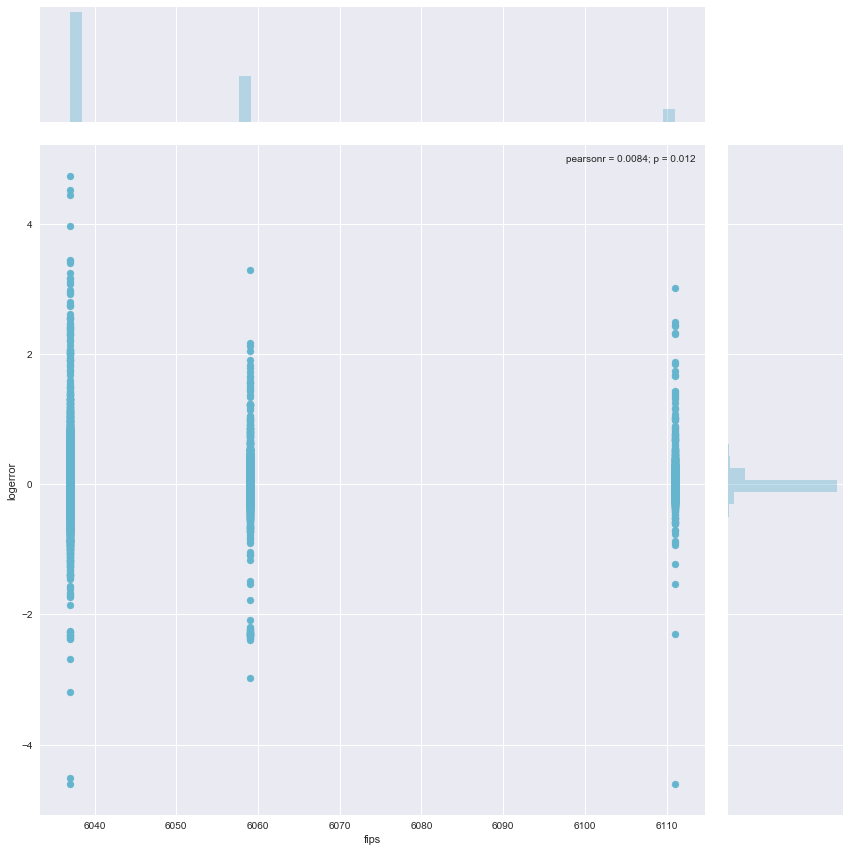

propertylandusetypeid


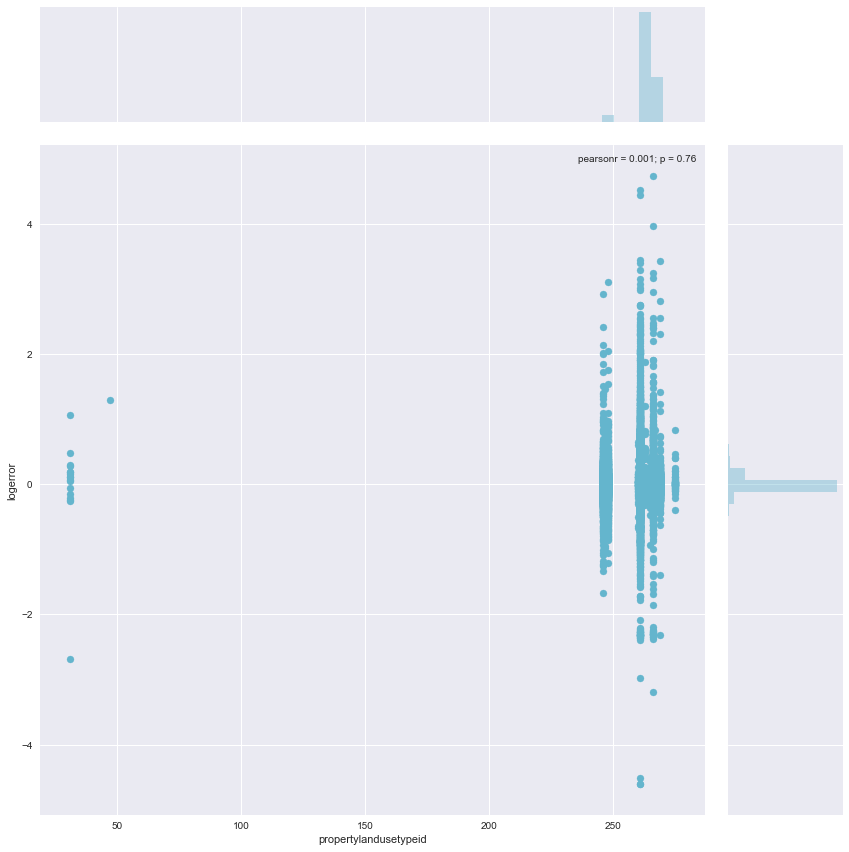

rawcensustractandblock


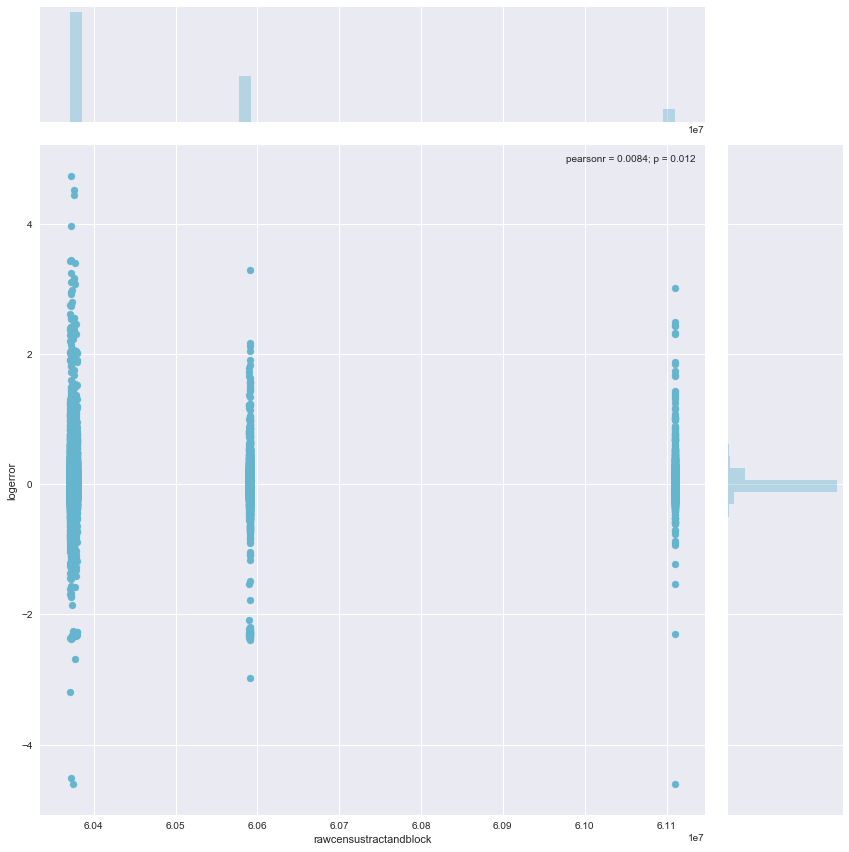

regionidcounty


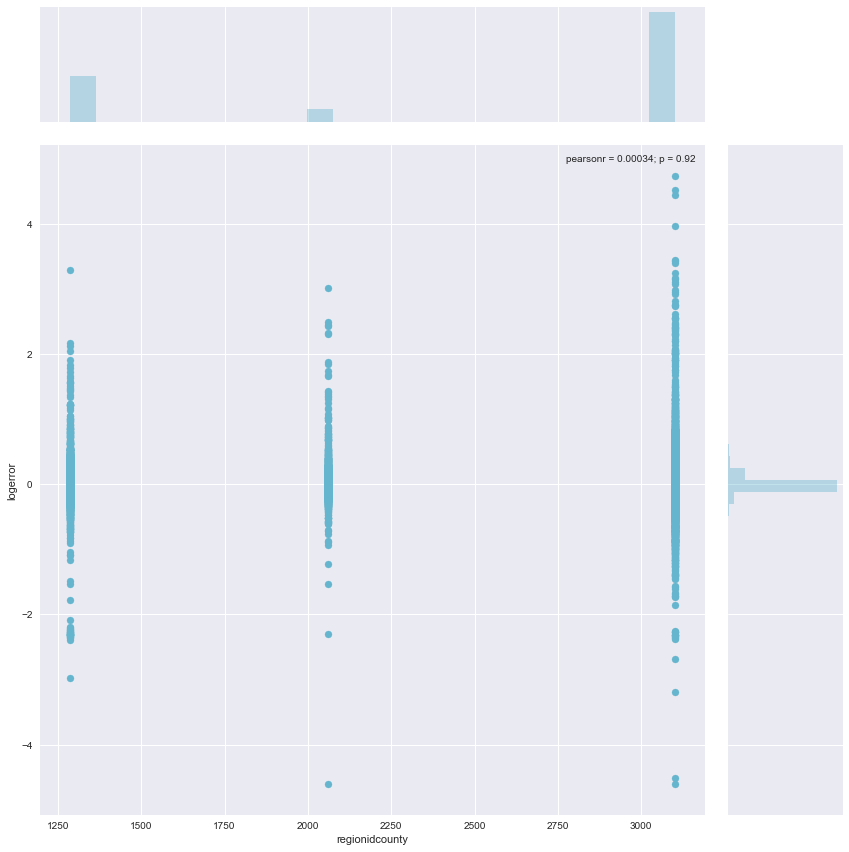

longitude


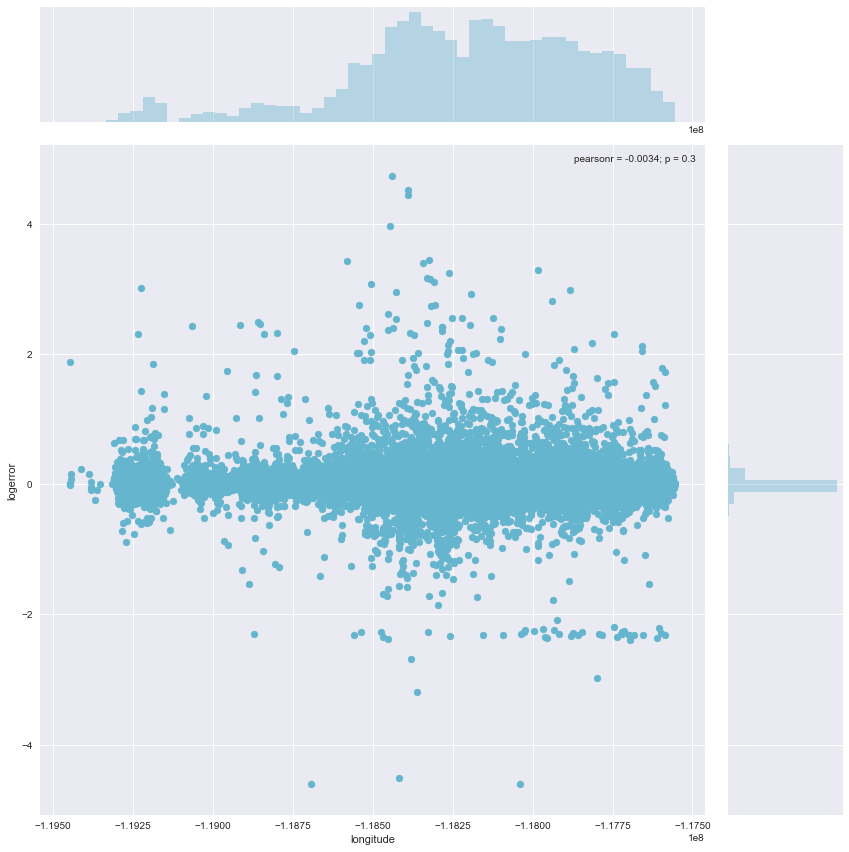

latitude


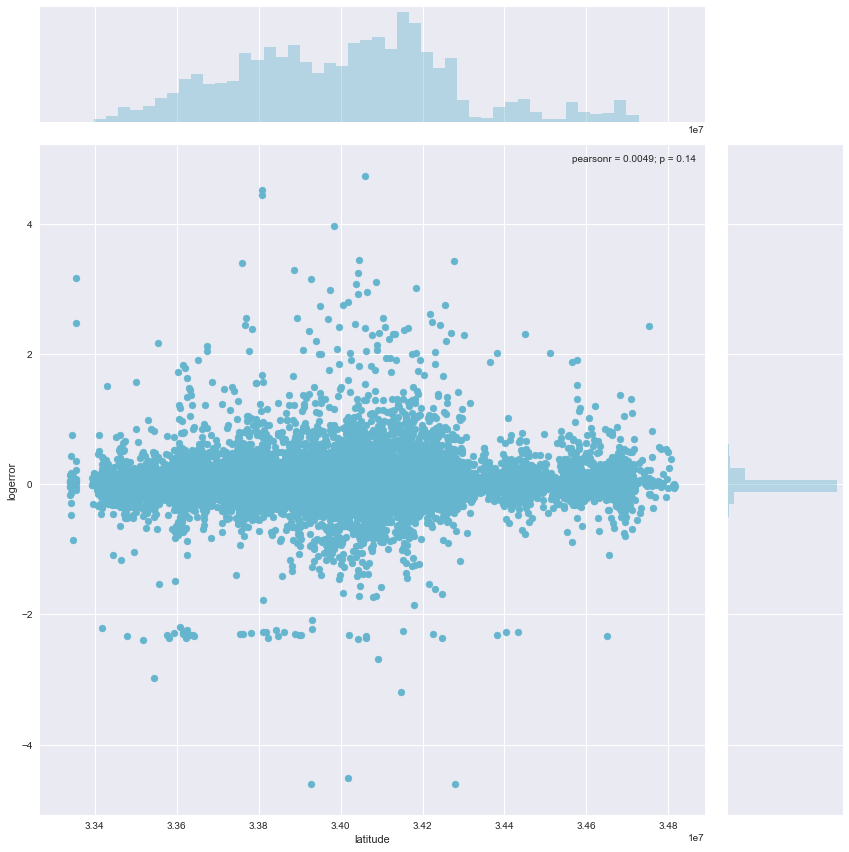

assessmentyear


C:\Users\madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\madhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


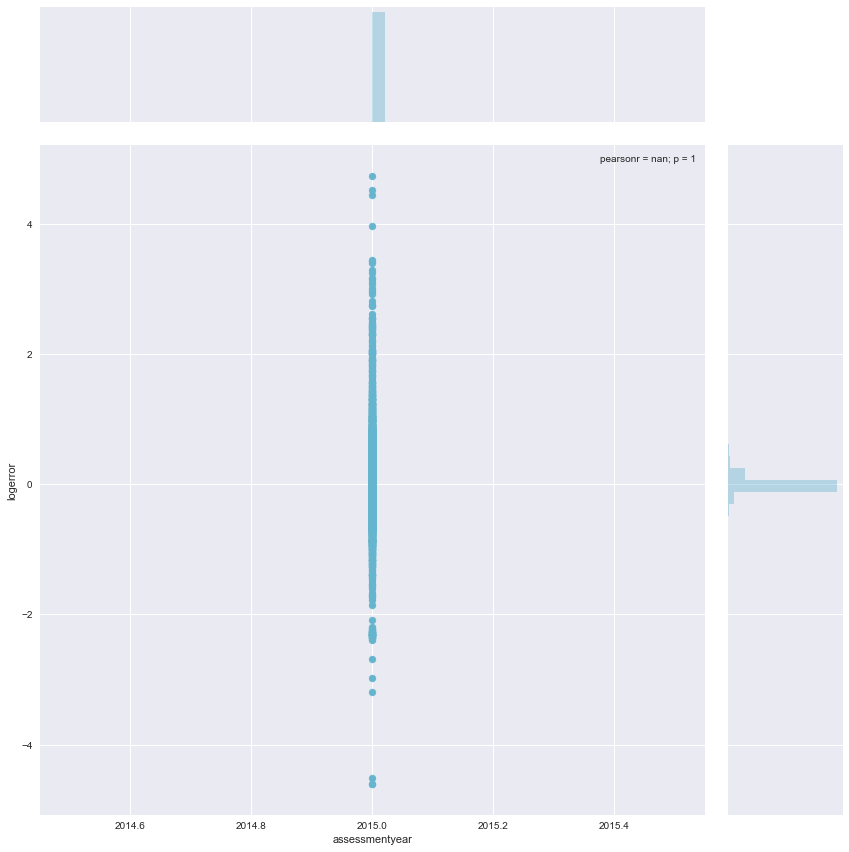

bedroomcnt


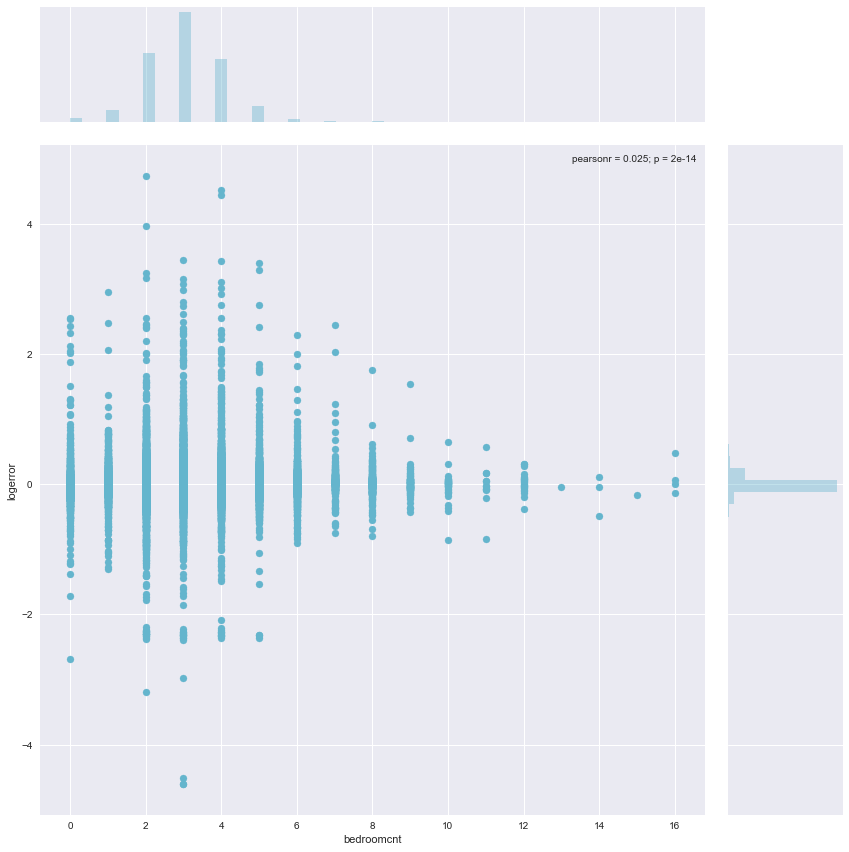

bathroomcnt


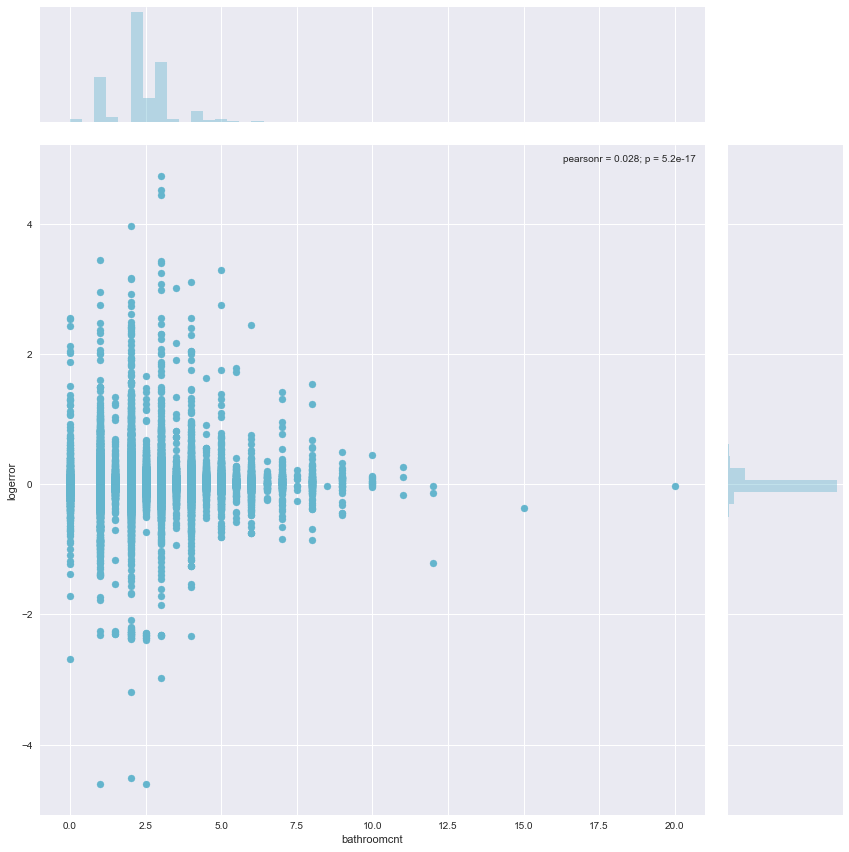

roomcnt


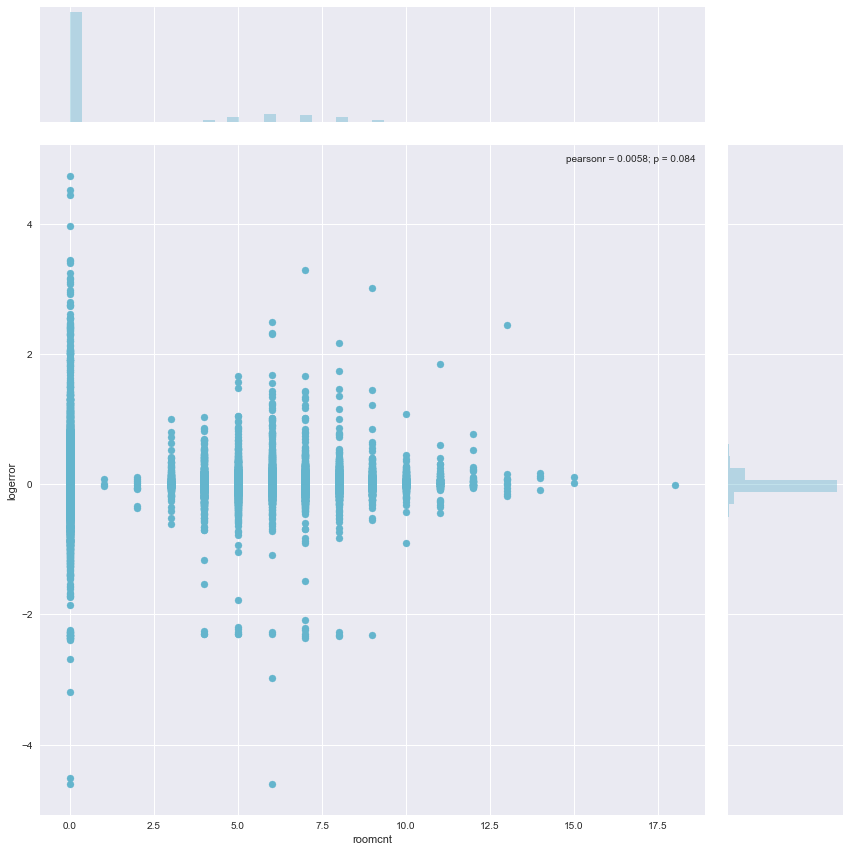

regionidzip


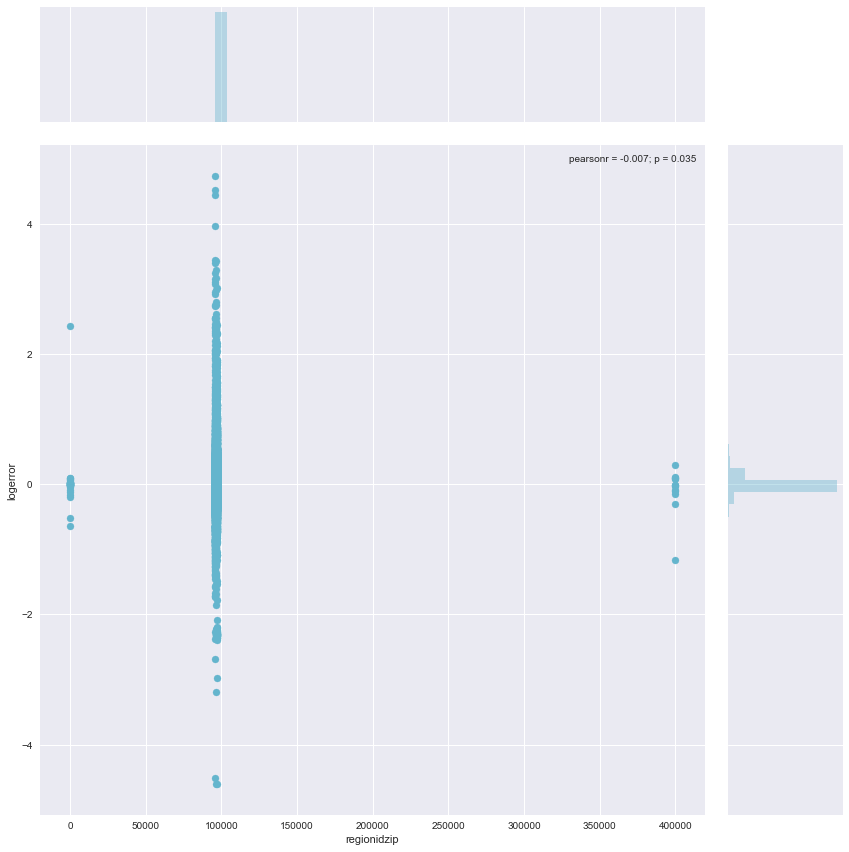

taxamount


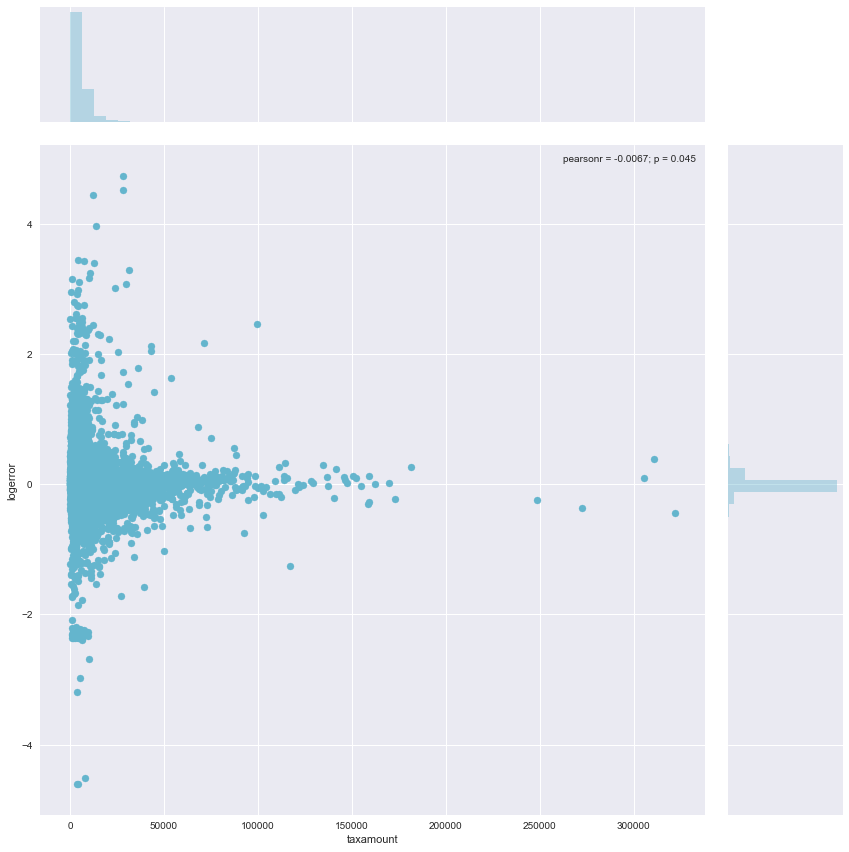

taxvaluedollarcnt


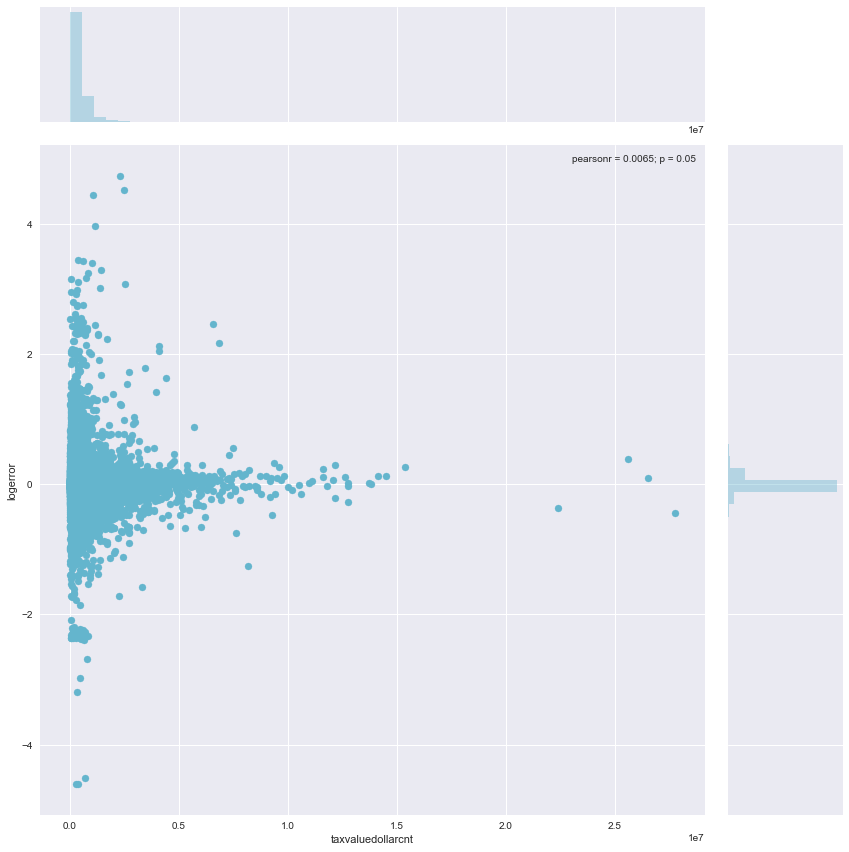

structuretaxvaluedollarcnt


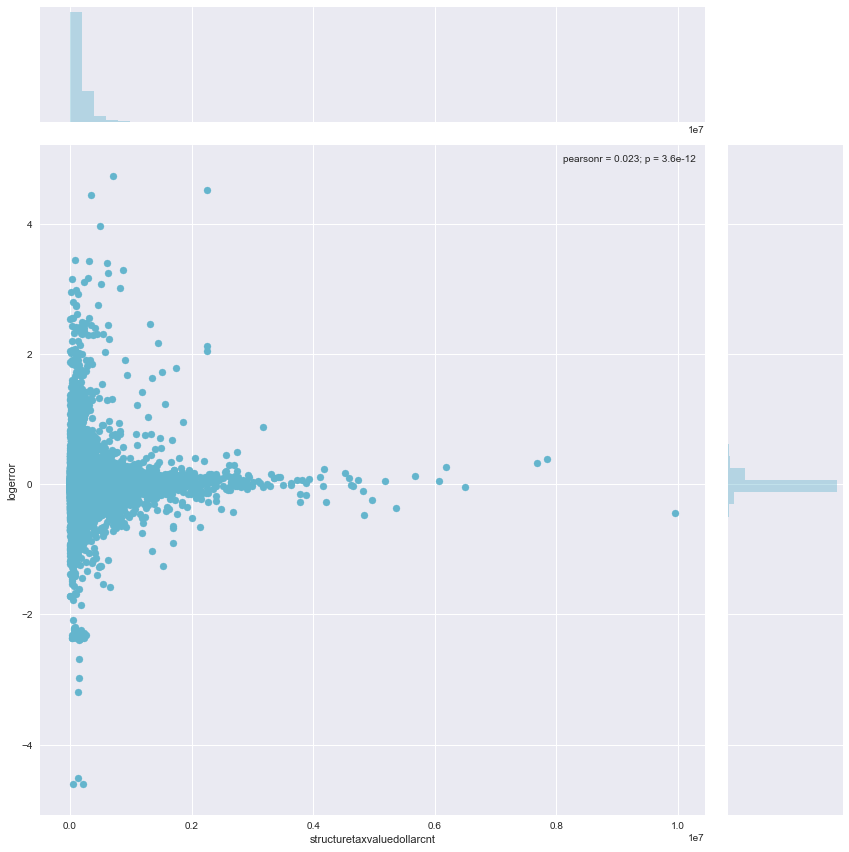

calculatedfinishedsquarefeet


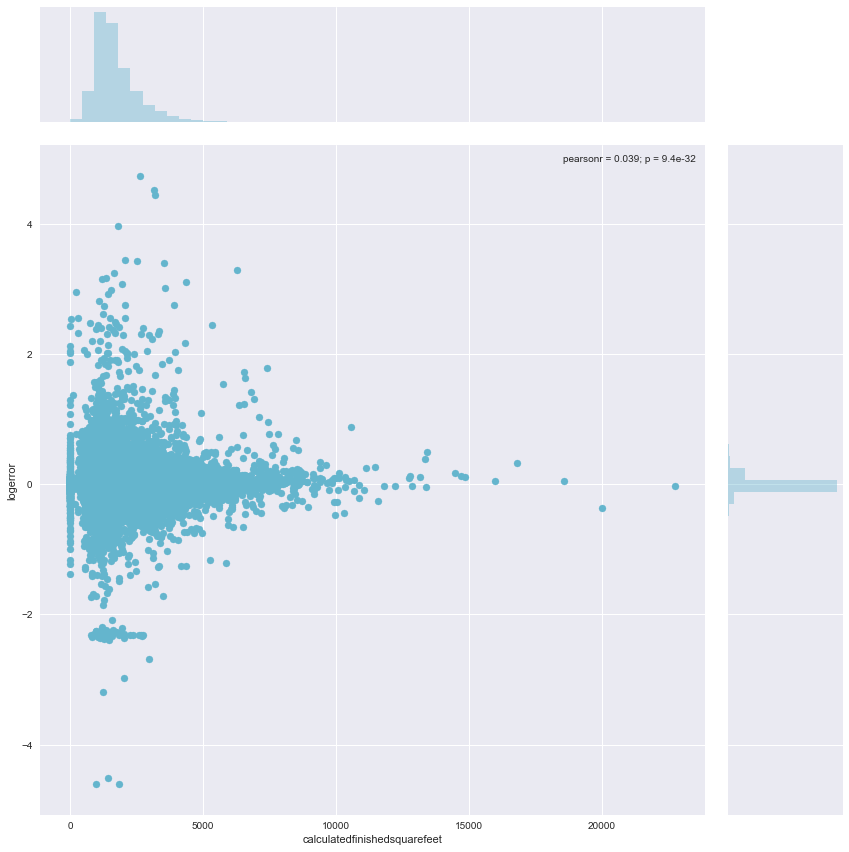

yearbuilt


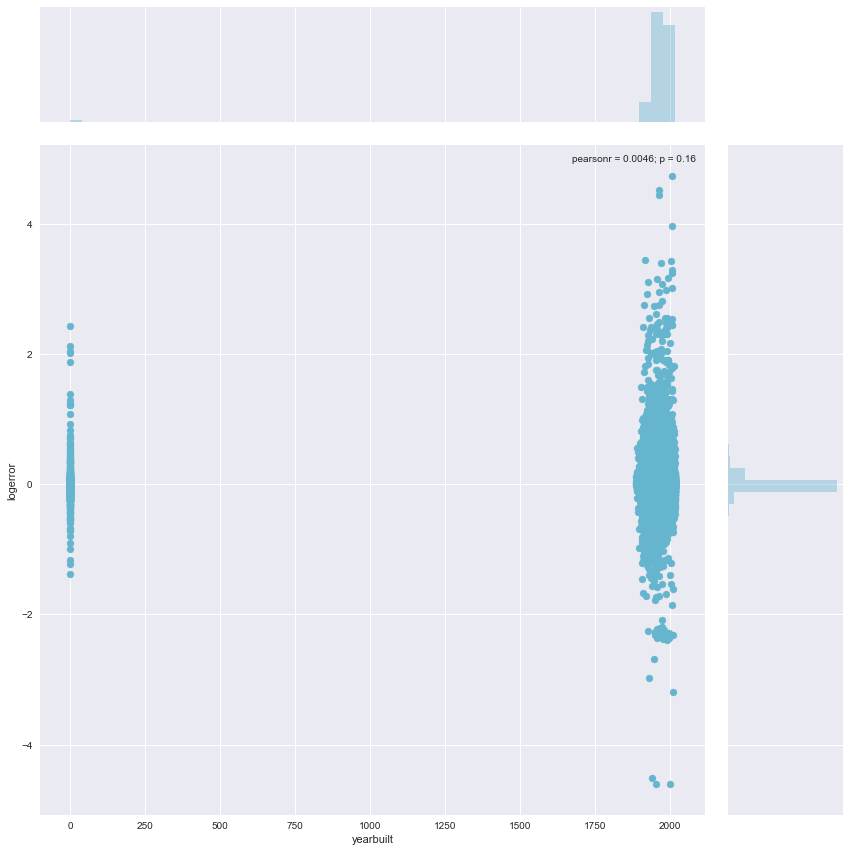

regionidcity


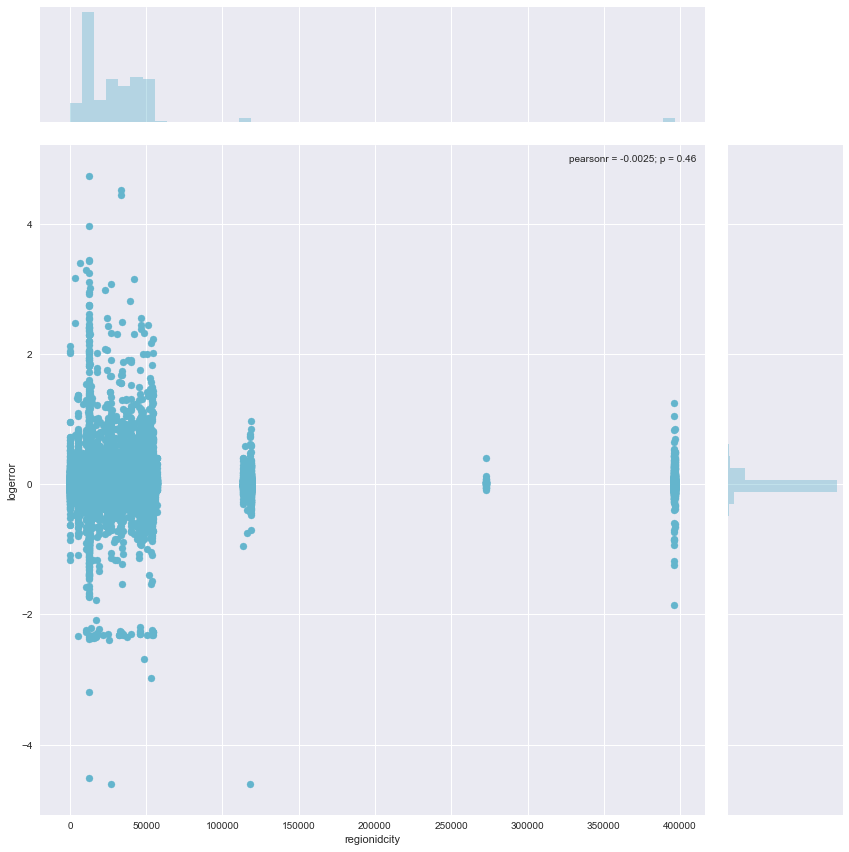

landtaxvaluedollarcnt


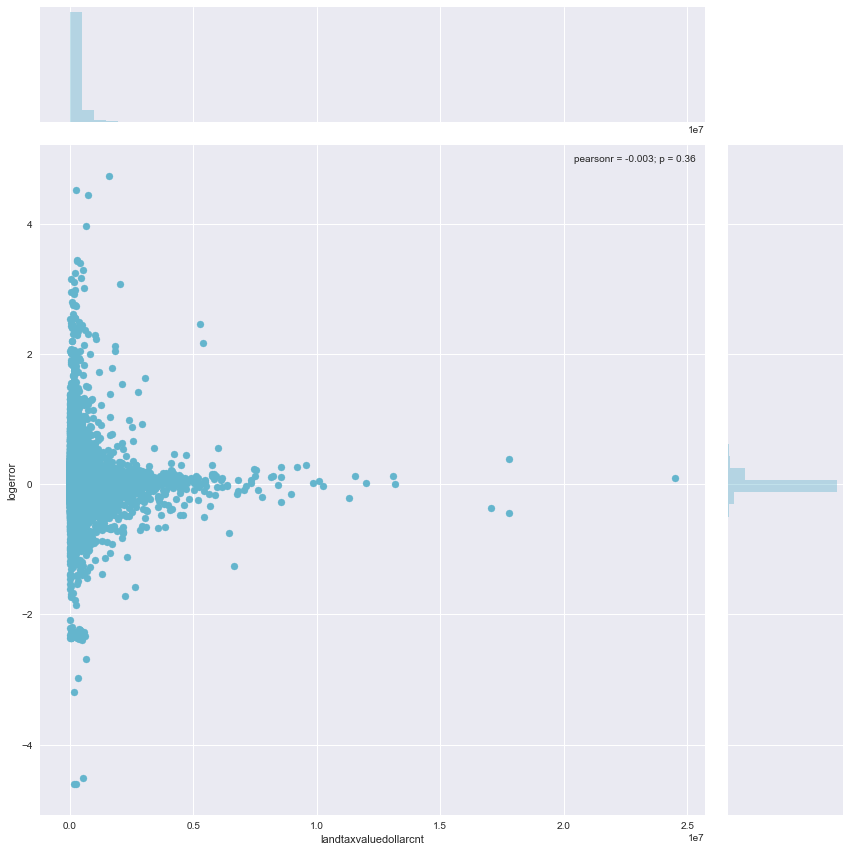

censustractandblock


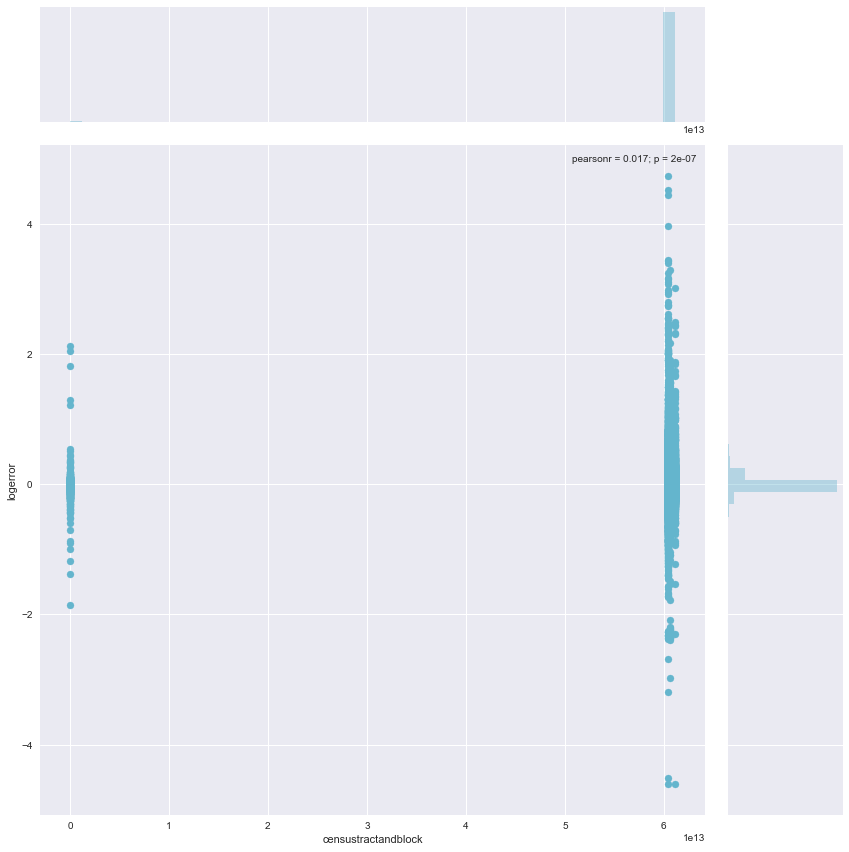

fullbathcnt


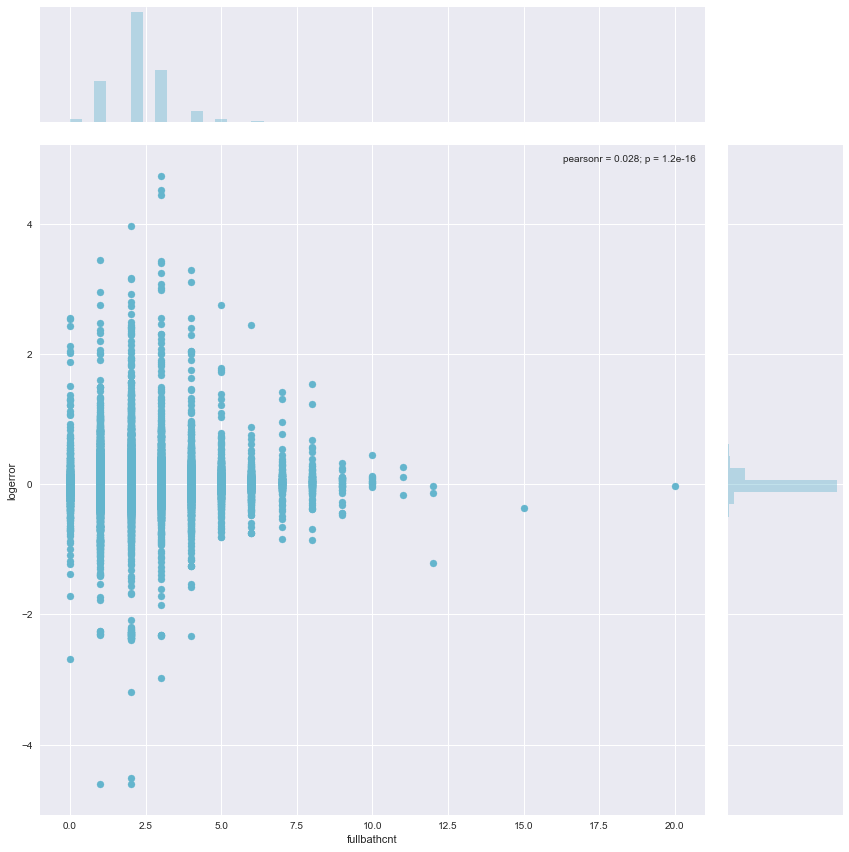

calculatedbathnbr


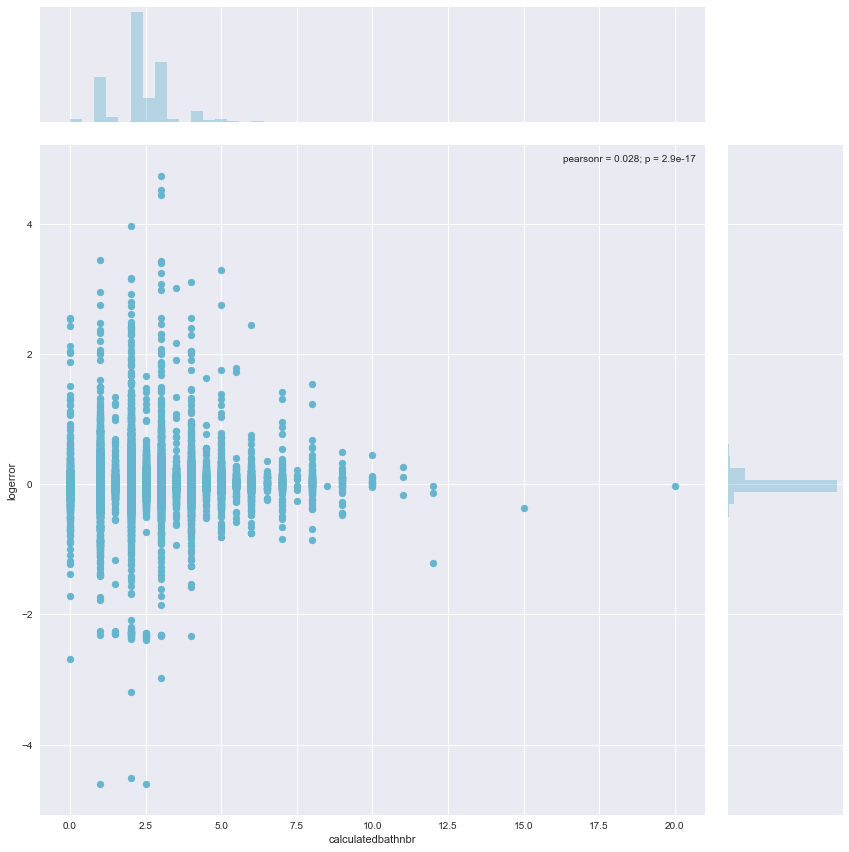

finishedsquarefeet12


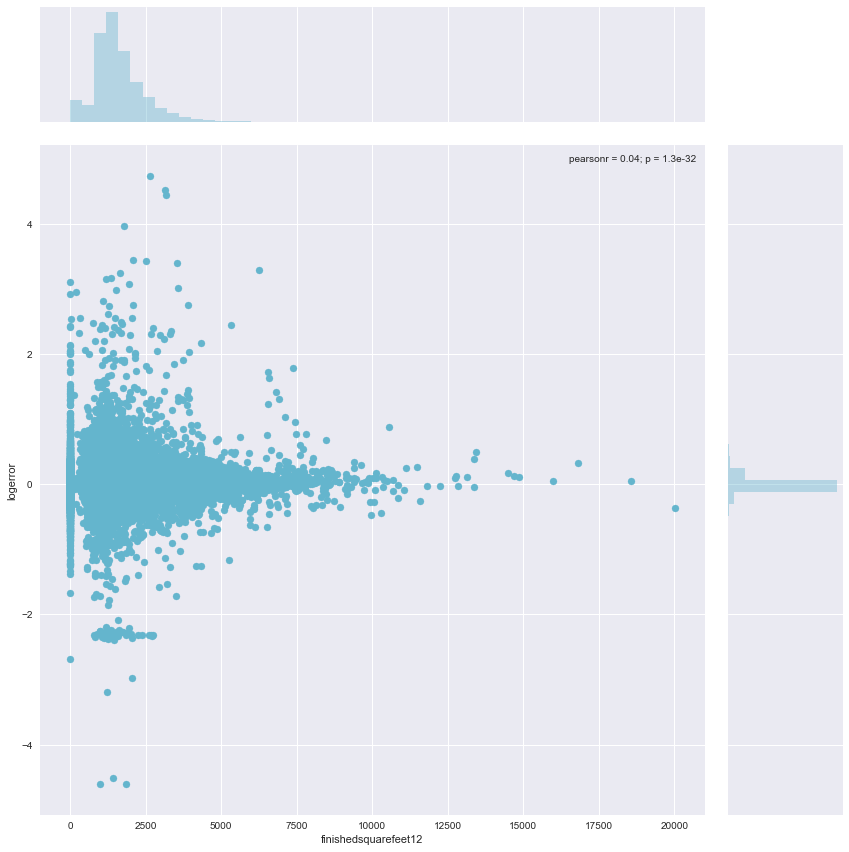

lotsizesquarefeet


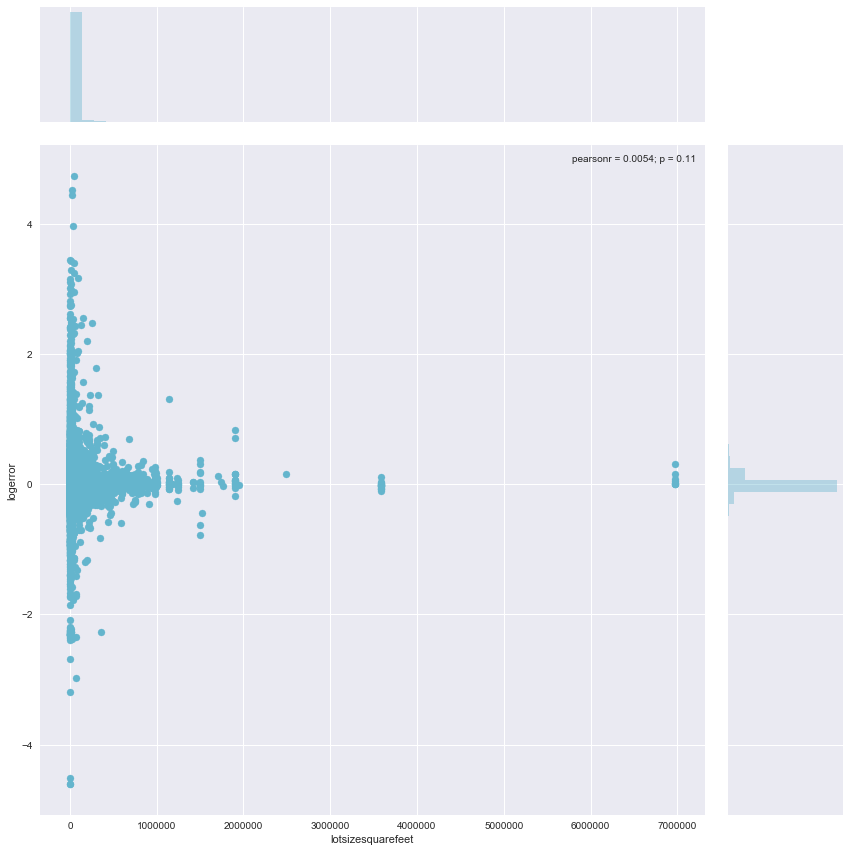

In [183]:
jointDistribution(data_2016)

fips


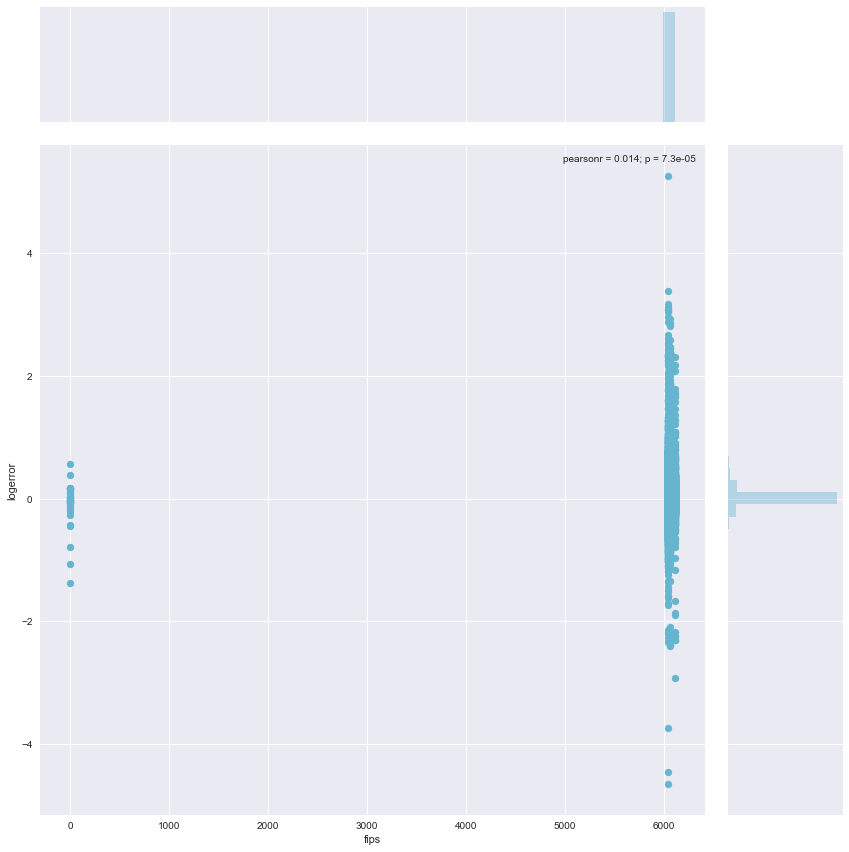

propertylandusetypeid


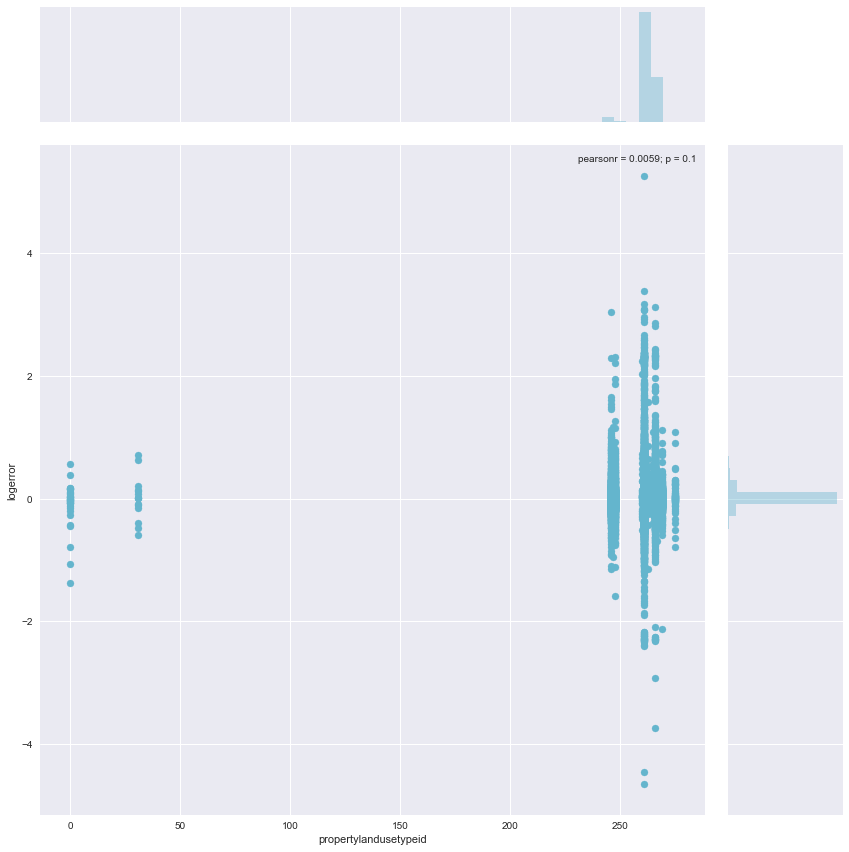

rawcensustractandblock


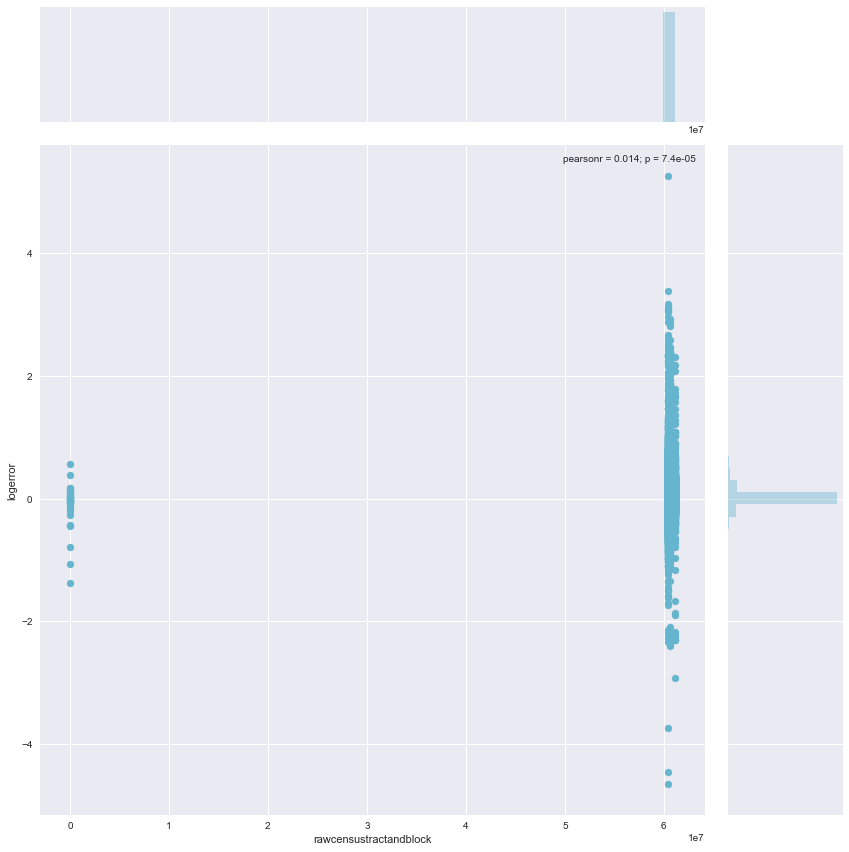

regionidcounty


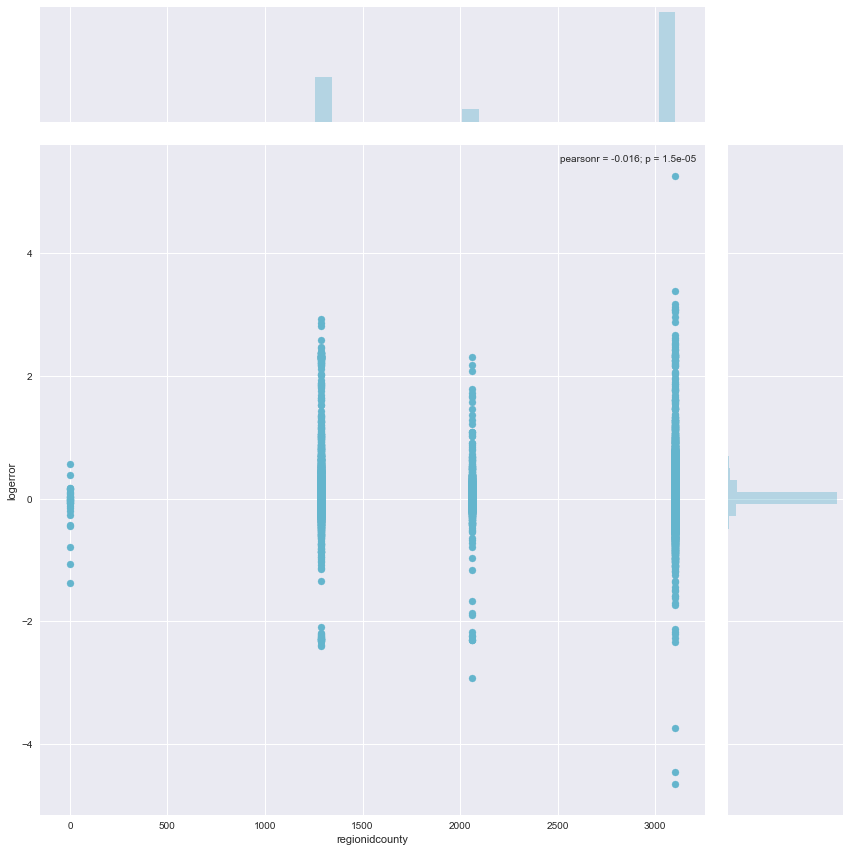

longitude


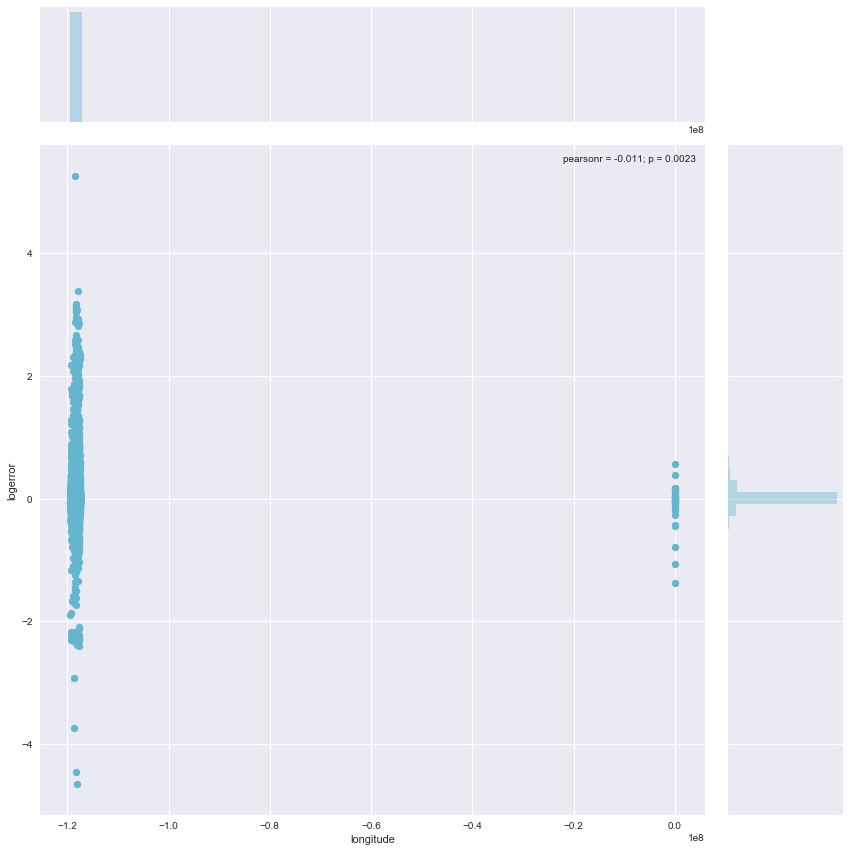

latitude


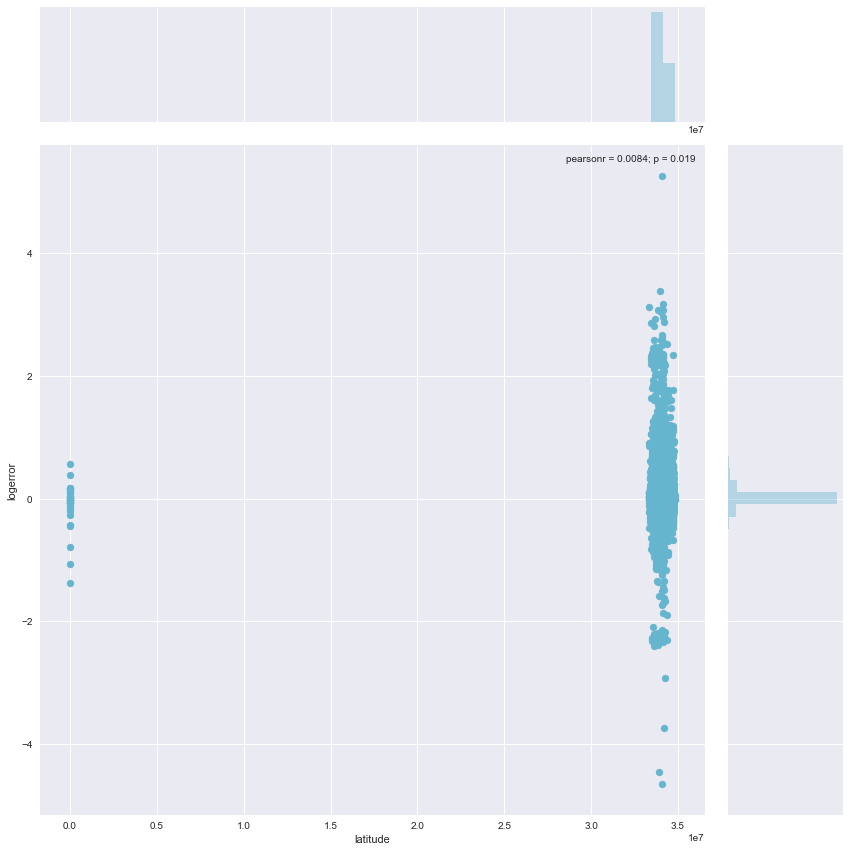

assessmentyear


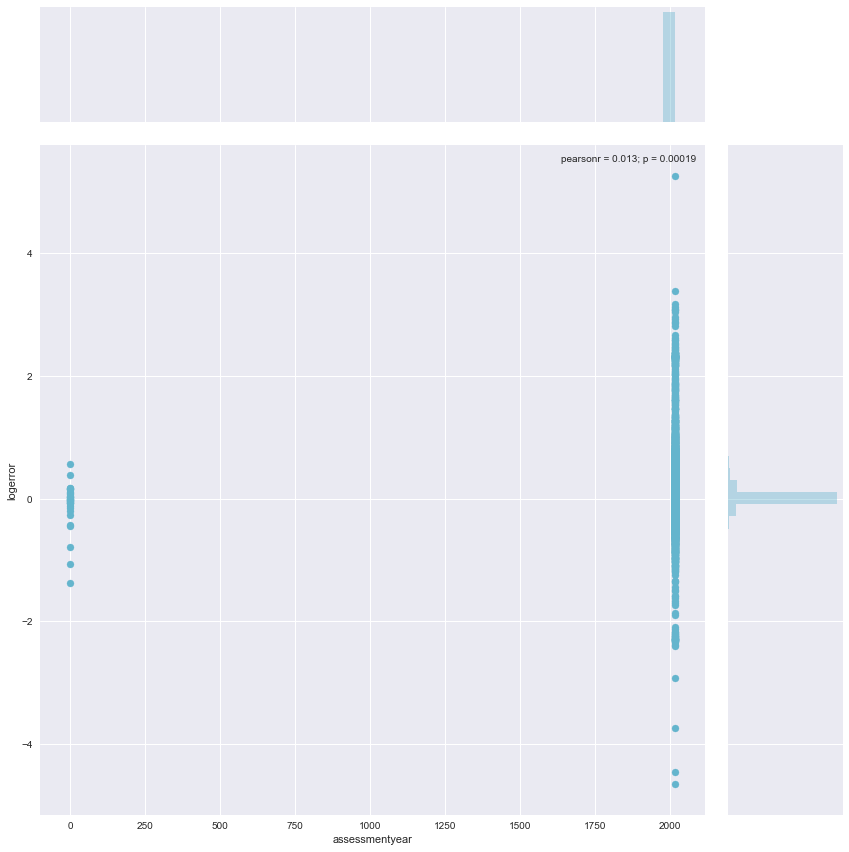

bedroomcnt


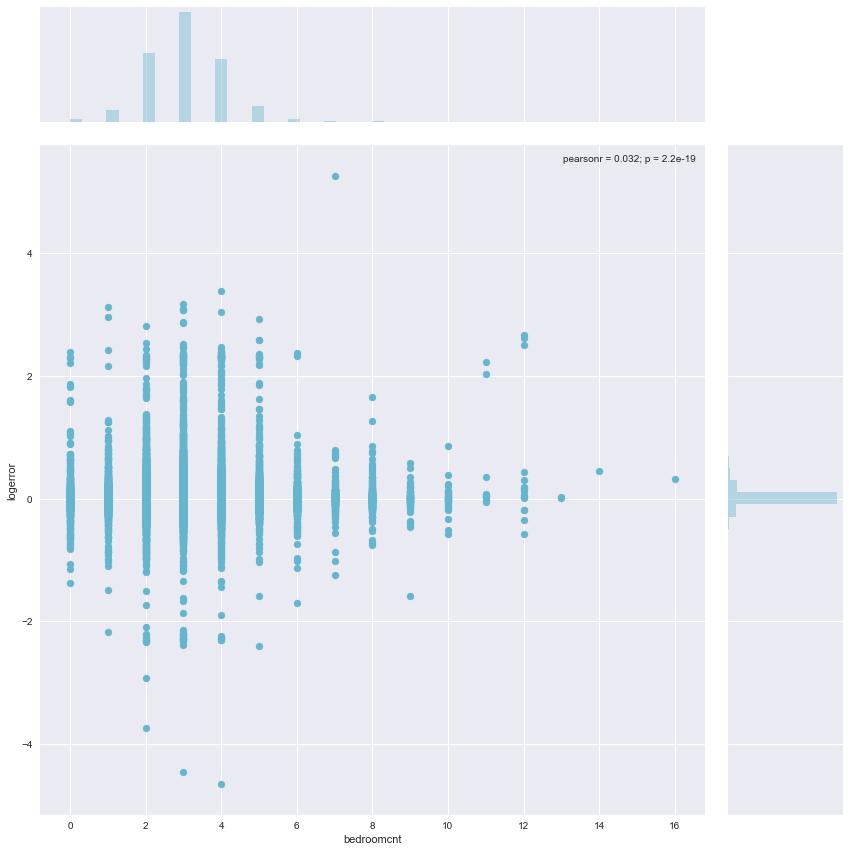

bathroomcnt


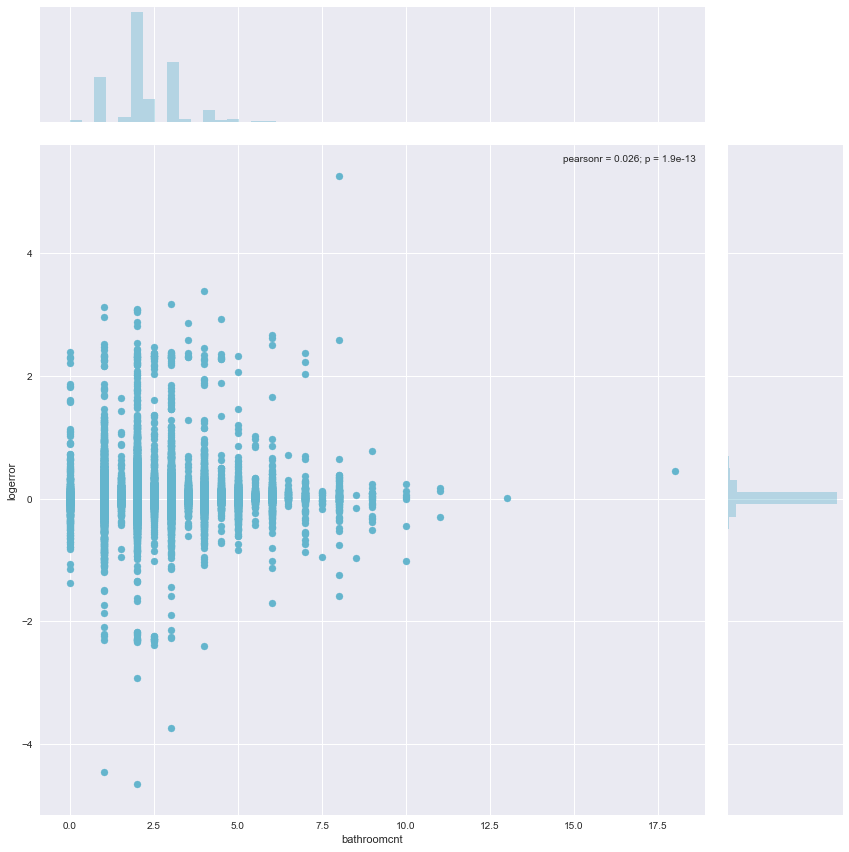

roomcnt


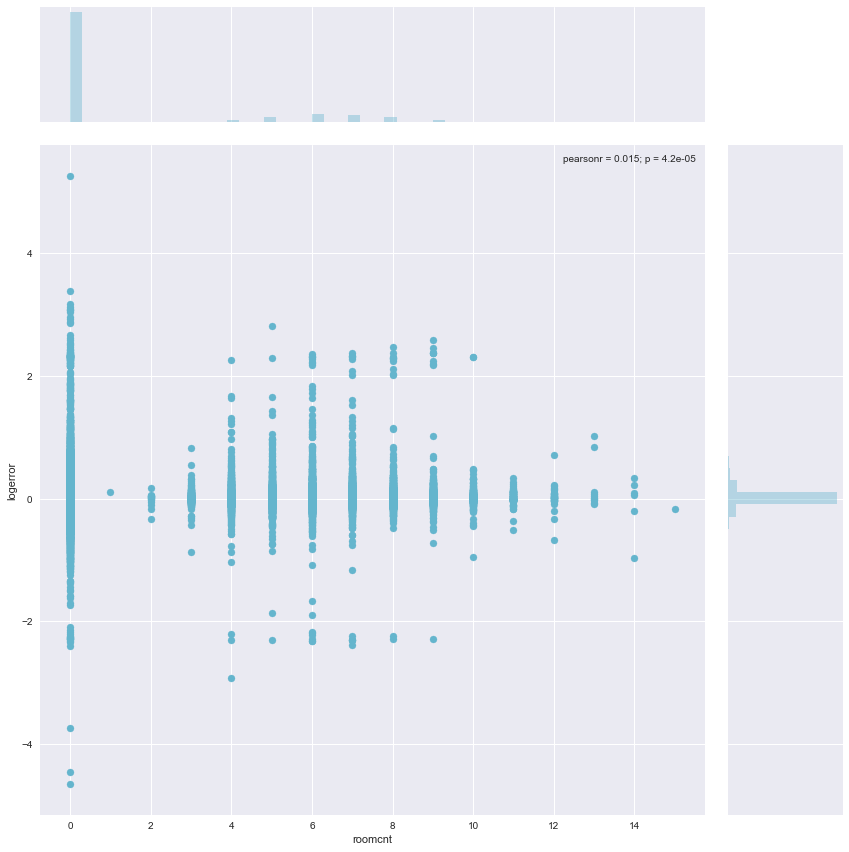

regionidzip


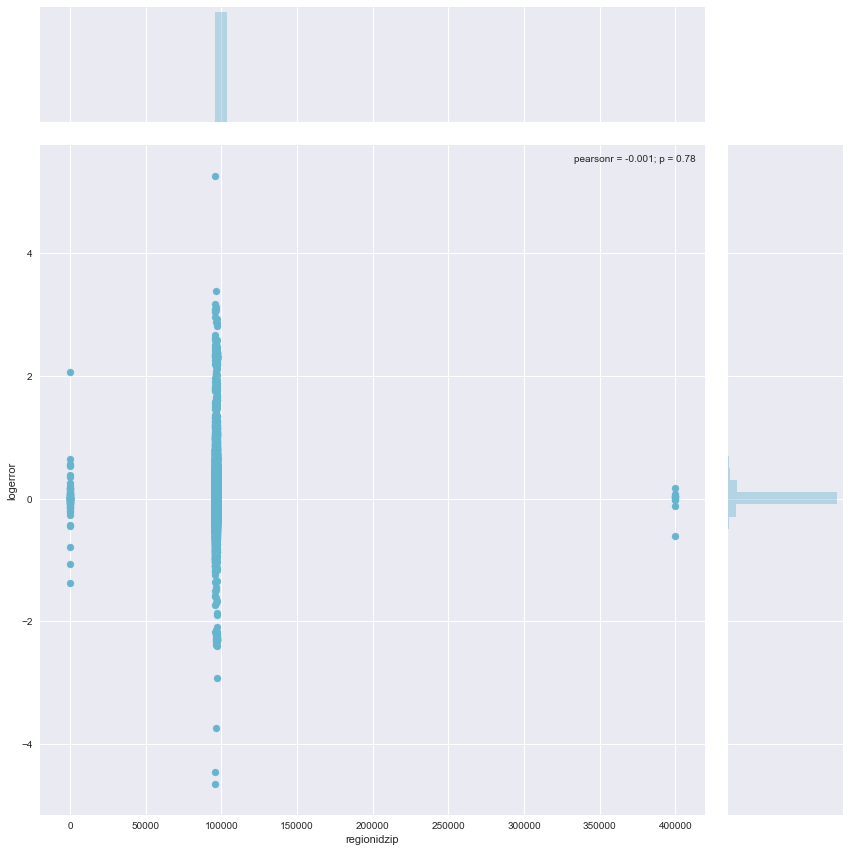

taxamount


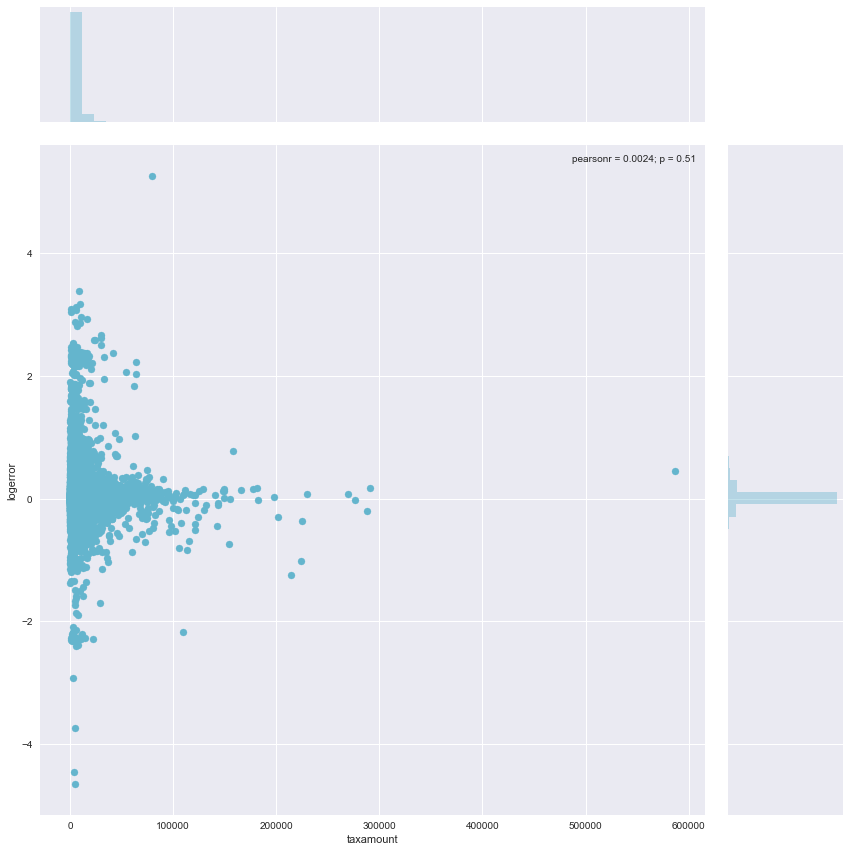

taxvaluedollarcnt


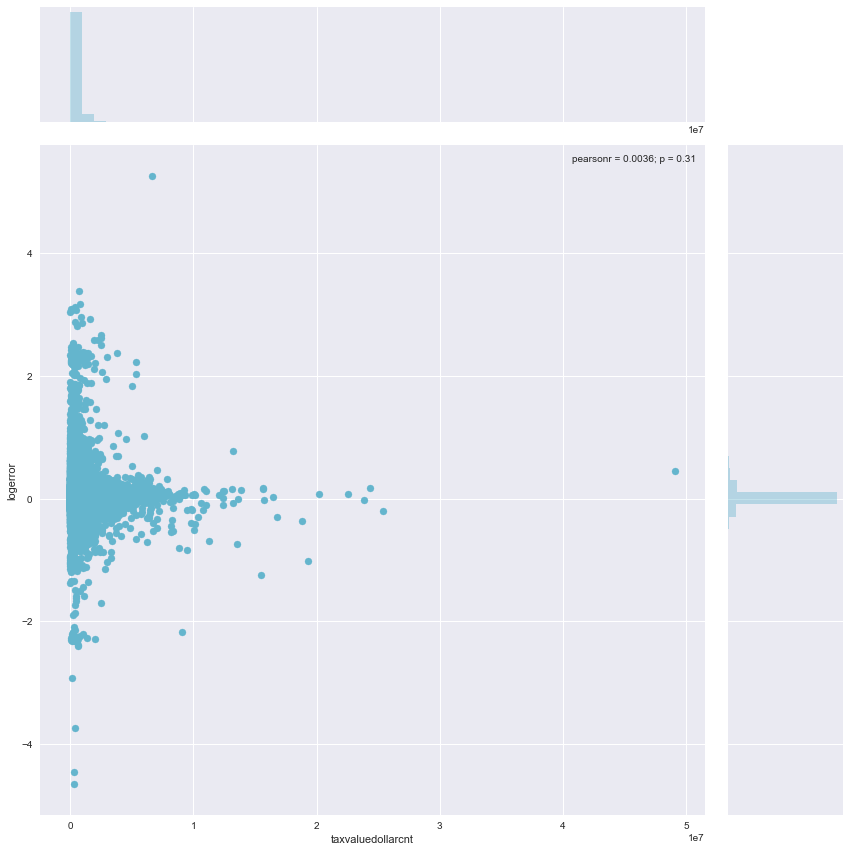

structuretaxvaluedollarcnt


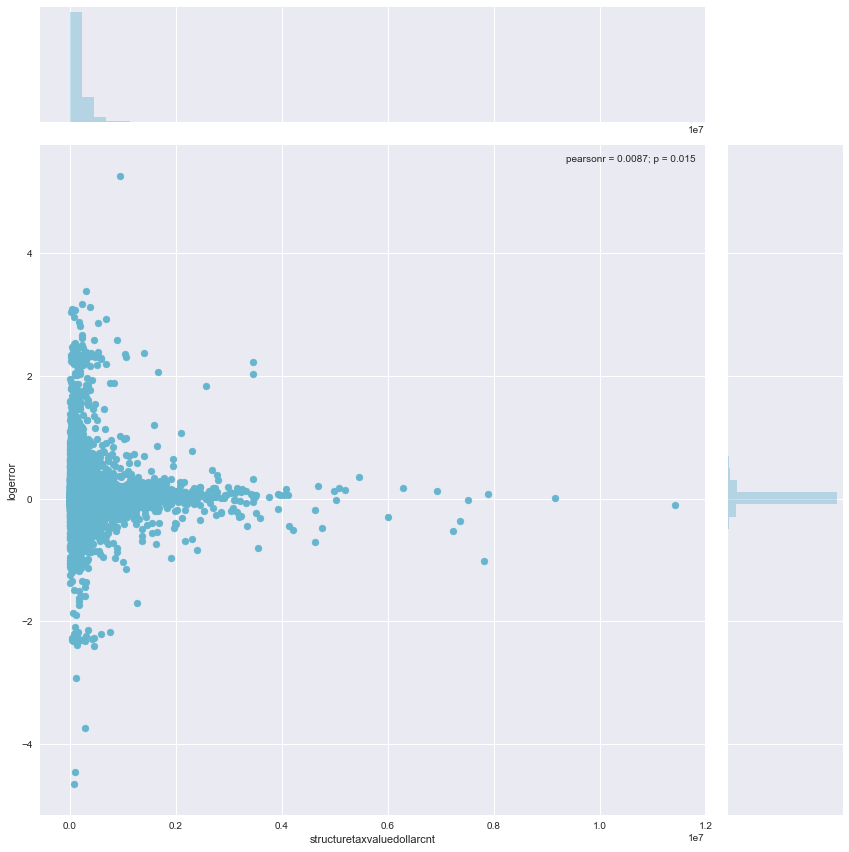

calculatedfinishedsquarefeet


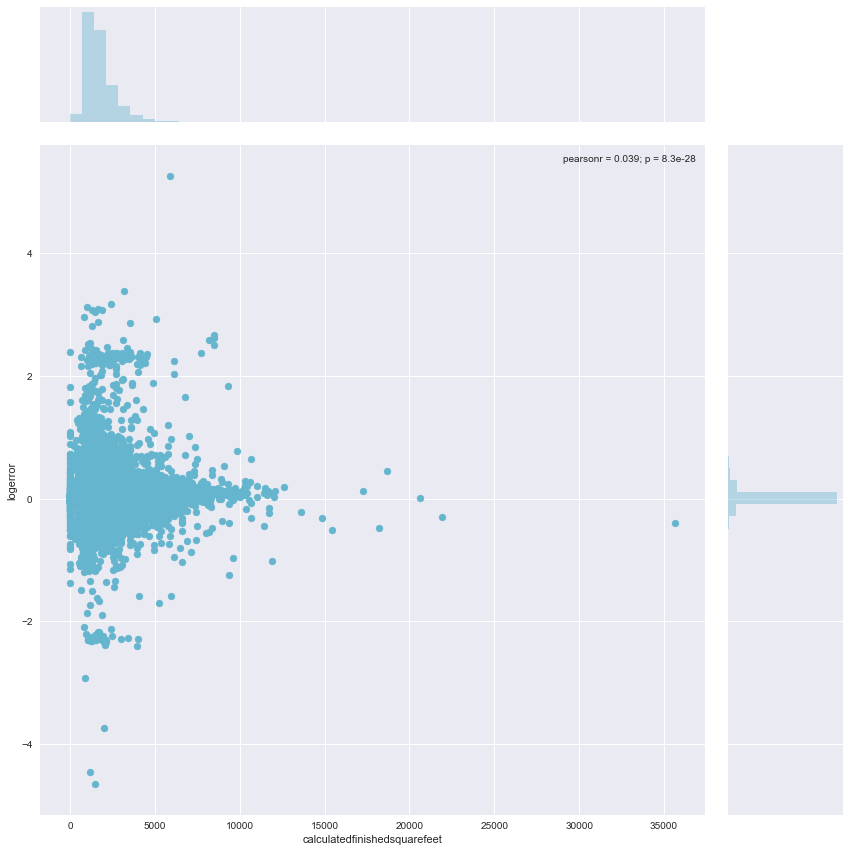

yearbuilt


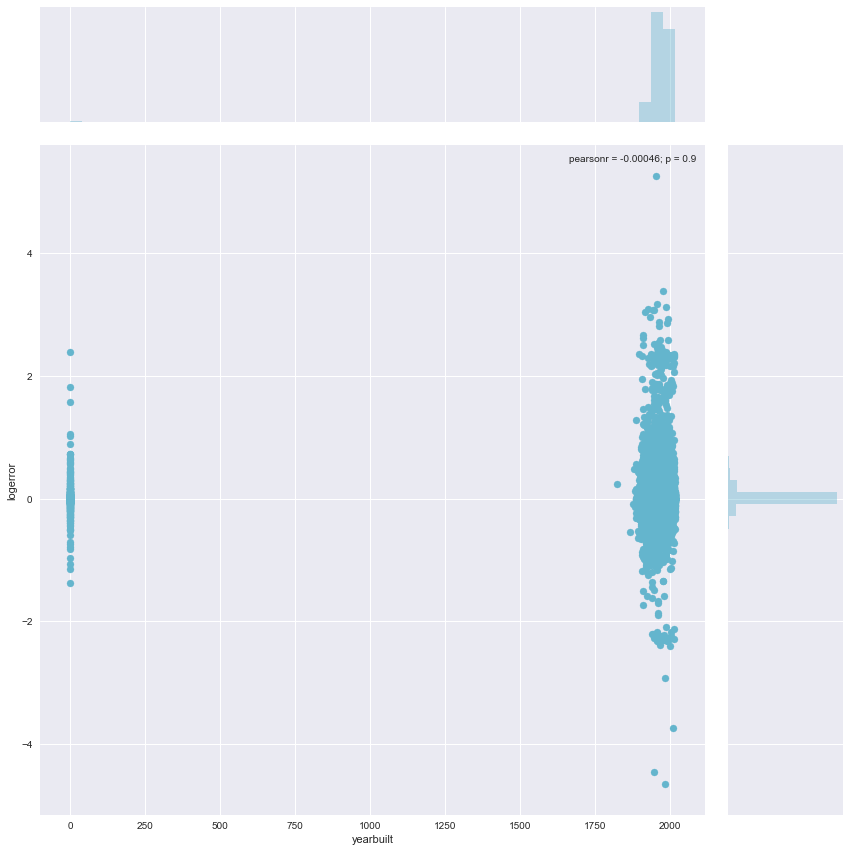

regionidcity


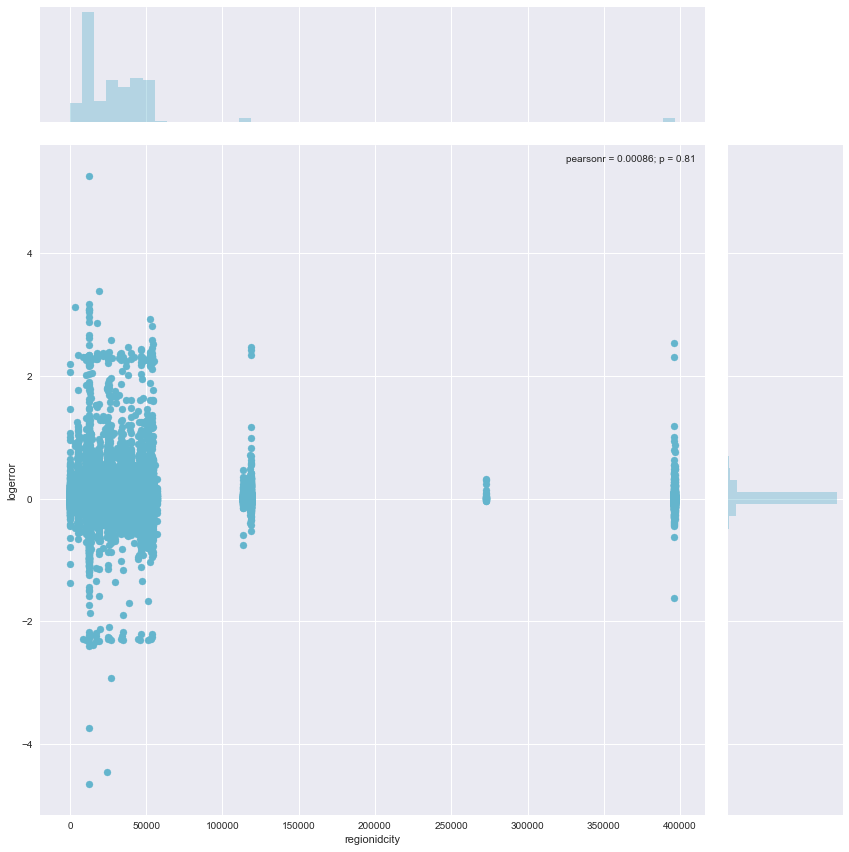

landtaxvaluedollarcnt


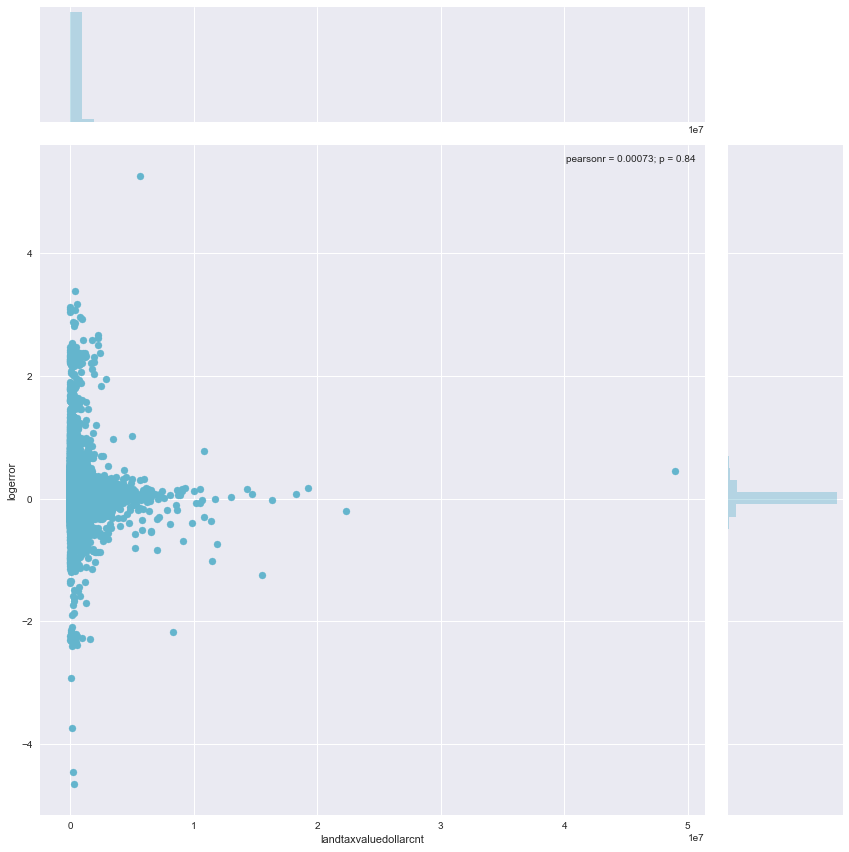

censustractandblock


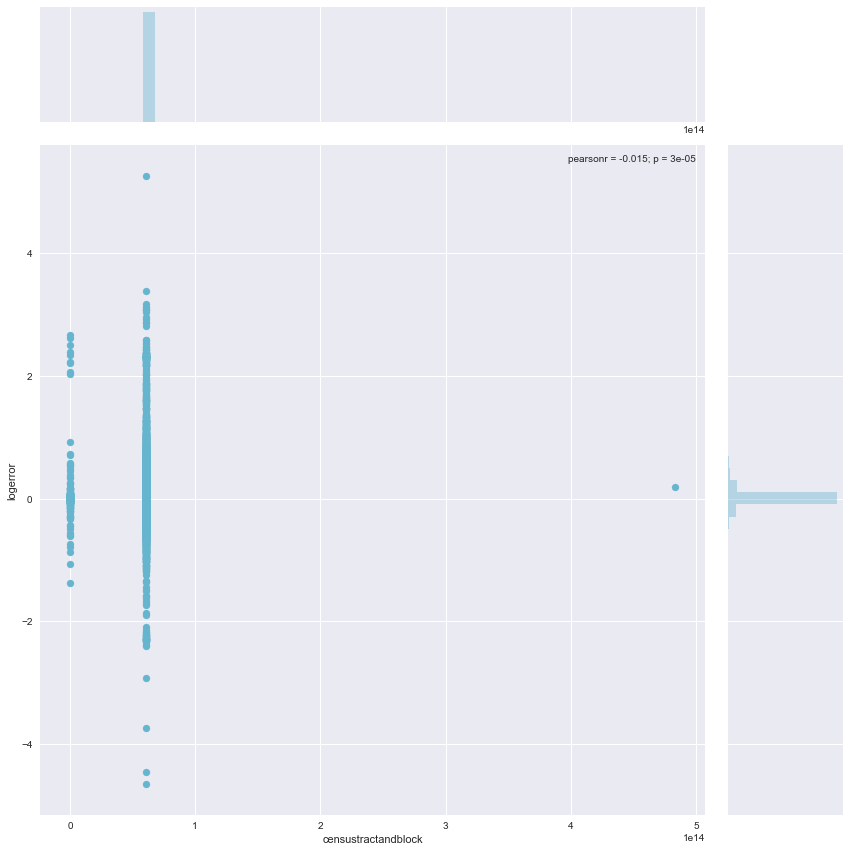

fullbathcnt


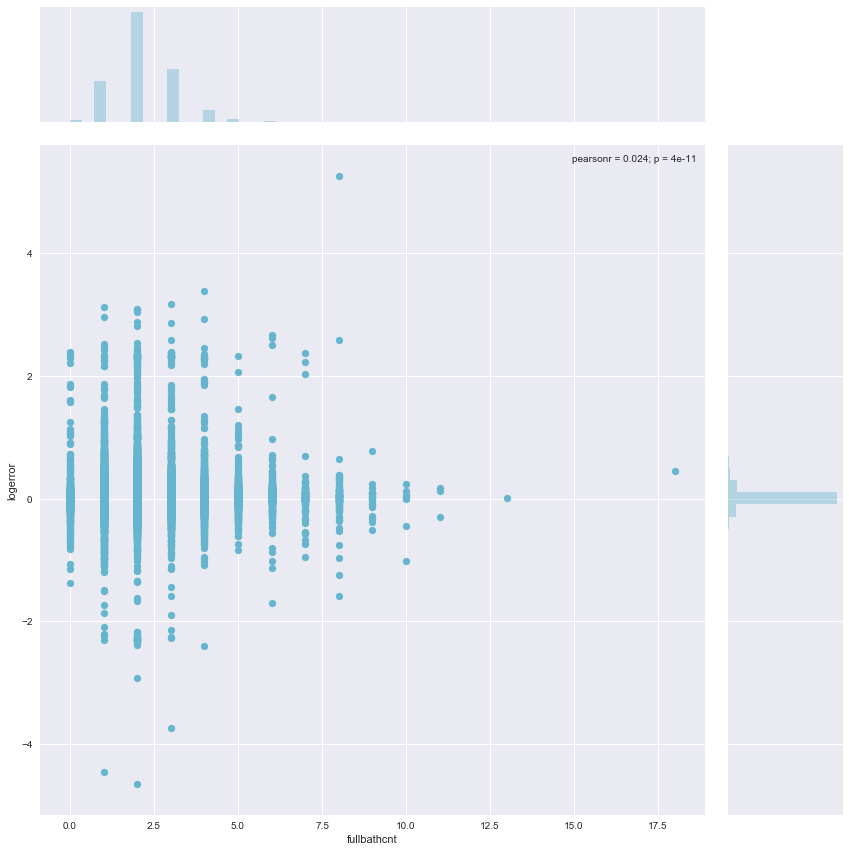

calculatedbathnbr


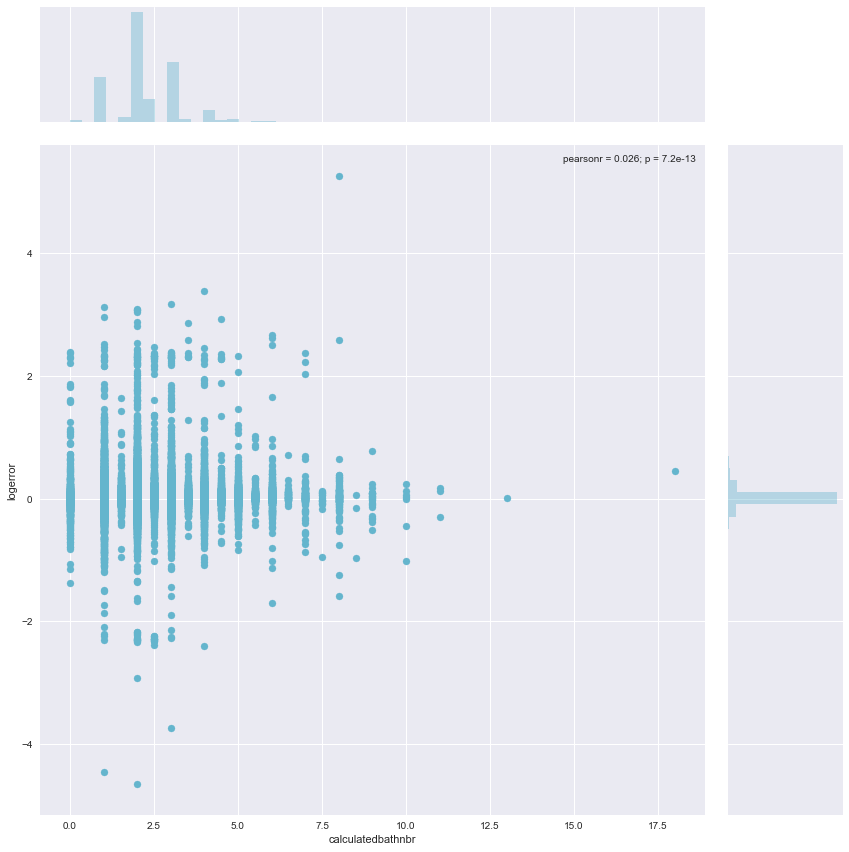

finishedsquarefeet12


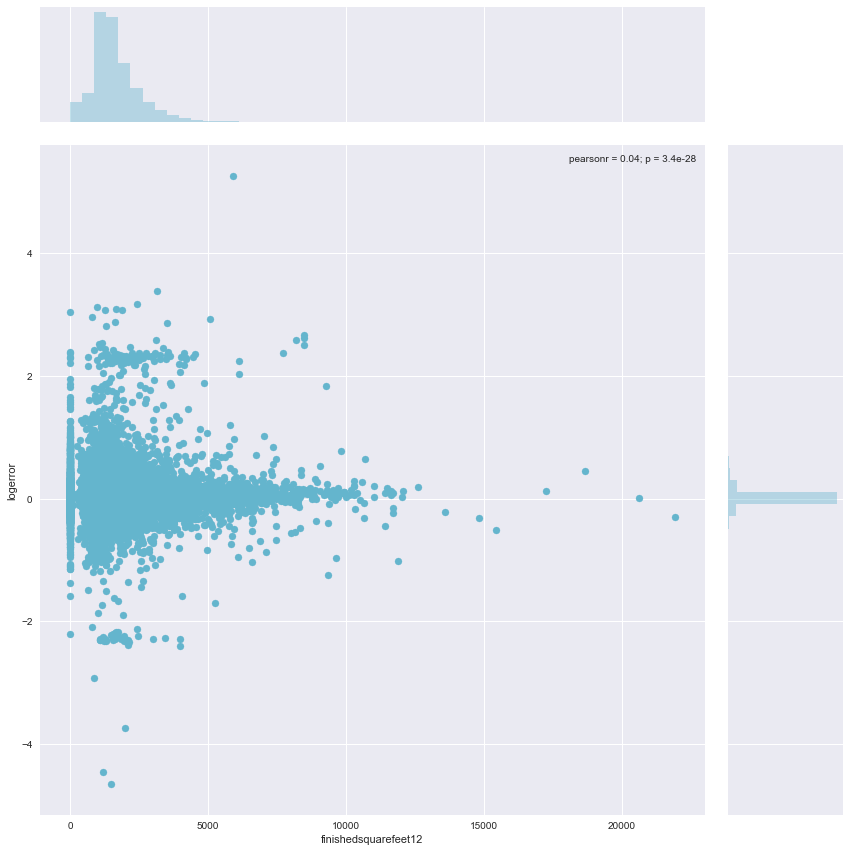

lotsizesquarefeet


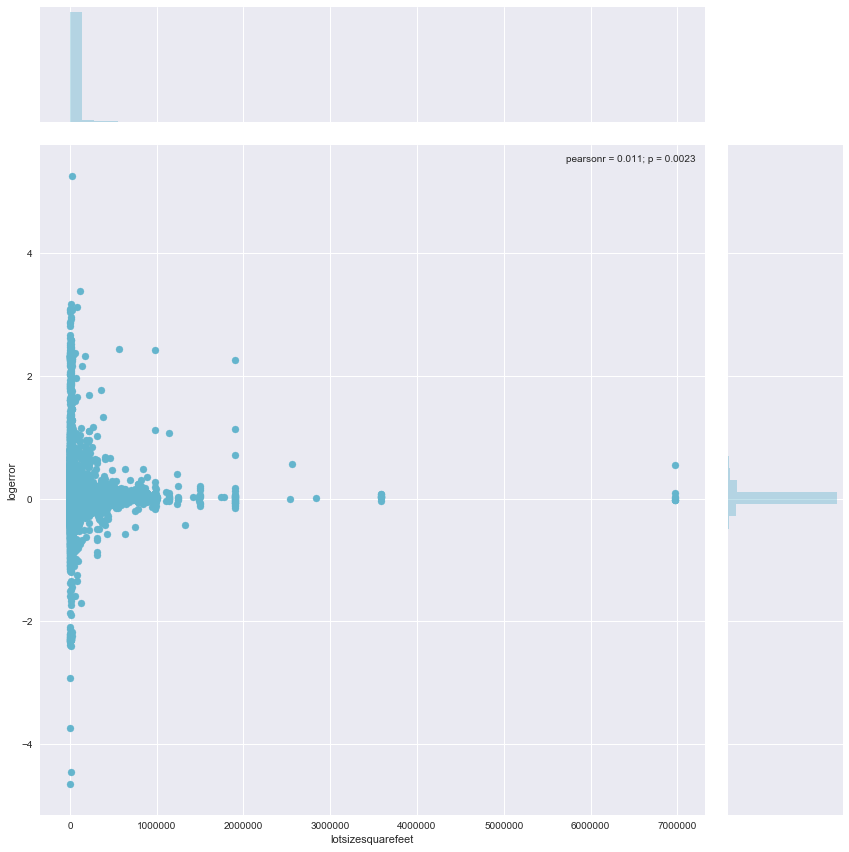

In [175]:
jointDistribution(data_2017)

# Distribution (distplot) of all the Numberical columns

In [214]:
def allNumericalColumnsDistribution(yearValue):
       numcols = yearValue[['parcelid', 'logerror', 'transactiondate', 'year', 'month',
       'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock']]
    plt.close('all')
    numcols.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);
    plt.show()

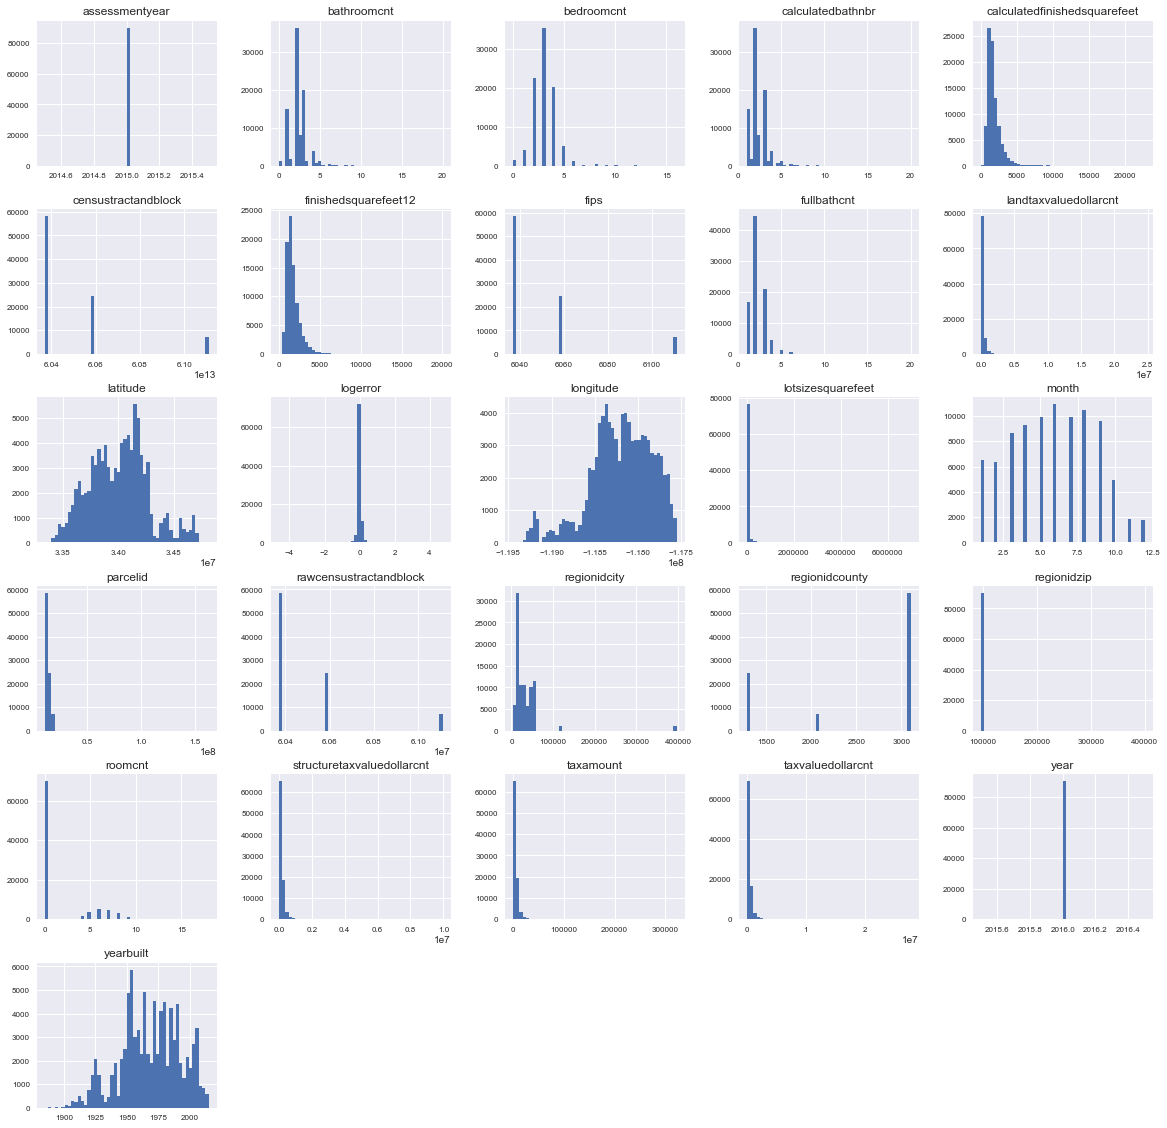

In [215]:
allNumericalColumnsDistribution(data_2016)

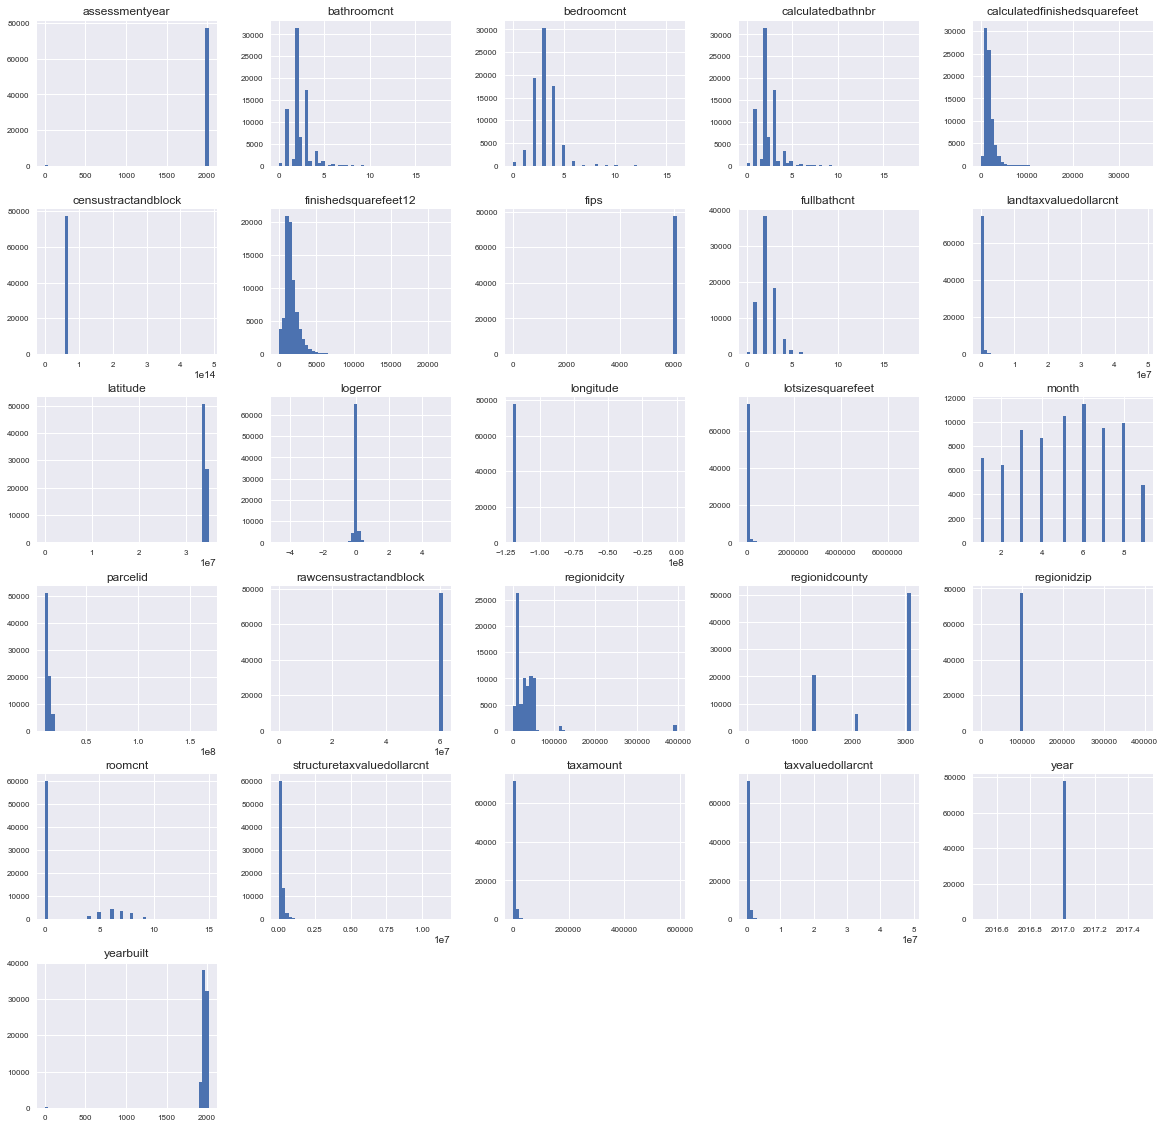

In [216]:
allNumericalColumnsDistribution(data_2017)

# Distribution For Each Column with hist and  dist plot

## Numerical Columns

In [201]:
def eachColumnDistribution(yearValue):    
    colName = selectedColumnForYear(yearValue)
    for col in colName:
        yearValue[col].fillna(0, inplace=True)
        plt.figure(figsize=(12,12))
        sns.distplot(yearValue[col])
        plt.ylabel('Quantity', fontsize=12)
        plt.xlabel(col+' Vlaue', fontsize=12)
        plt.title(col+" Column Distribution", fontsize=15)
        plt.show()

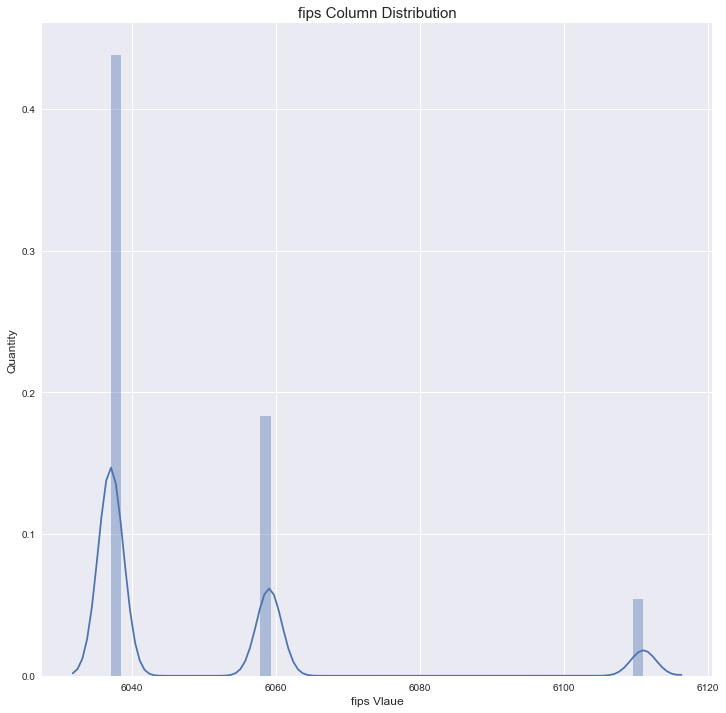

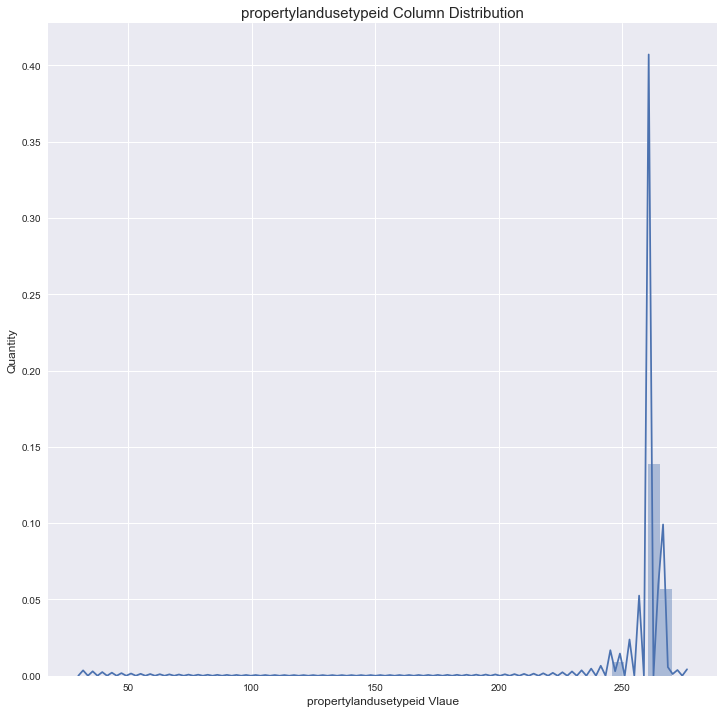

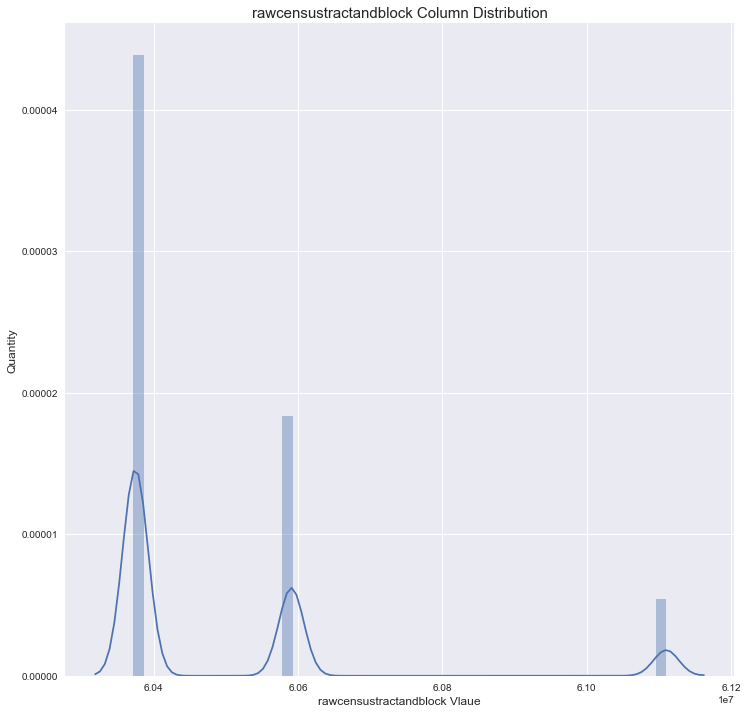

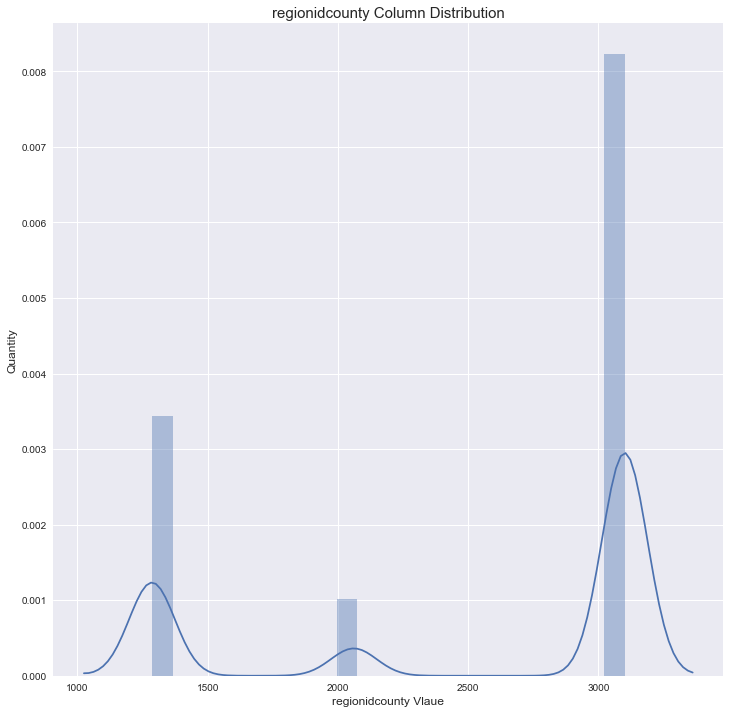

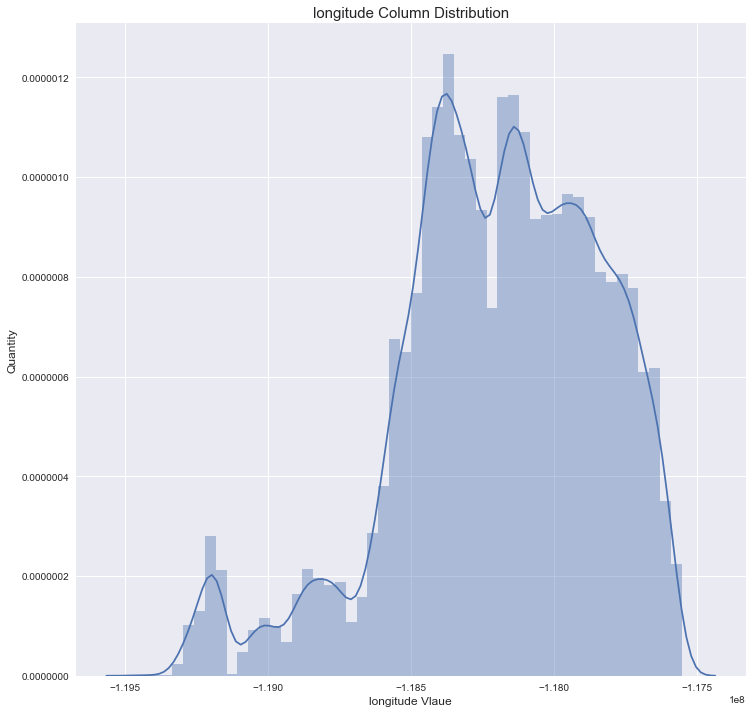

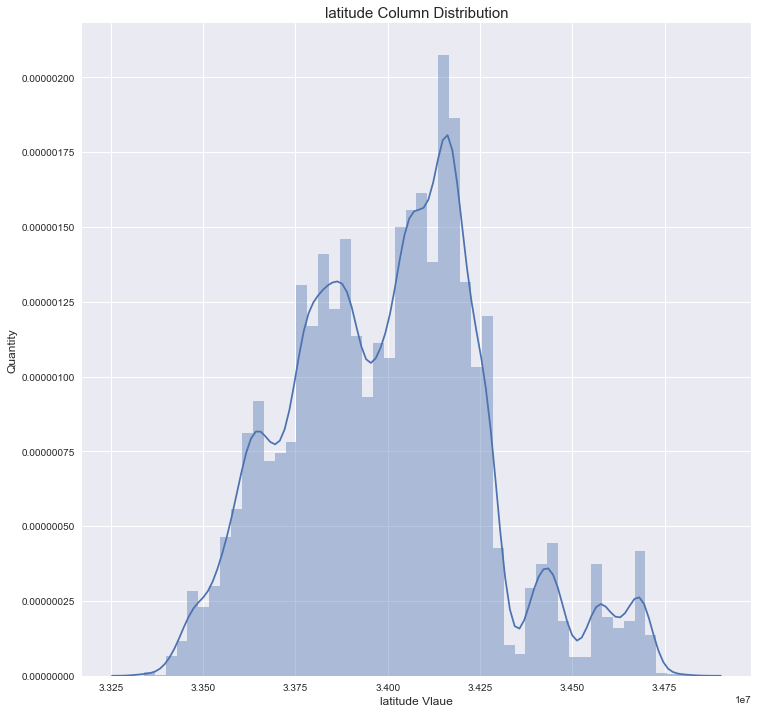

C:\Users\madhu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\madhu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


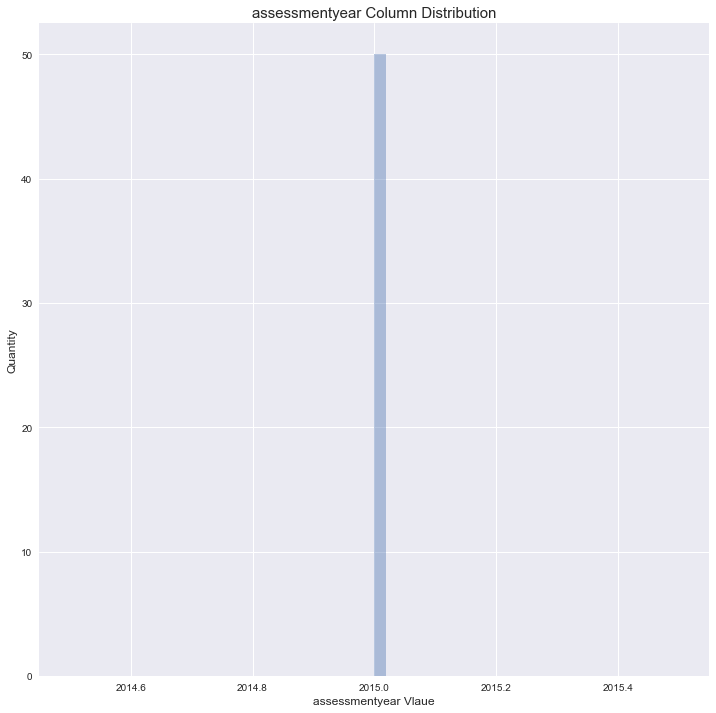

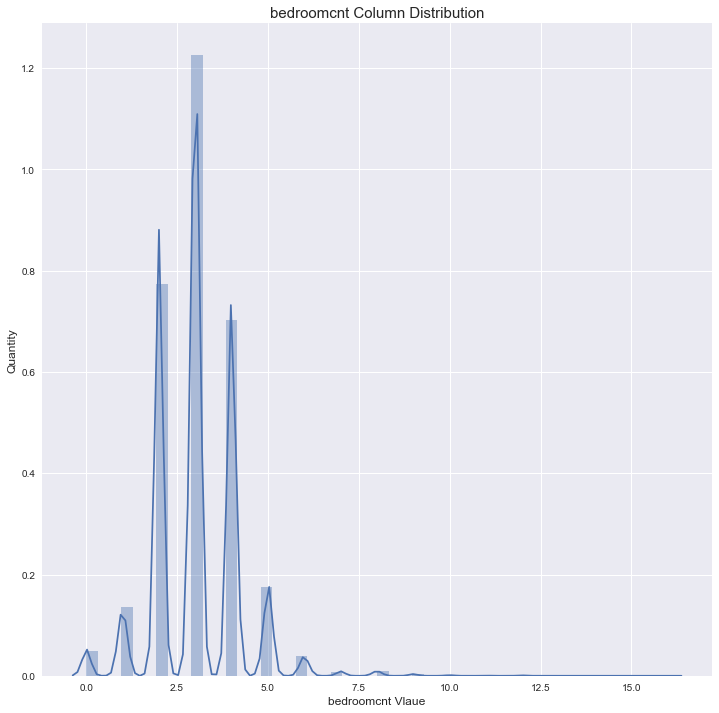

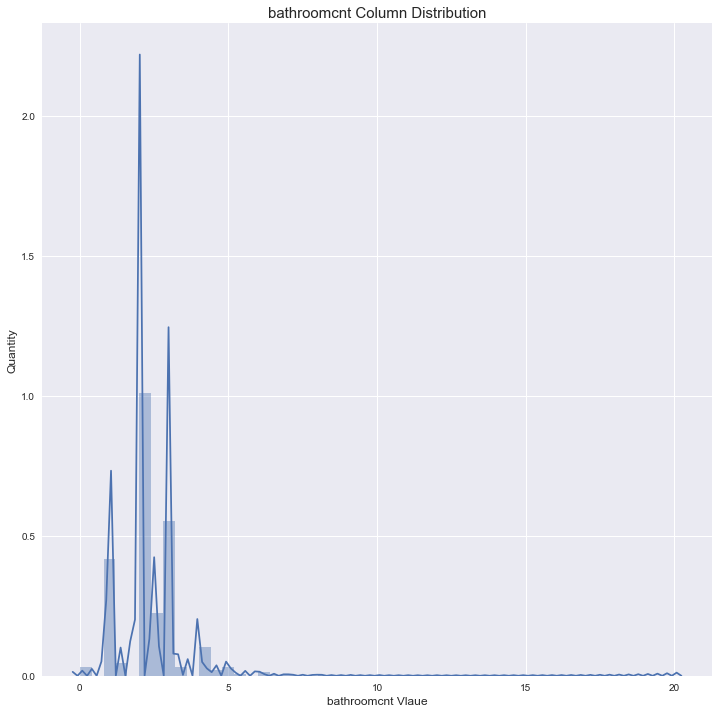

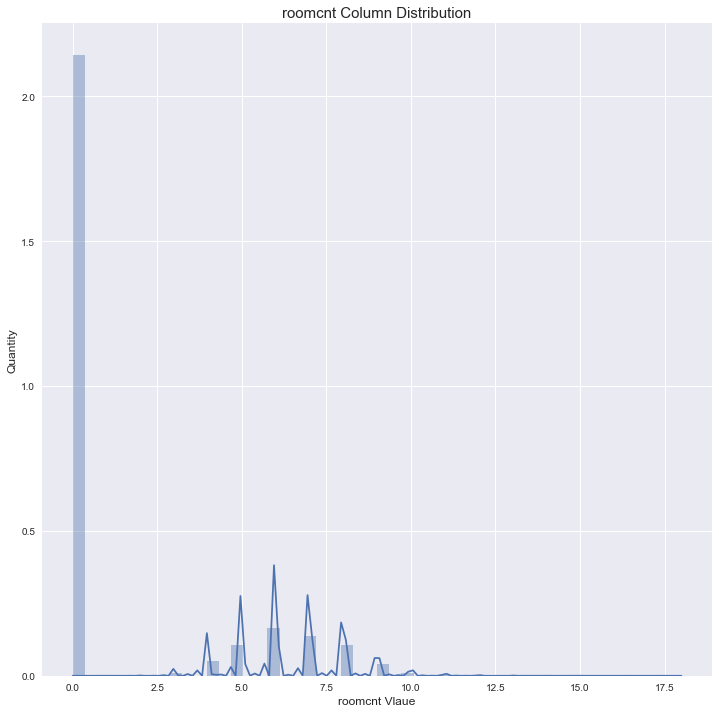

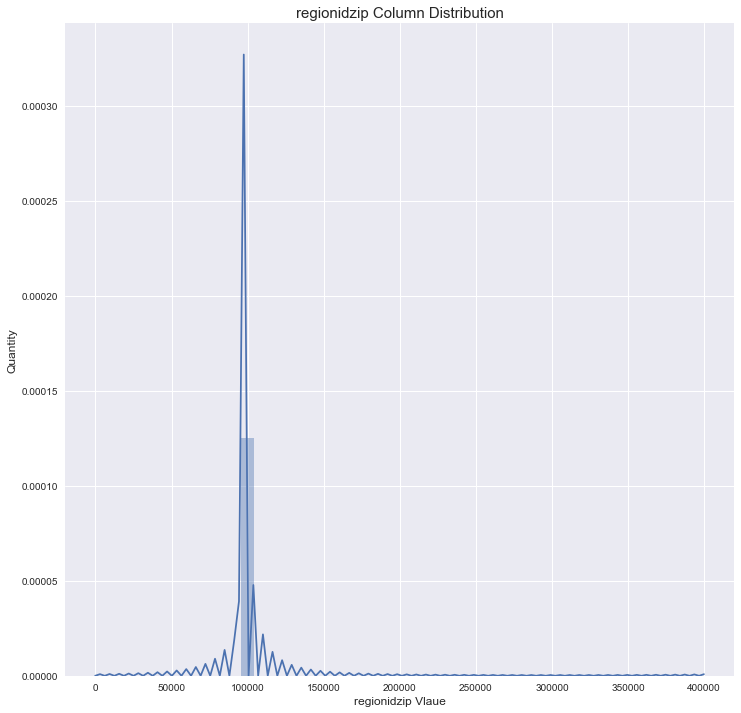

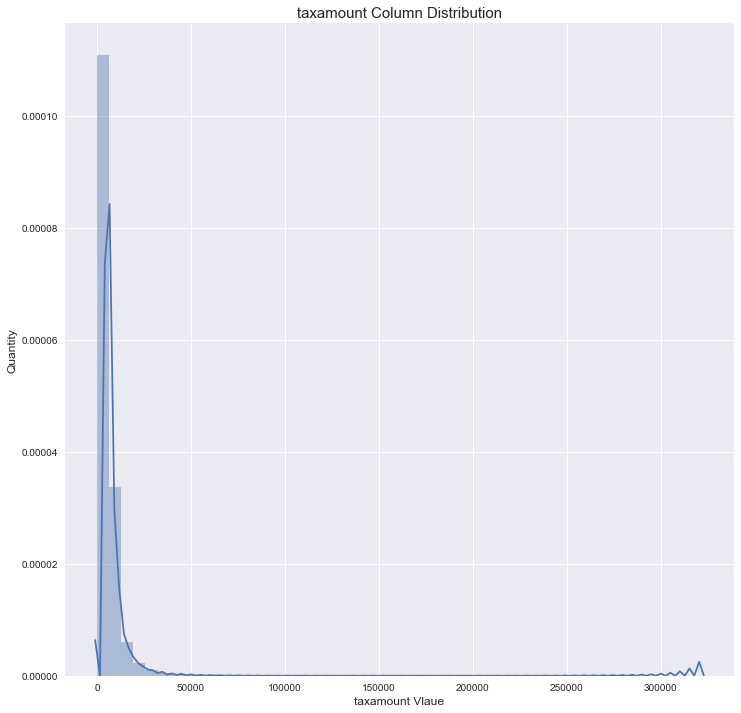

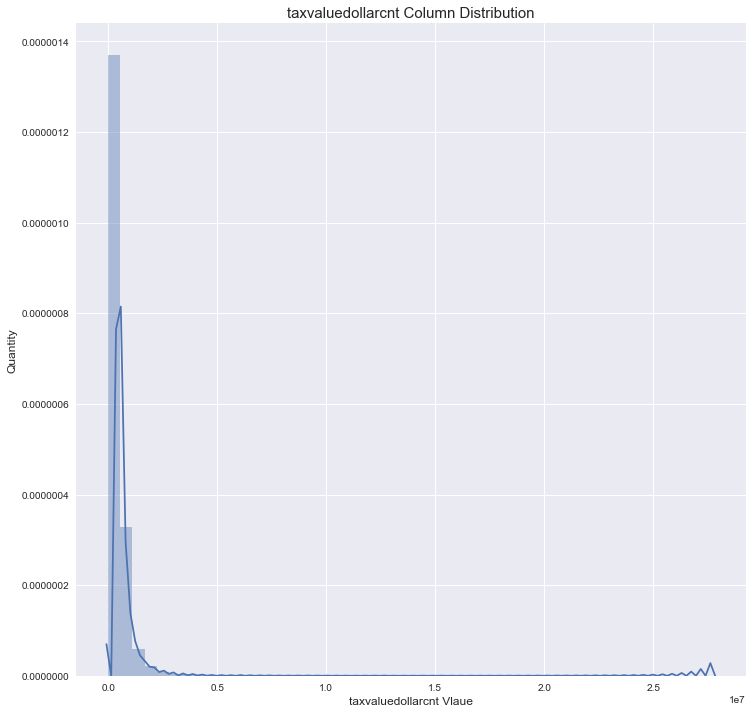

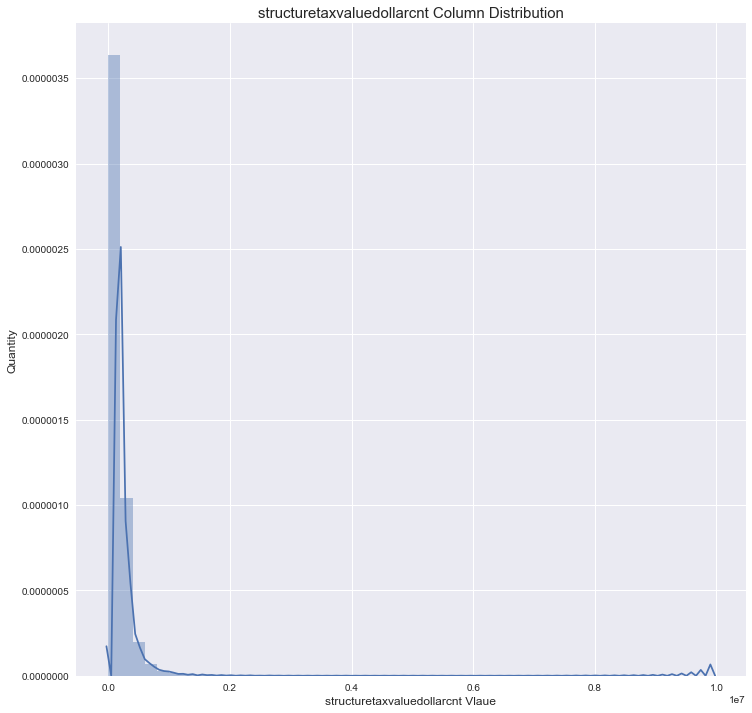

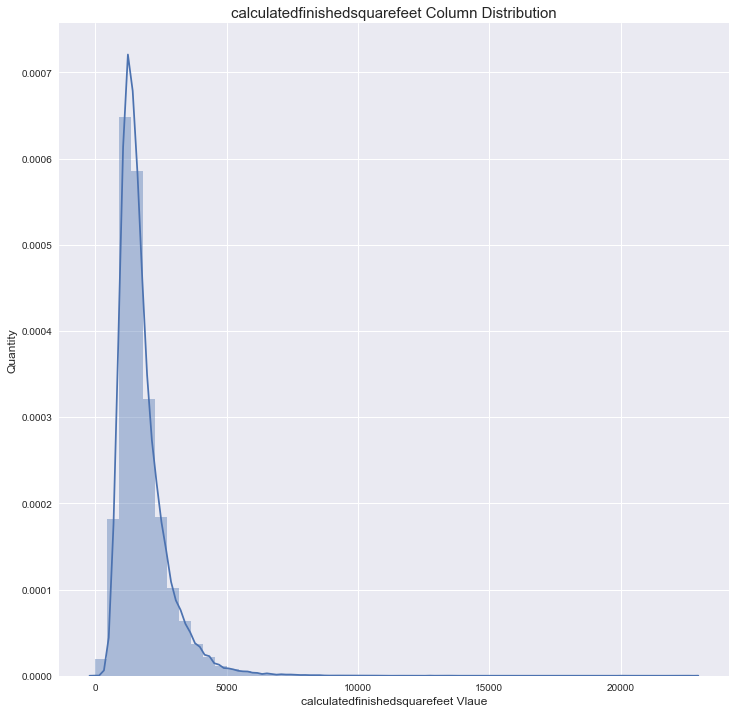

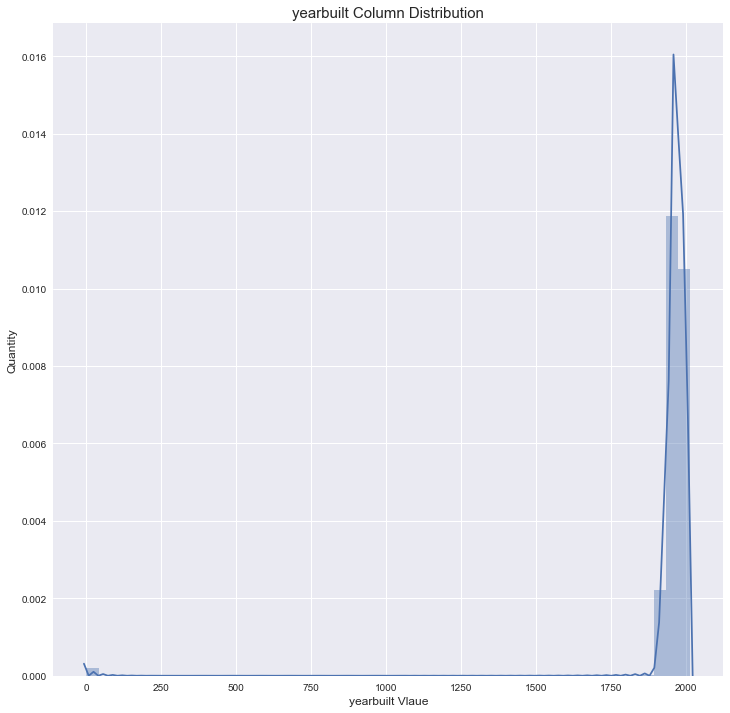

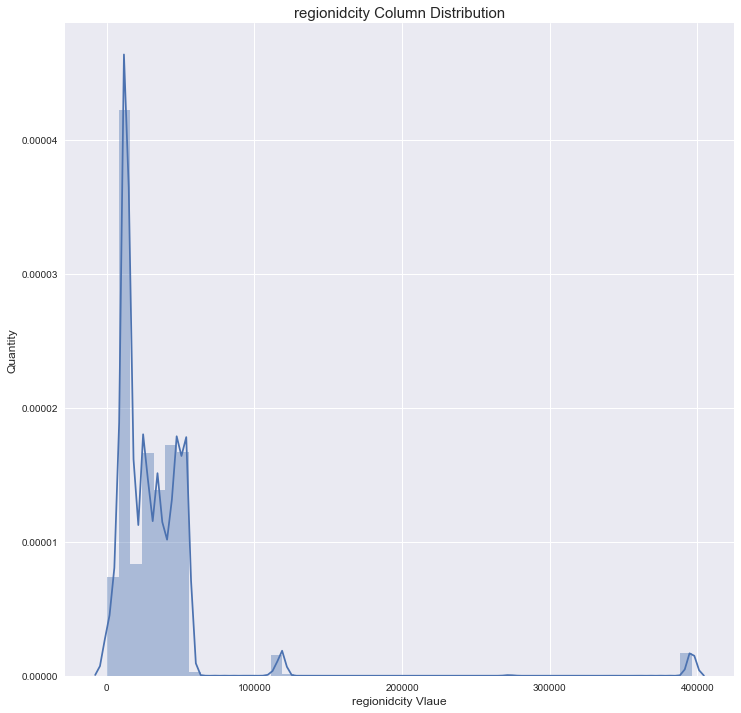

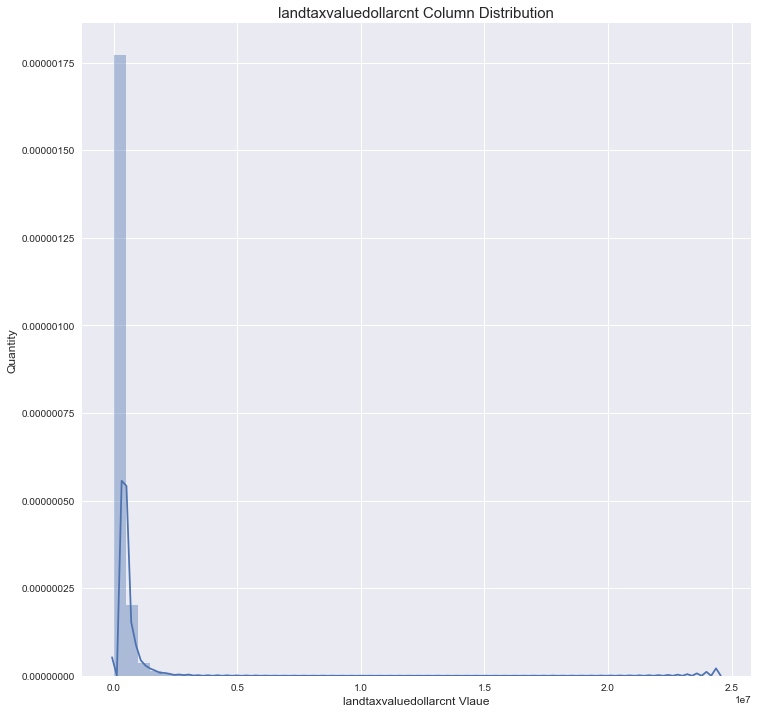

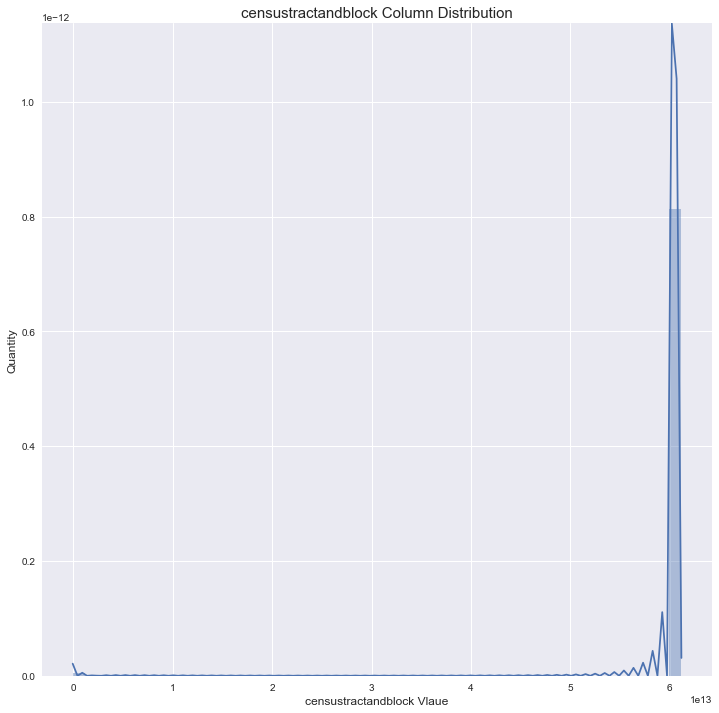

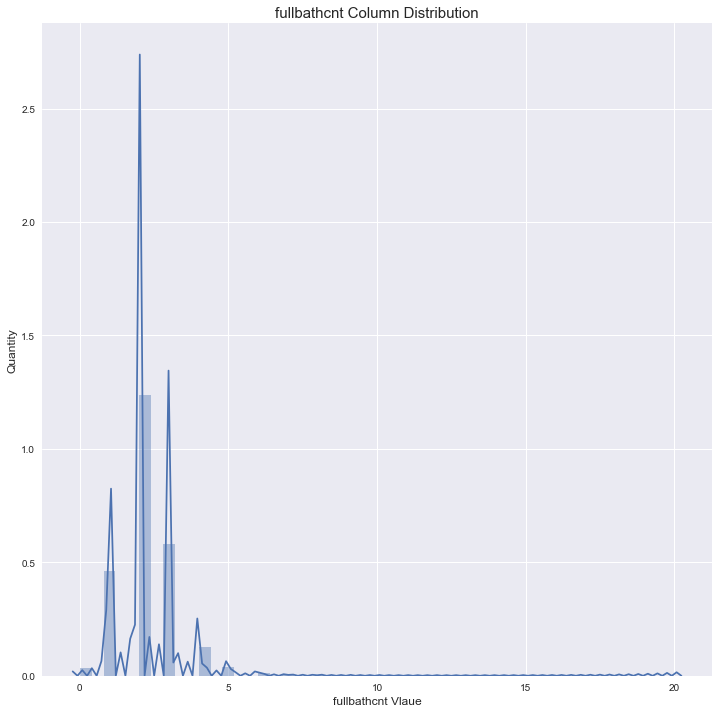

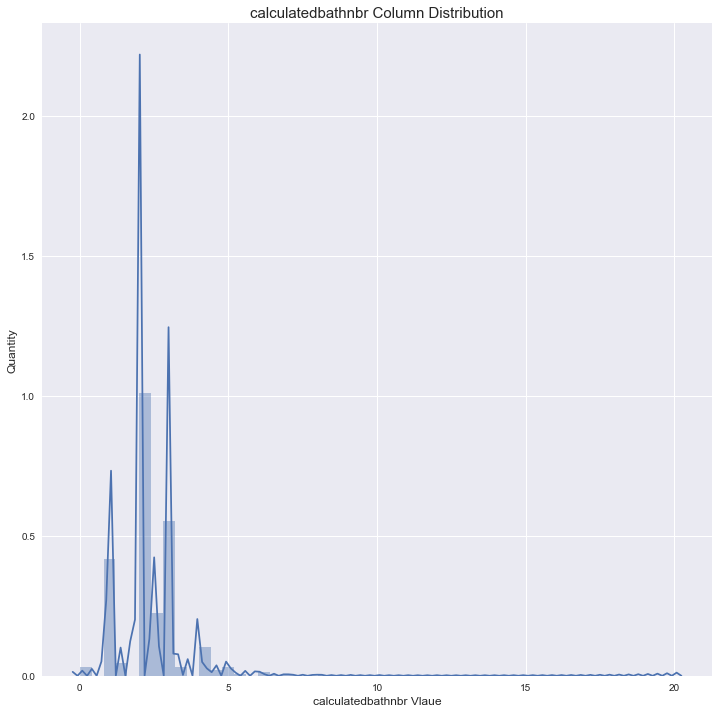

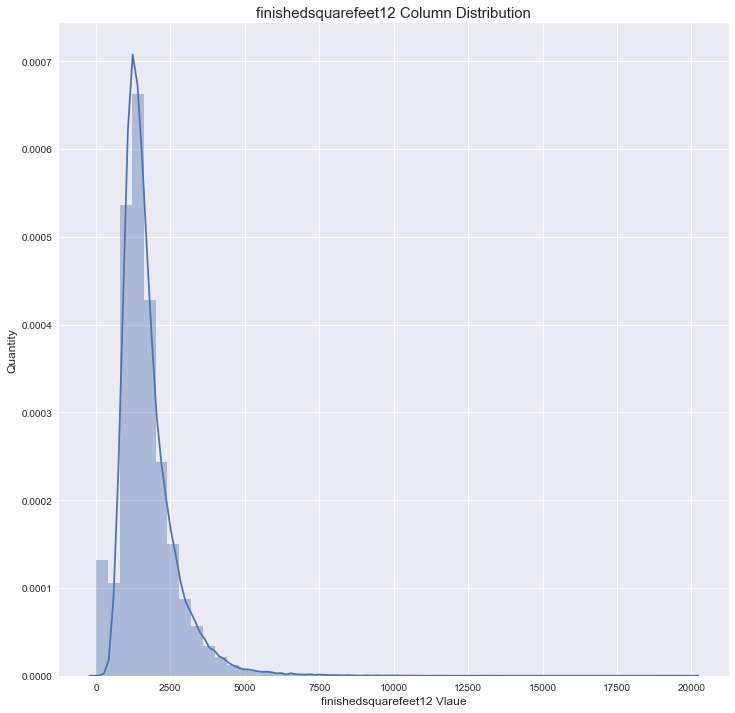

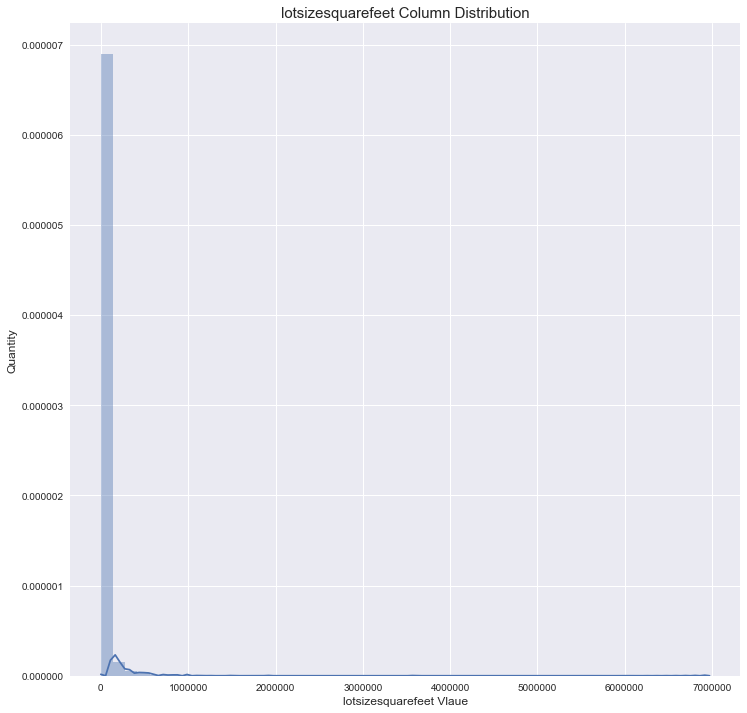

In [193]:
eachColumnDistribution(data_2016)

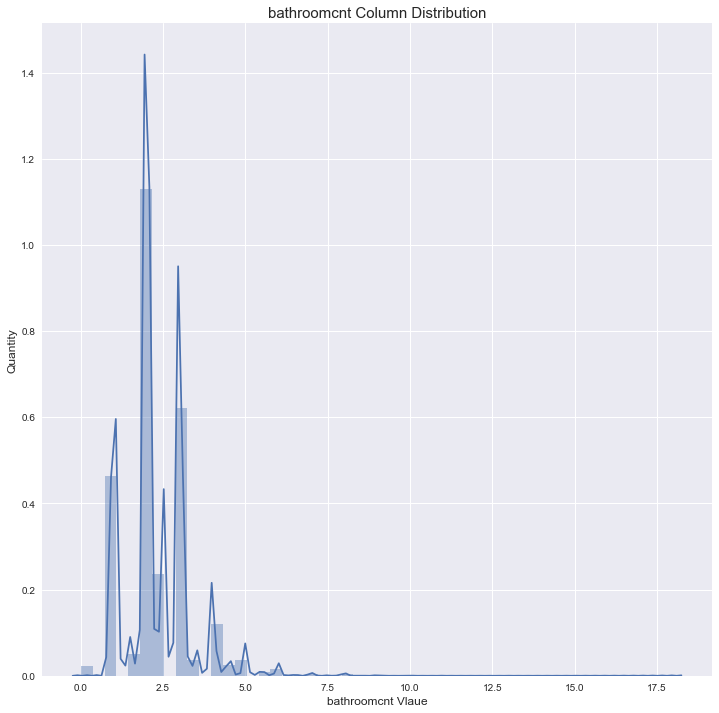

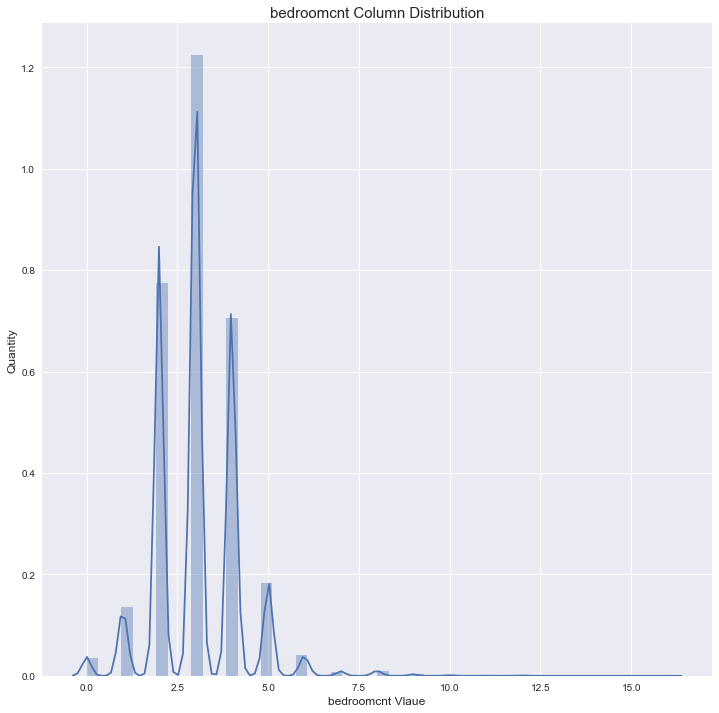

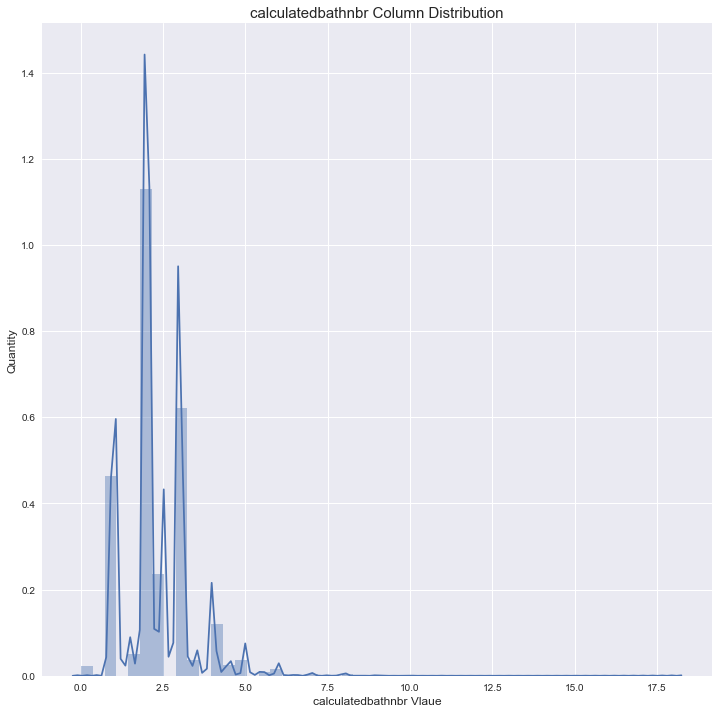

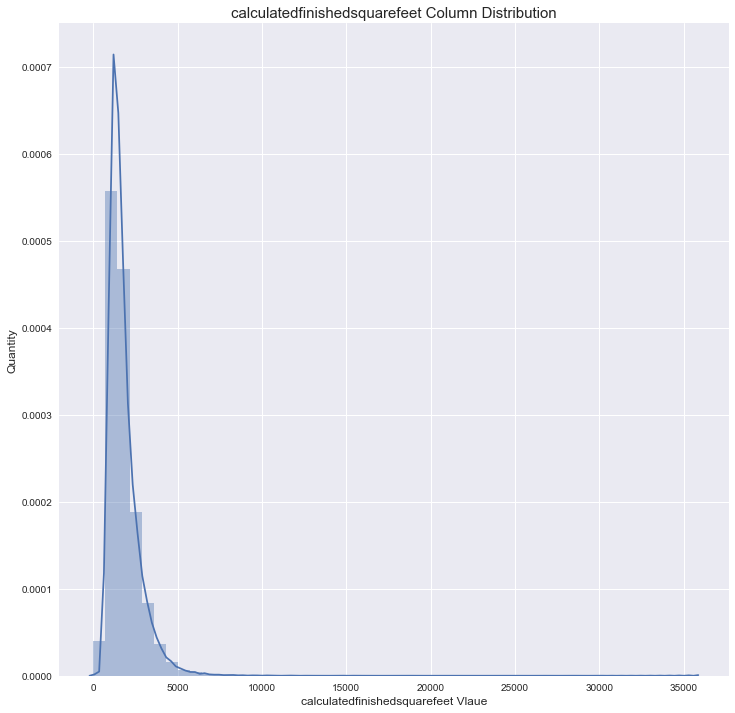

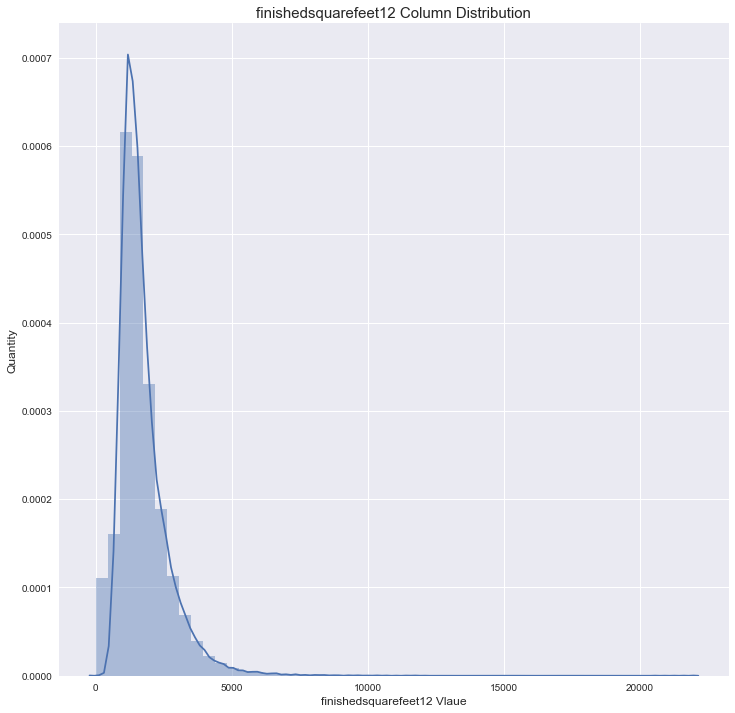

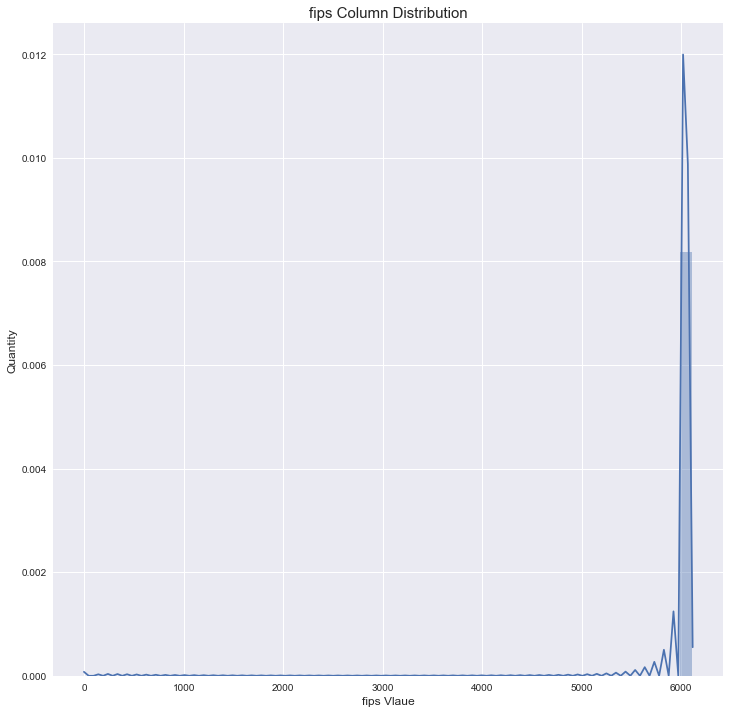

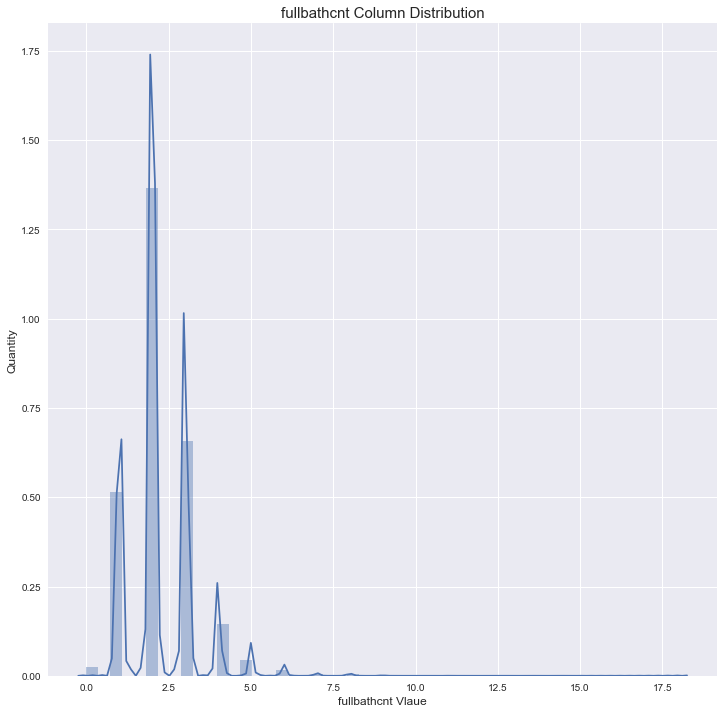

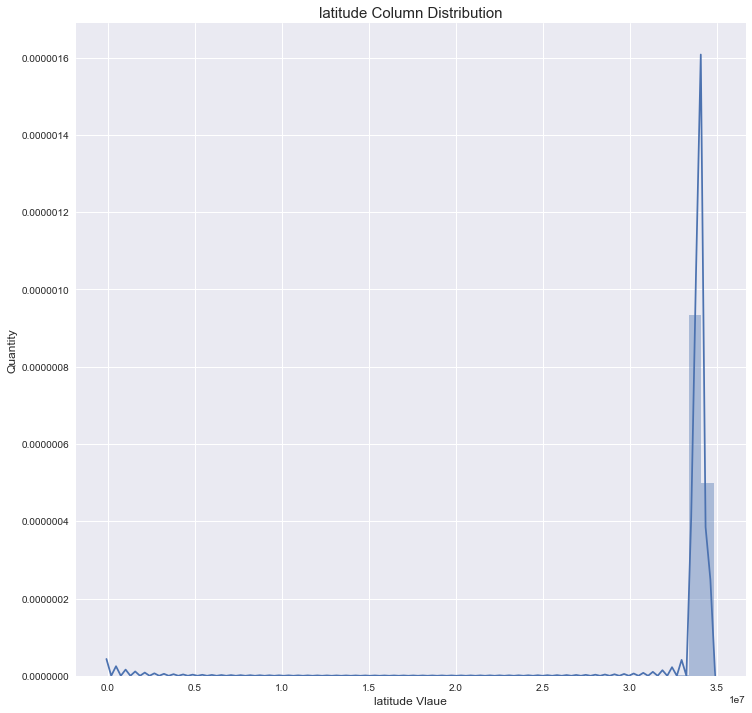

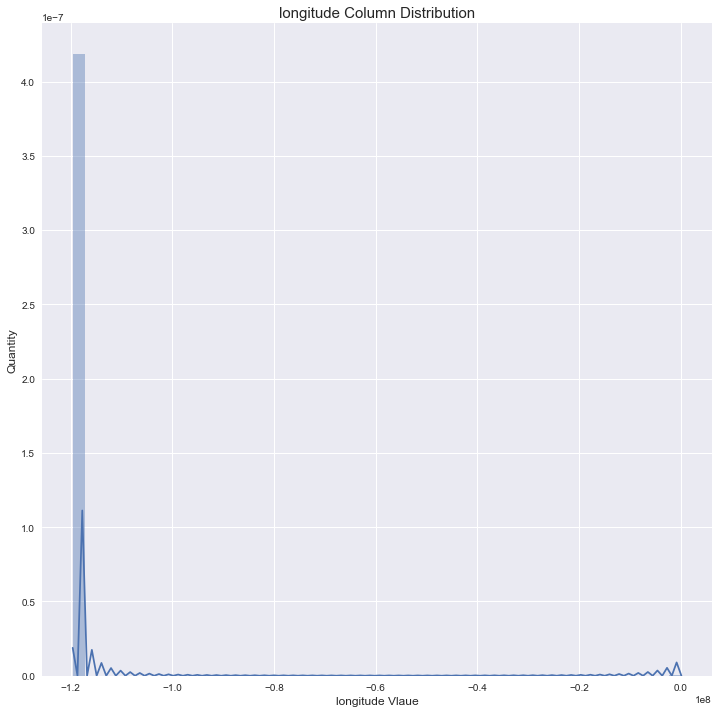

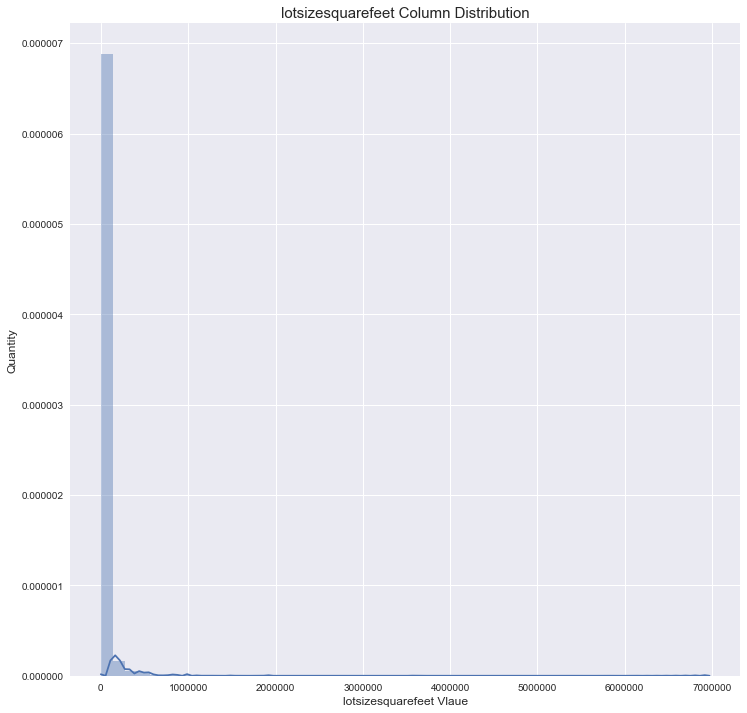

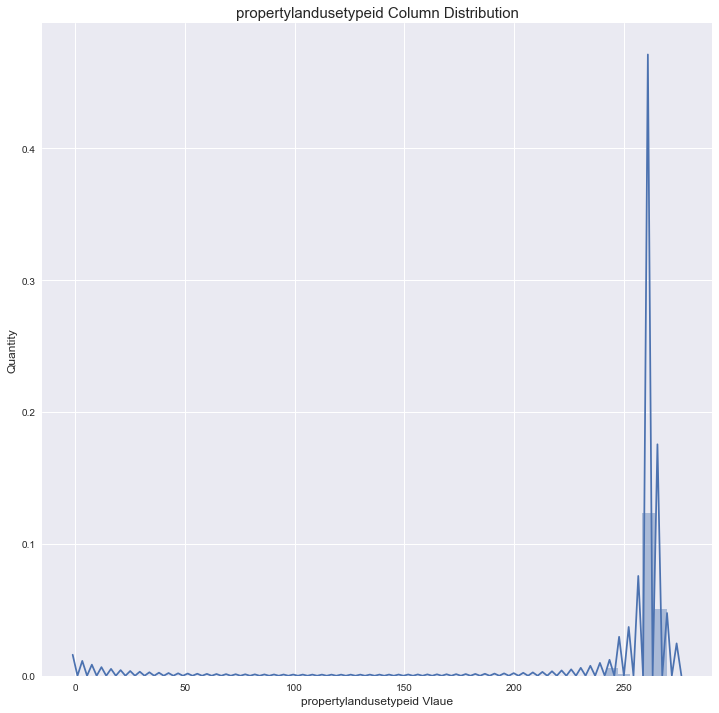

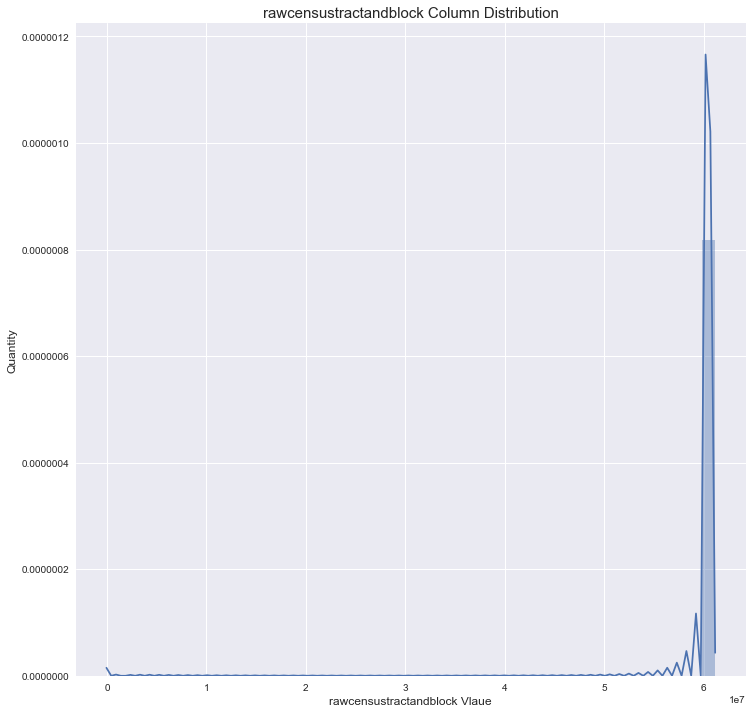

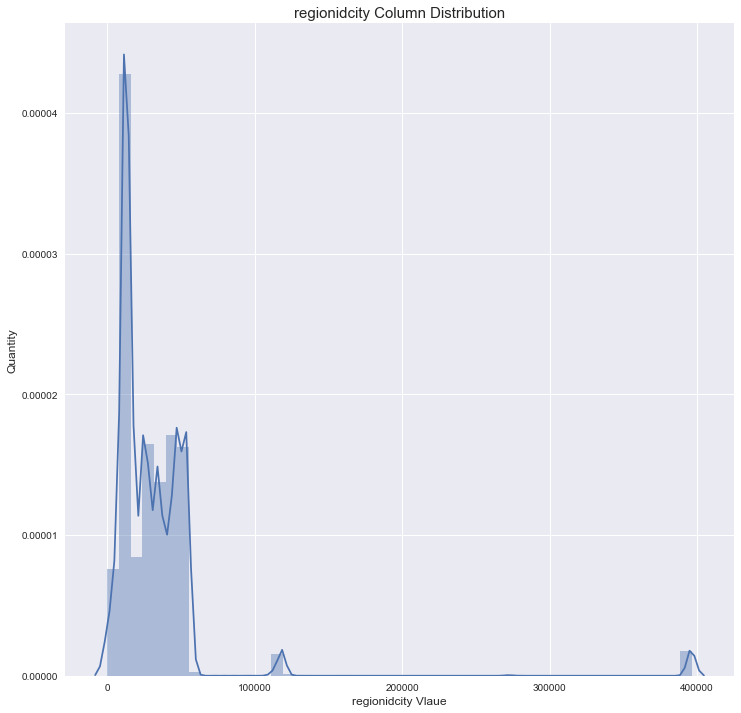

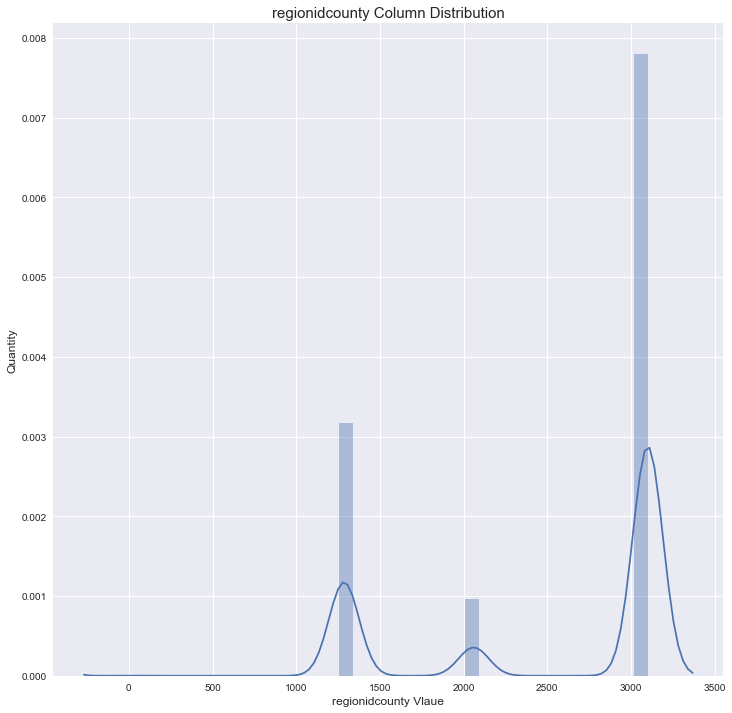

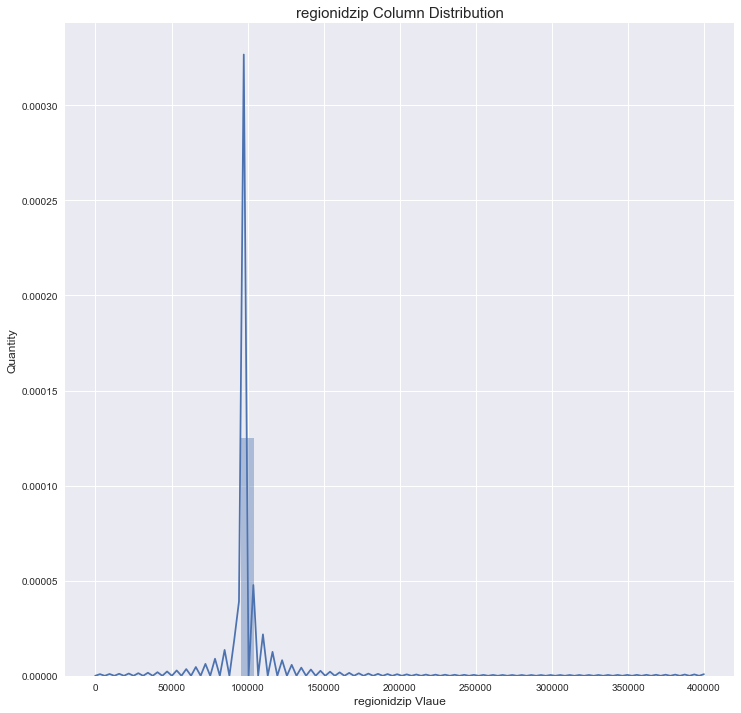

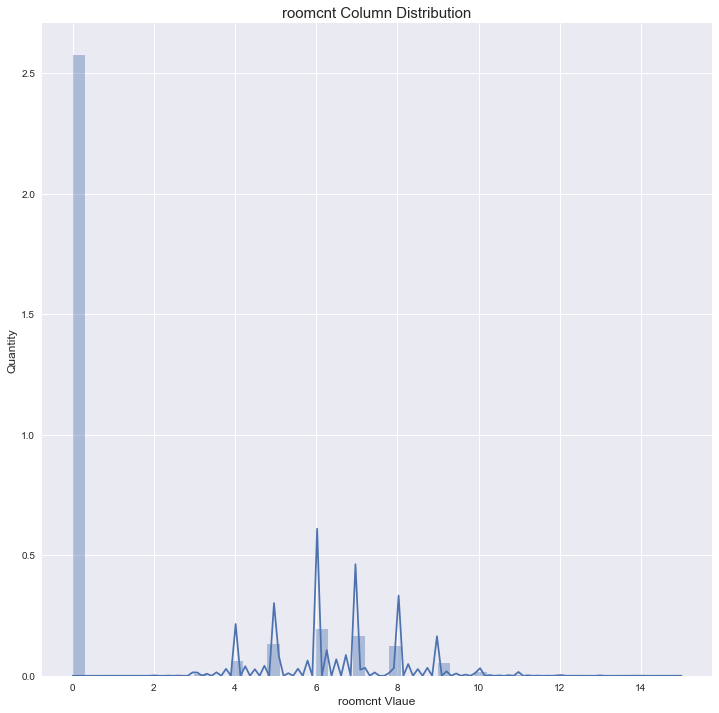

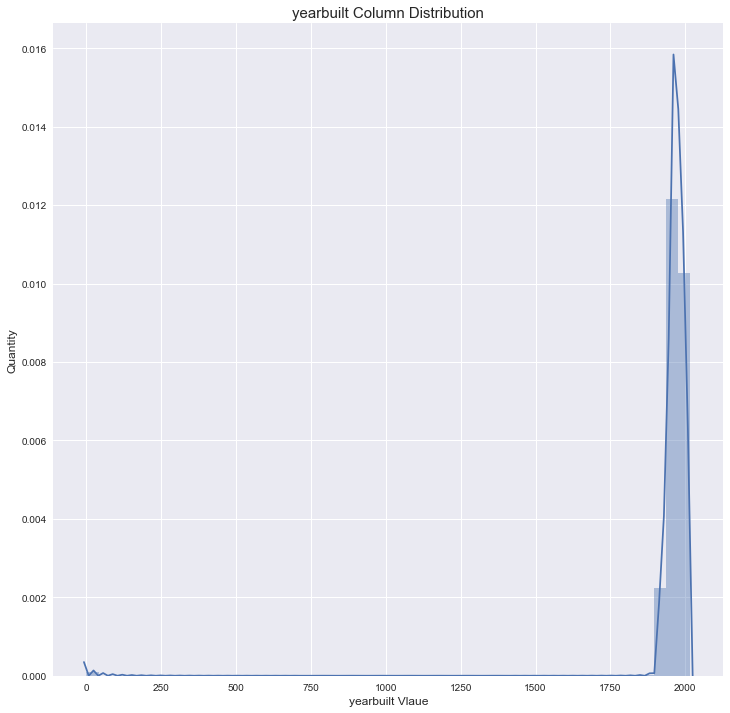

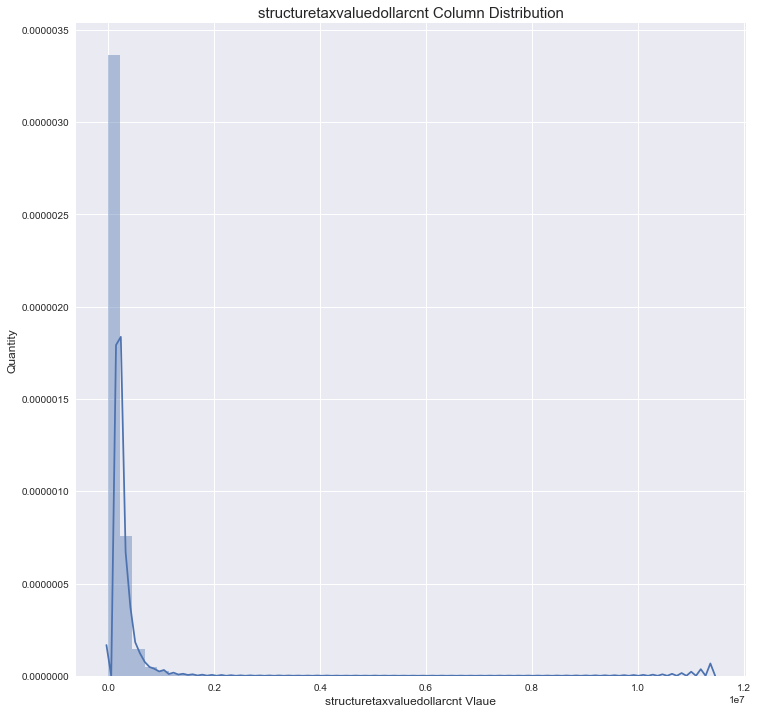

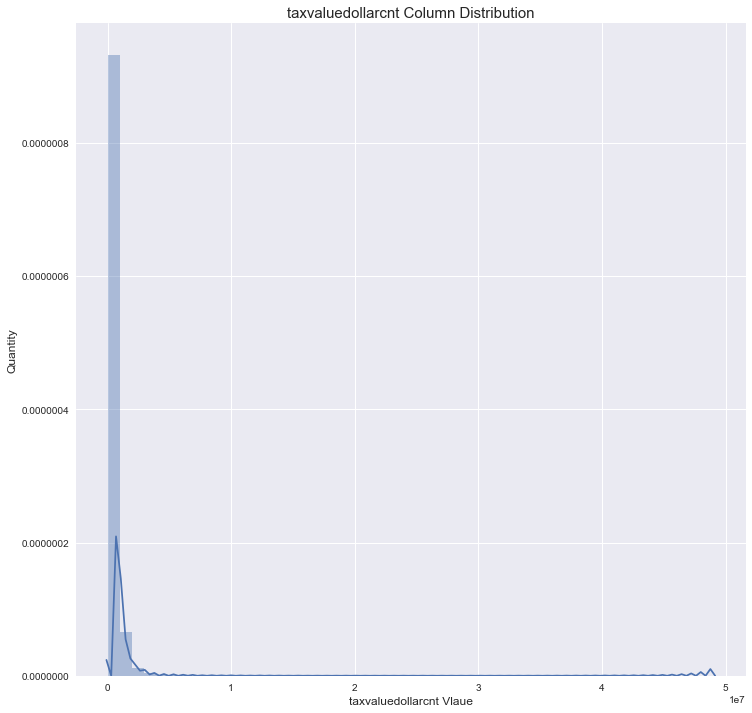

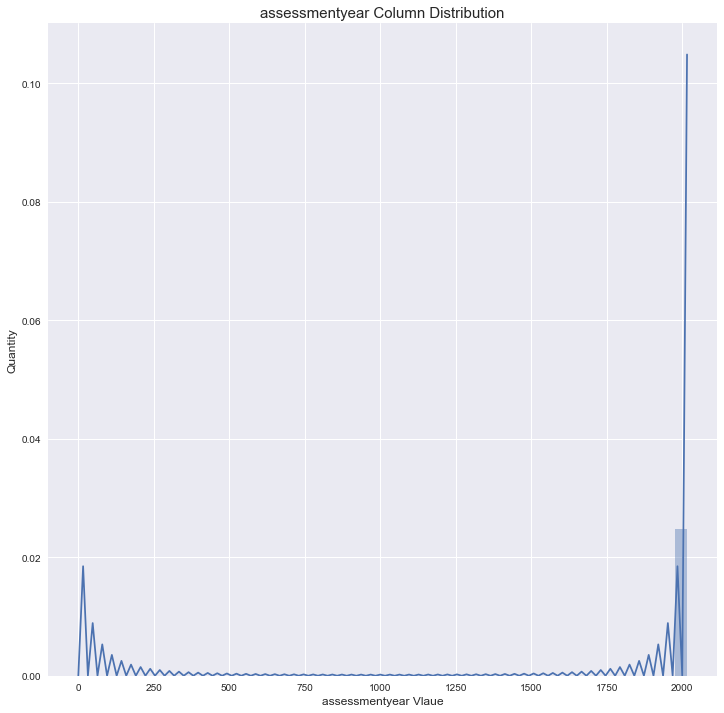

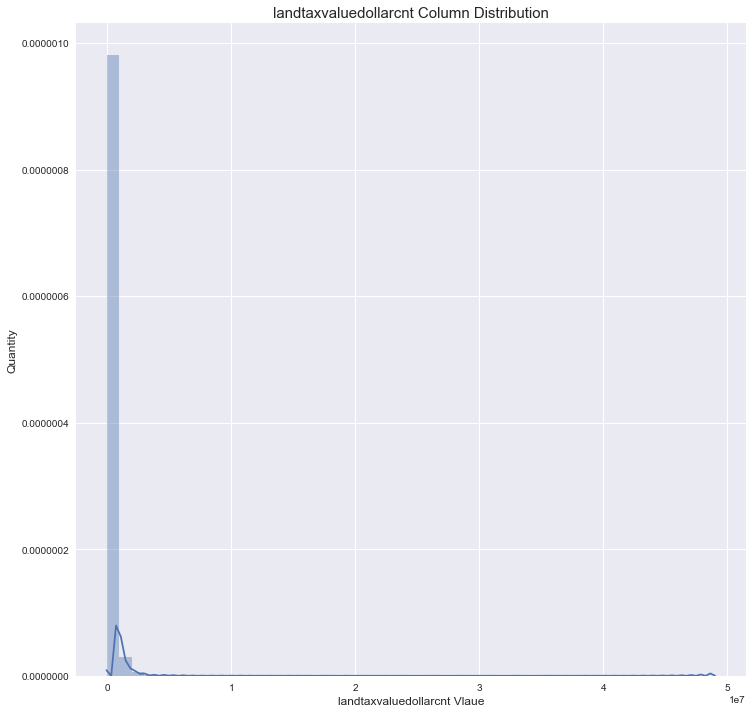

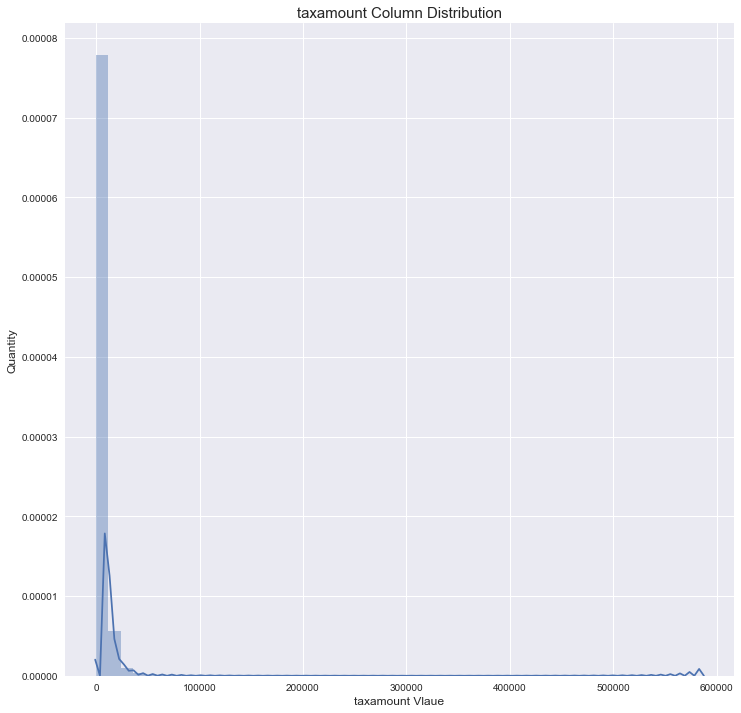

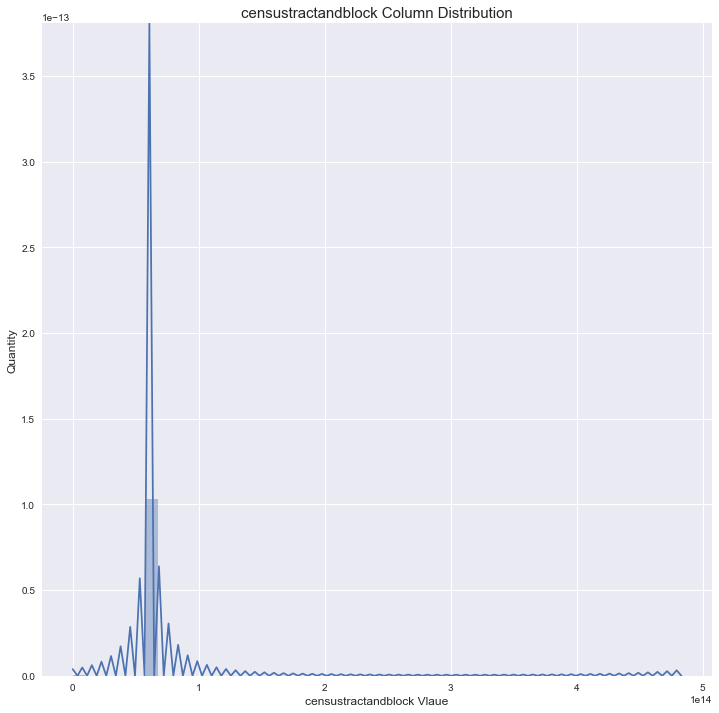

In [203]:
x = data_2017.columns.get_values()
index = [np.argwhere(x=='year'), np.argwhere(x=='month'), np.argwhere(x=='transactiondate'), np.argwhere(x=='logerror'),np.argwhere(x=='parcelid'), np.argwhere(x=='propertycountylandusecode')]
colNames = np.delete(x, index)
for col in colNames:
    plt.figure(figsize=(12,12))
    sns.distplot(data_2017[col])
    plt.ylabel('Quantity', fontsize=12)
    plt.xlabel(col+' Vlaue', fontsize=12)
    plt.title(col+" Column Distribution", fontsize=15)
    plt.show()
    #eachColumnDistribution(data_2017)

## Catagorical Columns

In [232]:
def catagoricalDataDistribution(yearValue):
    plt.close('all')
    sns.countplot(x=yearValue['propertycountylandusecode'], data=yearValue, palette="Set3")
    plt.figure(figsize=(25,30))
    plt.show()

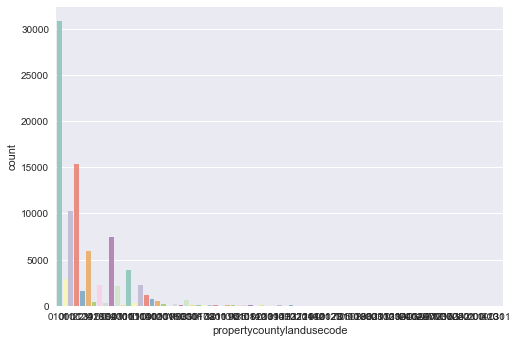

In [233]:
catagoricalDataDistribution(data_2016)

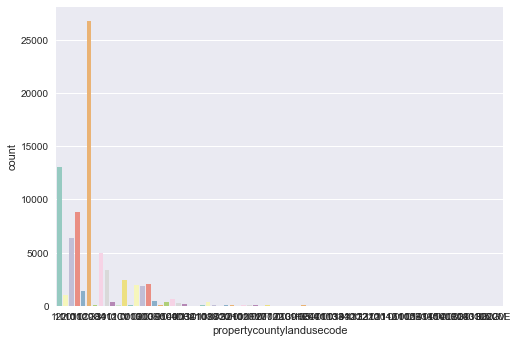

In [234]:
catagoricalDataDistribution(data_2017)

# Interesting Function for Data Analysis

Displays the report of:

    1. Amount of missing data in each column
    2. count of different data types
    3. Amount of 0s in each column
    4. Description of each (mean, min, max, distinct counts)
    5. The histogram
    6. Common Values
    7. Extreme/outlier values

In [141]:
pandas_profiling.ProfileReport(data_2016)

In [142]:
pandas_profiling.ProfileReport(data_2017)